# Updated and Comprehensive Characterization Factors for Microplastics in Life Cycle Assessment Considering Multimedia Fate Modelling

In [2]:
import numpy as np
import termcolor
#from termcolor import colored, cprint
import math
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import os  

## I. Definition of the Level III transfer model

<img src="Modele4.0.png" width="700">

<img src="Legend2.0.png" width="200">

This model is based on the USEtox and the SimpleBox4Plastics (SB4P) models. 

It contains 2 scales : Continental (C) and Global (G).  
Each scale contains 9 environmental compartments :

 - Air (a)
 - Freshwater (fw)
 - Lakewater (lw)
 - Seawater (sw)
 - Freshwater sediment (fw_sed)
 - Lakewater sediment (lw_sed)
 - Seawater sediment (sw_sed)
 - Agricultural soil (agr_soil)
 - Natural soil (nat_soil)

## II. Definition of polymers studied

This study aims to investigate the impact of 13 polymers : __EPS__, __HDPE__, __LDPE__, __PA_Nylon__, __PET__, __PHA__, __starch blend__, __PLA__, __PP__, __PS__, __PVC__, __TRWP__ and __PAN__ at 5 different sizes : __1 μm__, __10 μm__, __100 μm__, __1000 μm__ and __5000 μm__ in the sphere form.  
This code enables to investigate any size of polymer particle at the micro scale.

### Reading the polymer list

In [10]:
#A list of polymer with some properties was created to use in this code 

df_polymer_list = pd.read_csv("Polymer_list.csv", sep=';', encoding= 'unicode_escape')
df_polymer_list = df_polymer_list.set_index(['polymer_type'])

In [11]:
df_polymer_list

,density_average,shape_factor,SSDR_w,SSDR_sed,SSDR_soil,SSA_corr_factor,sed_min_sw
polymer_type,,,,,,,
EPS,36.5,4,9.510000e-16,9.510000e-16,9.510000e-16,13,8.350000e-13
HDPE,955.0,4,3.170000e-15,3.170000e-15,3.620000e-14,1,5.670000e-10
LDPE,925.0,4,6.340000e-15,2.230000e-14,4.930000e-13,1,5.670000e-10
PA_Nylon,1240.0,4,1.010000e-13,1.010000e-13,1.010000e-13,1,7.160000e-07
PET,1350.0,4,9.510000e-15,9.510000e-15,1.880000e-14,1,7.160000e-07
PHA,1220.0,4,3.570000e-12,1.960000e-13,3.790000e-11,1,7.160000e-07
PLA,1240.0,4,2.850000e-15,3.490000e-17,3.840000e-12,1,7.160000e-07
PP,885.0,4,3.900000e-14,2.850000e-15,2.200000e-14,1,5.670000e-10
PS,1040.0,4,9.510000e-16,9.510000e-16,9.510000e-16,1,5.670000e-10


## III. Landscape settings and particle properties

### Reading the regionalization file

In [14]:
#A list of regions with landscape properties was created to use in this code 

df_region_list = pd.read_csv("List_regions.csv", sep=';', encoding='utf-8-sig')
df_region_list = df_region_list.set_index(['regions'])
df_region_list

,area_land_C,area_sea_C,areafrac_fw_C,areafrac_lw_C,areafrac_nat_soil_C,areafrac_agr_soil_C,fracsf_fw_C,fracsf_lw_C,temp_C,wind_speed_C,...,frac_runoff_lw_G,frac_infiltr_G,soil_ero_G,irrig_G,dens_fw_species_C,dens_fw_species_RoW,dens_marine_species_C,dens_marine_species_RoW,dens_ter_species_C,dens_ter_species_RoW
regions,,,,,,,,,,,,,,,,,,,,,
North_America,1.450000e+13,1.840000e+12,0.003430,0.08320,0.631,0.282,0.03960,0.960,285.15,3.0,...,0.216,0.25,9.510000e-13,2.720000e+12,0.0750,0.9250,0.2332,0.7668,0.0324,0.9676
Latin_America,2.090000e+13,2.970000e+12,0.006450,0.01270,0.654,0.327,0.33700,0.663,285.15,3.0,...,0.231,0.25,9.510000e-13,2.720000e+12,0.2989,0.7011,0.2657,0.7343,0.3433,0.6567
Europe,8.570000e+12,1.700000e+12,0.005010,0.02550,0.585,0.385,0.16400,0.836,285.15,3.0,...,0.226,0.25,9.510000e-13,2.720000e+12,0.1022,0.8978,0.0402,0.9598,0.0831,0.9169
Africa_Middle_East,3.430000e+13,1.590000e+12,0.000131,0.01390,0.588,0.397,0.00932,0.991,285.15,3.0,...,0.224,0.25,9.510000e-13,2.720000e+12,0.2268,0.7732,0.2293,0.7707,0.2283,0.7717
Central_Asia,1.690000e+13,7.360000e+11,0.002250,0.02730,0.521,0.449,0.07590,0.924,285.15,3.0,...,0.226,0.25,9.510000e-13,2.720000e+12,0.1225,0.8775,0.2538,0.7462,0.0760,0.9240
Southeast_Asia,1.690000e+13,5.340000e+12,0.012300,0.02690,0.497,0.463,0.31500,0.685,285.15,3.0,...,0.230,0.25,9.510000e-13,2.720000e+12,0.2880,0.7120,0.3822,0.6178,0.2298,0.7702
Northern_regions,1.830000e+13,5.620000e+12,0.004690,0.05190,0.821,0.122,0.08290,0.917,285.15,3.0,...,0.225,0.25,9.510000e-13,2.720000e+12,0.0570,0.9430,0.2129,0.7871,0.0214,0.9786
Oceania,8.120000e+12,2.240000e+12,0.000900,0.00585,0.535,0.458,0.13300,0.867,285.15,3.0,...,0.226,0.25,9.510000e-13,2.720000e+12,0.0892,0.9108,0.1637,0.8363,0.1310,0.8690


In [15]:
#Enter the region to study (should be written exactly as it is in the region list)
## For exemple : if you want to study North America, write "North_America"
regions = input('Enter the region to study: ')
print('The region chosen is:', regions)

Enter the region to study:  Oceania


The region chosen is: Oceania


## A. Landscape settings

### All scale

#### Environnemental properties

In [19]:
g = 9.81  #Gravitational acceleration (m.s-2) - all scale - source:SB4
kboltz = 1.3806488E-23  #Boltzmann constant (J.K-1) - source: SB4P

RHOsolid = 2500 #Mineral density sediment and soil (kg/m-3) - source: SP4P
RHOaers = 2000 #Dry density of aerosol solids (kg.m-3) - source: SB4P

Rho_a = 1.23  #Density of air (kg/m3) - all scale - source: SB4P
DYNVISC_a = 1.81E-5  #Dynamic viscosity of air (kg/(m.s)) - source: SB4P

Rho_w = 9.98E2  #Density of water (kg/m3) - all scale - source: SB4P
DYNVISC_w = 1.00E-3  #Dynamic viscosity of water (kg/(m.s)) - all scale - source: SB4P

RadNuc = 1.00E-8 #Radius nucleation mode aerosol particle (m) - source: SB4P
RhoNuc = 1.30E3 #Density nucleation mode aerosol particle (kg.m-3) - source: SB4P

RadAcc = 5.80E-8 #Radius accumulation mode aerosol particle (m) - source: SB4P
RhoAcc = 2.00E3 #Density accumulation mode aerosol particle (kg.m-3) - source: SB4P

RadCP_a = 9.00E-7 #Radius coarse mode aerosol particle (m) - source: SB4P
RhoCP_a = RHOaers #Density coarse mode aerosol particle (kg.m-3) - source: SB4P

RadNC_w = 1.50E-7 #Radius natural natural colloids (NC<450 nm) in water (m) - source:SB4P
RhoNC_w = 2.00E3 #Density natural colloids (NC<450 nm) in water (kg.m-3) - source: SB4P

RadSPM_w = 3.00E-6 #Radius natural suspended particulate matter (SPM>450 nm) in water (m) - source:SB4P
RhoSPM_w = 2.50E3 #Density natural suspended particulate matter (SPM>450 nm) in water (kg.m-3) - source: SB4P

RadNC_sed = 1.50E-7 #Radius natural colloids (NC, < 450 nm) in sediment pore water (m) - source: SB4P
RhoNC_sed = 2.00E3 #Density natural colloids (NC, < 450 nm) in sediment pore water (kg.m-3) - source: SB4P

RadFP_sed = 1.28E-04 #Radius filtration particles in sediment (FP, >450 nm) (m) - source: SB4P

RadNC_soil = 1.50E-7 #Radius natural colloids (NC, < 450 nm) in soil pore water (m) - source: SB4P
RhoNC_soil = 2.00E3 #Density natural colloids (NC, < 450 nm) in soil pore water (kg.m-3) - source: SB4P

RadFP_soil = 1.28E-4 #Radius filtration particulates in soil (FP, > 450 nm) (m) - source: SB4P
RhoFP_soil = RHOsolid #Density filtration particulates in soil (FP, > 450 nm) (kg.m-3) - source: SB4P

#Attachment efficiencies between ENPs and natural particles in different media (-) - source: SB4P
AtefSA_lw = 0.01
AtefSP_lw = 0.01

AtefSA_fw = 0.01
AtefSP_fw = 0.01

AtefSA_sw = 0.01
AtefSP_sw = 0.01

AtefSA_nat_soil = 0.01
AtefSP_nat_soil = 0.01

AtefSA_agr_soil = 0.01
AtefSP_agr_soil = 0.01

AtefSA_lw_sed = 0.01
AtefSP_lw_sed = 0.01

AtefSA_fw_sed = 0.01
AtefSP_fw_sed = 0.01

AtefSA_sw_sed = 0.01
AtefSP_sw_sed = 0.01

#### Calculated environnemental properties

In [21]:
SingleVolNuc = (4/3)*np.pi*(RadNuc)**3 #Volume of single nucleation mode aerosol particle (m3) - source: SB4P
SingleVolAcc = (4/3)*np.pi*(RadAcc)**3 #Volume of single accumulation mode aerosol particle (m3) - source: SB4P

SingleVolCP_a =((4/3)*np.pi*(RadCP_a)**3) #Volume of single coarse mode aerosol particle (m3) - source: SB4P

SingleVolNC_w = ((4/3)*np.pi*(RadNC_w)**3) #Volume of single natural colloid in water (m3) - source: SB4P
SetVelNC_w = (2*(RhoNC_w-Rho_w)*g*RadNC_w**2)/(9*DYNVISC_w) #Gravitational settling velocity of natural colloids (NC) in water (m.s-1) - source: SB4P

SingleVolSPM_w = ((4/3)*np.pi*(RadSPM_w)**3) #Volume of single suspended particle in water (m3) - source: SB4P
SetVelSPM_w = (2*(RhoSPM_w-Rho_w)*g*RadSPM_w**2)/(9*DYNVISC_w) #Gravitational settling velocity of suspended particulate matter (SPM) in water (m.s-1) - source: SB4P

SingleVolNC_sed = ((4/3)*np.pi*(RadNC_sed)**3) #Volume of single natural colloid in sediment pore water (m3) - source: SB4P
SetVelNC_sed = (2*(RhoNC_sed-Rho_w)*g*RadNC_sed**2)/(9*DYNVISC_w) #Gravitational settling velocity of natural colloids (NC) in sediment pore water (m.s-1) - source: SB4P

SingleVolNC_soil = ((4/3)*np.pi*(RadNC_soil)**3) #Volume of single natural colloid in soil pore water (m3) - source: SB4P
SetVelNC_soil = (2*(RhoNC_soil-Rho_w)*g*RadNC_soil**2)/(9*DYNVISC_w) #Gravitational settling velocity of natural colloids (NC) in soil pore water (m.s-1) - source: SB4P

### Continental scale

In [23]:
SYSTEMAREA_C = df_region_list.loc[regions,'area_land_C'] + df_region_list.loc[regions,'area_sea_C'] #Area system (m2) - source: SB4P
AREAland_C =  df_region_list.loc[regions,'area_land_C'] #Area land (m2) - source: SB4P
TEMP_C = df_region_list.loc[regions,'temp_C']  #Temperature (K) - source: SB4P

#### Air compartments

In [25]:
tdry_C = 2.85E5 #duration dry episode (s) - source: SB4P
twet_C = 1.82E4 #duraction wet episode (s) - source: SB4P
COLLECTeff_C = 2.00E5 #Aerosol colletion efficiency (-) - source: SB4P
AEROSOLdeprate_C = 1.00E-3 #Deposition velocity aerosol particles (m.s-1) - source: SB4P
WINDspeed_C = df_region_list.loc[regions,'wind_speed_C'] #wind speed (m.s-1) - source: SB4P

#### AIR ####

#Dimensions
HEIGHT_a_C = 1.00E3  #Mixed height air compartment (m) - source: SB4P
VOLUME_a_C = SYSTEMAREA_C*HEIGHT_a_C #Volume of air compartment (m3) - source: SB4P

#Properties
NumConcNuc_a_C = 3.20E9 #Nucleation mode aerosol particle number concentration (m-3) - source: SB4P
NumConcAcc_a_C = 2.90E9 #Accumulation mode aerosol particle number concentration (m-3) - source: SB4P
NumConcCP_a_C = 3.00E5 #Coarse mode aerosol particle number concentration (m-3) - source: SB4P

#### CLOUD WATER ####

#Dimensions
FRACcldw_a_C = 3.00E-7 #Volume fraction cloudwater in air (dimensionless) - source: SB4P
VOLUME_cw_C = FRACcldw_a_C*VOLUME_a_C #Volume cloud water in air (m3) - source: SB4P

#Properties
RAINrate_C = df_region_list.loc[regions,'rain_rate_C']  #Average precipitation (in m/s) - source : SB4P
FRACtwet_C = 1  #Time fraction of wet periodes (dimensionless) - source:SB4P
RAINrate_wet_C = RAINrate_C/FRACtwet_C  #Rain rate during wet episode (m/s) - source: SB4P
Rad_cw_C =(7.00E-4*(60*60*1000*RAINrate_wet_C)**0.25)/2 #Rain drop radius (m) - source: SB4P
Cunningham_cw_C = 1  #Rain drop Cunningham coefficient (dimensionless) - source:SB4P

#### Soil compartments

In [27]:
mConcNC_soil_C = 1.00E-01 #Mass concentraion of natural colloids in soil (kg.m-3) - source: SB4P
Udarcy_soil_C = 9.00E-6 #Darcy velocity in soil (m.s-1) - source: SB4P

#### NATURAL SOIL ####

#Dimensions
FRAC_nat_soil_C = df_region_list.loc[regions,'areafrac_nat_soil_C'] #Fraction natural soil - source: SB4P
AREAFRAC_nat_soil_C = AREAland_C*FRAC_nat_soil_C/SYSTEMAREA_C #Area fraction natural soil (-) - source: SB4P
DEPTH_nat_soil_C = 0.10 #Mixing depth natural soil compartment (m) - source : SB4P
VOLUME_nat_soil_C = AREAFRAC_nat_soil_C*SYSTEMAREA_C*DEPTH_nat_soil_C #Volume nat soil Continental (m3)

#Vegetation
AREAFRACveg_nat_soil_C = 0.01 #Vegetation fraction of natural soil (-) - source: SB4P
veghair_nat_soil_C = 1.00E-5  #Small vegetation hair width (m) for natural soil - source: SB4P
largevegradius_nat_soil_C = 5.00E-4  #Large vegetation radius (m) for natural soil - source: SB4P

#Properties 
AEROresist_nat_soil_C = 74 #Aerodynamic resistance (s/m) for natural soil - source : SB4P
FRICvelocity_nat_soil_C = 0.19 #Friction velocity (m/s) for natural soil - source : SB4P
FRACa_nat_soil_C = 0.2 #VOLUME FRACTION air natural soil (-) - source: SB4P
FRACw_nat_soil_C = 0.2 #VOLUME FRACTION water natural soil (-) - source: SB4P
FRACsoil_nat_soil_C = 1 - FRACa_nat_soil_C - FRACw_nat_soil_C #VOLUME FRACTION solids natural soil (-) - source: SB4P
FRACrunoff_nat_soil_fw_C = df_region_list.loc[regions,'frac_runoff_fw_C'] #Volume fraction of precipitation on natural soil running off to freshwater (-) - source : calculated from data form SB4P and AREA
FRACrunoff_nat_soil_lw_C = df_region_list.loc[regions,'frac_runoff_lw_C'] #Volume fraction of precipitation on natural soil running off to lakewater (-) - source : calculated from data form SB4P and AREA
CORRrunoff_nat_soil_C = (np.exp((-1/0.1)*0)*(1/0.1)*DEPTH_nat_soil_C/(1-np.exp((-1/0.1)*DEPTH_nat_soil_C))) #Correction factor depth dependent soil concentration for natural soil (-) - source : SB4P
ERO_nat_soil_C = df_region_list.loc[regions,'soil_ero_C'] #Erosion of natural soil (in m/s) eq to 0.03 mm/yr - source : SB4P
FRACinf_nat_soil_C = df_region_list.loc[regions,'frac_infiltr_C'] #Volume fraction of precipitation infiltration into natural soil (-) - source: SB4P

#### AGRICULTURAL SOIL ####

#Dimensions
FRAC_agr_soil_C = df_region_list.loc[regions,'areafrac_agr_soil_C'] #Fraction agricultural soil (-) - source: SB4P
AREAFRAC_agr_soil_C = AREAland_C*FRAC_agr_soil_C/SYSTEMAREA_C  #Area fraction agricultural soil (-) - source: SB4P
DEPTH_agr_soil_C = 0.10    #Mixing depth agricultural soil compartment (m) - identical for R and C - source : SB4P
VOLUME_agr_soil_C = AREAFRAC_agr_soil_C*SYSTEMAREA_C*DEPTH_agr_soil_C #Volume agr soil Continental (m3)

#Vegetation
AREAFRACveg_agr_soil_C = 1.00E-02  #Vegetation fraction of agricultural soil (dimensionless) - source: SB4P
veghair_agr_soil_C = 1.00E-5  #Small vegetation hair width (m) for agricultural soil - source: SB4P
largevegradius_agr_soil_C = 5.00E-4  #Large vegetation radius (m) for agricultural soil - source: SB4P

#Properties 
AEROresist_agr_soil_C = 74 #Aerodynamic resistance (s/m) for natural soil - source : SB4P
FRICvelocity_agr_soil_C = 0.19 #Friction velocity (m/s) for natural soil - source : SB4P
FRACa_agr_soil_C = 0.2 #VOLUME FRACTION air agricultural soil (-) - source: SB4P
FRACw_agr_soil_C = 0.2 #VOLUME FRACTION water agricultural soil (-) - source: SB4P
FRACsoil_agr_soil_C = 1 - FRACa_agr_soil_C - FRACw_agr_soil_C #VOLUME FRACTION solids agricultural soil (-) - source: SB4P
FRACrunoff_agr_soil_fw_C = df_region_list.loc[regions,'frac_runoff_fw_C'] #Volume fraction of precipitation on agricultural soil running off to freshwater (-) - source : calculated from data form SB4P and AREA
FRACrunoff_agr_soil_lw_C = df_region_list.loc[regions,'frac_runoff_lw_C'] #Volume fraction of precipitation on agricultural soil running off to lakewater (-) - source : calculated from data form SB4P and AREA
CORRrunoff_agr_soil_C = (np.exp((-1/0.1)*0)*(1/0.1)*DEPTH_agr_soil_C/(1-np.exp((-1/0.1)*DEPTH_agr_soil_C))) #Correction factor depth dependent soil concentration for agricultural soil (-) - source : SB4P
ERO_agr_soil_C = df_region_list.loc[regions,'soil_ero_C'] #Erosion of agricultural soil (in m/s) eq to 0.03 mm/yr - source : SB4P
FRACinf_agr_soil_C = df_region_list.loc[regions,'frac_infiltr_C'] #Volume fraction of precipitation infiltration into agricultaural soil (-) - source: SB4P

#### Water compartments

In [29]:
SetVelSPM_w = (2*(RhoSPM_w - Rho_w)*g*RadSPM_w**2)/(9*DYNVISC_w) #Gravitational settling velocity of SPM in the water (m/s-1) - source: SB4P
FRICvelocity_w_C = 0.19  #Friction velocity above water (m.s-1) - source: SB4P
SETTLvelocity_C = SetVelSPM_w  #Settling velocity suspended particles (m/s-1) - source: SB4P

#### LAKE WATER ####

#Dimensions
FRAClake_C = df_region_list.loc[regions,'areafrac_lw_C']  #Fraction lake water (dimensionless) - source: SB4P
AREAFRAC_lw_C = AREAland_C*FRAClake_C/SYSTEMAREA_C  #Area fraction lakewater (dimensionless) - source: SB4P
DEPTH_lw_C = df_region_list.loc[regions,'depth_lw_C']  #Mixed Depth lake water (m) - source: SB4P
VOLUME_lw_C = SYSTEMAREA_C*AREAFRAC_lw_C*DEPTH_lw_C  #Volume lake water compartment (m3) - source: SB4P

#Properties
AEROresist_lw_C = 74 #Aerodynamic resistance lake water (s.m-1) - source: SB4P
Shear_lw_C = 1 #Shear rate of lake water (s-1)
COL_lw_C = 1.00E-3 #Concentration of colloidal organic matter in water (kg.m-3) - source: SB4P

#### FRESHWATER ####

#Dimensions
FRACfresh_C = df_region_list.loc[regions,'areafrac_fw_C']  #Fraction freshwater (dimensionless) - source: SB4P
DEPTH_fw_C = df_region_list.loc[regions,'depth_fw_C']  #Mixed Depth freshwater (m) - source: SB4P
AREAFRAC_fw_C = AREAland_C*FRACfresh_C/SYSTEMAREA_C  #Area fraction freshwater (dimensionless) - source: SB4P
VOLUME_fw_C = SYSTEMAREA_C*AREAFRAC_fw_C*DEPTH_fw_C  #Volume freshwater compartment (m3) - source: SB4P

#Properties
AEROresist_fw_C = 74 #Aerodynamic resistance lake water (s.m-1) - source: SB4P
Shear_fw_C = 100 #Shear rate of freshwater (s-1)
COL_fw_C = 1.00E-3 #Concentration of colloidal organic matter in water (kg.m-3) - source: SB4P


#### SEA WATER ####

#Dimensions
AREAFRAC_sw_C = 1 - AREAFRAC_lw_C - AREAFRAC_fw_C - AREAFRAC_agr_soil_C - AREAFRAC_nat_soil_C  #Area fraction seawater (dimensionless) - source: SB4P 
DEPTH_sw_C = df_region_list.loc[regions,'depth_sw_C']  #Mixed Depth sea water (m) - source: SB4P
VOLUME_sw_C = SYSTEMAREA_C*AREAFRAC_sw_C*DEPTH_sw_C #Volume sea water compartment (m3) - source: SB4P

#Properties
AEROresist_sw_C = 1.35E2 #Aerodynamic resistance lake water (s.m-1) - source: SB4P
Shear_sw_C = 10 #Shear rate of sea water (s-1)
COL_sw_C = 1.00E-3 #Concentration of colloidal organic matter in water (kg.m-3) - source: SB4P

#### Sediment compartments

In [31]:
FRACw_sed_C = 8.00E-1 #Volume fraction water in sediment (-) - source:SB4P
FRACs_sed_C = 1 - FRACw_sed_C #Volume fraction solids in sediment (-) - source:SB4P
Udarcy_sed_C = 9.00E-6 #Darcy velocity in sediment (m.s-1) - source: SB4P

#### LAKE WATER SEDIMENT ####

#Dimensions
DEPTH_lw_sed_C = 0.10  #Mixed depth lake water sediment compartment (m) - source: SB4P
VOLUME_lw_sed_C = SYSTEMAREA_C*AREAFRAC_lw_C*DEPTH_lw_sed_C #Volume lw_sed_C (m3)

#Properties
SUSP_lw_C = 5.00E-4 #Concentration suspended matter in lake water (kg.m-3) - source:SB4P
NETsedrate_lw_C = 8.68610476915272E-11 #Net sediment accumulation rate lake water (m.s-1) - source: SB4P

#### FRESHWATER SEDIMENT ####

#Dimensions
DEPTH_fw_sed_C = 0.10  #Mixed depth freshwater sediment compartment (m) - source: SB4P
VOLUME_fw_sed_C = SYSTEMAREA_C*AREAFRAC_fw_C*DEPTH_fw_sed_C #Volume fw_sed_C (m3)

#Properties
SUSP_fw_C = 1.50E-2 #Concentration suspended matter in lake water (kg.m-3) - source:SB4P
NETsedrate_fw_C = 8.68610476915272E-11 #Net sediment accumulation rate freshwater (m.s-1) - source: SB4P

#### SEA WATER SEDIMENT ####

#Dimensions
DEPTH_sw_sed_C = 0.10  #Mixed depth sea water sediment compartment (m) - source: SB4P
VOLUME_sw_sed_C = SYSTEMAREA_C*AREAFRAC_sw_C*DEPTH_sw_sed_C #Volume sw_sed_C (m3)

#Properties
SUSP_sw_C = 5.00E-3 #Concentration suspended matter in lake water (kg.m-3) - source:SB4P
NETsedrate_sw_C = 2.74287972475951E-11 #Net sediment accumulation rate seawater (m.s-1) - source: SB4P

### Global scale

In [33]:
SYSTEMAREA_G =  df_region_list.loc[regions,'area_land_G'] + df_region_list.loc[regions,'area_sea_G']#Area system (m2) - 
AREAland_G = df_region_list.loc[regions,'area_land_G'] #Area land (m2) -
TEMP_G = df_region_list.loc[regions,'temp_G'] #Temperature (K) - source: SB4P

#### Air compartments

In [35]:
tdry_G = 2.85E5 #duration dry episode (s) - source: SB4P
twet_G = 1.82E4 #duraction wet episode (s) - source: SB4P
COLLECTeff_G = 2.00E5 #Aerosol colletion efficiency (-) - source: SB4P
AEROSOLdeprate_G = 1.00E-3 #Deposition velocity aerosol particles (m.s-1) - source: SB4P
WINDspeed_G = df_region_list.loc[regions,'wind_speed_G'] #wind speed (m.s-1) - source: SB4P

#### AIR ####

#Dimensions
HEIGHT_a_G = 1000 #Mixed height air compartment (m) -
VOLUME_a_G = HEIGHT_a_G * SYSTEMAREA_G  #Volume of air compartment (m3) - 

#Properties 
NumConcNuc_a_G = 3.20E9 #Nucleation mode aerosol particle number concentration (m-3) - source: SB4P
NumConcAcc_a_G = 2.90E9 #Accumulation mode aerosol particle number concentration (m-3) - source: SB4P
NumConcCP_a_G = 3.00E5 #Coarse mode aerosol particle number concentration (m-3) - source: SB4P

#### CLOUD WATER ####

#Dimensions
FRACcldw_a_G = 3.00E-7 #Volume fraction cloudwater in air (dimensionless) - source : SB4P
VOLUME_cw_G = FRACcldw_a_G*VOLUME_a_G #Volume cloud water in air (m3)

#Properties
RAINrate_G = df_region_list.loc[regions,'rain_rate_G']  #Average precipitation (in m/s) - source : SB4P
FRACtwet_G = 1.00  #Time fraction of wet periodes (-) - source:SB4P
RAINrate_wet_G = RAINrate_G/FRACtwet_G  #Rain rate during wet episode (m/s) - source: SB4P
Rad_cw_G =(7.00E-4*(60*60*1000*RAINrate_wet_G)**0.25)/2  #Rain drop radius (m) - source: SB4P
Cunningham_cw_G = 1  #Rain drop Cunningham coefficient (dimensionless) - source:SB4P

#### Soil compartments

In [37]:
mConcNC_soil_G = 1.00E-01 #Mass concentraion of natural colloids in soil (kg.m-3) - source: SB4P
Udarcy_soil_G = 9.00E-6 #Darcy velocity in soil (m.s-1) - source: SB4P

#### NATURAL SOIL ####

#Dimensions
FRAC_nat_soil_G = df_region_list.loc[regions,'areafrac_nat_soil_G']  #Fraction natural soil - source: SB4P
AREAFRAC_nat_soil_G = AREAland_G*FRAC_nat_soil_G/SYSTEMAREA_G    #Area fraction natural soil (dimensionless) 
DEPTH_nat_soil_G = 0.1  #Mixing depth natural soil compartment (m) - identical for R and C 
VOLUME_nat_soil_G = AREAFRAC_nat_soil_G*SYSTEMAREA_G*DEPTH_nat_soil_G #Volume nat soil Global (m3)

#Vegetation
AREAFRACveg_nat_soil_G = 1.00E-2 #Vegetation fraction of natural soil (dimensionless)
veghair_nat_soil_G = 1.00E-5  #Small vegetation hair width (m) for natural soil 
largevegradius_nat_soil_G = 5.00E-4 #Large vegetation radius (m) for natural soil 

#Properties 
AEROresist_nat_soil_G = 74 #Aerodynamic resistance (s/m) for natural soil - source : SB4P
FRICvelocity_nat_soil_G = 0.19 #Friction velocity (m/s) for natural soil - source : SB4P
FRACa_nat_soil_G = 0.2 #VOLUME FRACTION air natural soil (-) - source: SB4P
FRACw_nat_soil_G = 0.2 #VOLUME FRACTION water natural soil (-) - source: SB4P
FRACsoil_nat_soil_G = 1 - FRACa_nat_soil_G - FRACw_nat_soil_G #VOLUME FRACTION solids natural soil (-) - source: SB4P
FRACrunoff_nat_soil_fw_G = df_region_list.loc[regions,'frac_runoff_fw_G'] #Volume fraction of precipitation on natural soil running off to freshwater (-) - source : calculated from data form SB4P and AREA
FRACrunoff_nat_soil_lw_G = df_region_list.loc[regions,'frac_runoff_lw_G'] #Volume fraction of precipitation on natural soil running off to lakewater (-) - source : calculated from data form SB4P and AREA
CORRrunoff_nat_soil_G = (np.exp((-1/0.1)*0)*(1/0.1)*DEPTH_nat_soil_C/(1-np.exp((-1/0.1)*DEPTH_nat_soil_C))) #Correction factor depth dependent soil concentration for natural soil (-) - source : SB4P
ERO_nat_soil_G = df_region_list.loc[regions,'soil_ero_G'] #Erosion of natural soil (in m/s) eq to 0.03 mm/yr - source : SB4P
FRACinf_nat_soil_G = df_region_list.loc[regions,'frac_infiltr_G'] #Volume fraction of precipitation infiltration into natural soil (-) - source: SB4P

#### AGRICULTURAL SOIL ####

#Dimensions
FRAC_agr_soil_G = df_region_list.loc[regions,'areafrac_agr_soil_G'] #Fraction agricultural soil (dimensionless)
AREAFRAC_agr_soil_G = AREAland_G*FRAC_agr_soil_G/SYSTEMAREA_G  #Area fraction agricultural soil (dimensionless) 
DEPTH_agr_soil_G =  0.1   #Mixing depth agricultural soil compartment (m) - identical for R and C
VOLUME_agr_soil_G = AREAFRAC_agr_soil_G*SYSTEMAREA_G*DEPTH_agr_soil_G #Volume agr soil Global (m3)

#Vegetation
AREAFRACveg_agr_soil_G = AREAFRACveg_nat_soil_G   #Vegetation fraction of agricultural soil (dimensionless)
veghair_agr_soil_G = veghair_nat_soil_G  #Small vegetation hair width (m) for agricultural soil
largevegradius_agr_soil_G = largevegradius_nat_soil_G  #Large vegetation radius (m) for agricultural soil

#Properties 
AEROresist_agr_soil_G = 74 #Aerodynamic resistance (s/m) for natural soil - source : SB4P
FRICvelocity_agr_soil_G = 0.19 #Friction velocity (m/s) for natural soil - source : SB4P
FRACa_agr_soil_G = 0.2 #VOLUME FRACTION air agricultural soil (-) - source: SB4P
FRACw_agr_soil_G = 0.2 #VOLUME FRACTION water agricultural soil (-) - source: SB4P
FRACsoil_agr_soil_G = 1 - FRACa_agr_soil_G - FRACw_agr_soil_G #VOLUME FRACTION solids agricultural soil (-) - source: SB4P
FRACrunoff_agr_soil_fw_G = df_region_list.loc[regions,'frac_runoff_fw_G'] #Volume fraction of precipitation on agricultural soil running off to freshwater (-) - source : calculated from data form SB4P and AREA
FRACrunoff_agr_soil_lw_G = df_region_list.loc[regions,'frac_runoff_lw_G'] #Volume fraction of precipitation on agricultural soil running off to lakewater (-) - source : calculated from data form SB4P and AREA
CORRrunoff_agr_soil_G = (np.exp((-1/0.1)*0)*(1/0.1)*DEPTH_agr_soil_G/(1-np.exp((-1/0.1)*DEPTH_agr_soil_G))) #Correction factor depth dependent soil concentration for agricultural soil (-) - source : SB4P
ERO_agr_soil_G = df_region_list.loc[regions,'soil_ero_G'] #Erosion of agricultural soil (in m/s) eq to 0.03 mm/yr - source : SB4P
FRACinf_agr_soil_G = df_region_list.loc[regions,'frac_infiltr_G'] #Volume fraction of precipitation infiltration into agricultural soil (-) - source: SB4P

#### Water compartments 

In [39]:
FRICvelocity_w_G = 0.19  #Friction velocity above water (m.s-1) - source: SB4P
SETTLvelocity_G = SetVelSPM_w  #Settling velocity suspended particles (m/s-1) - source: SB4P

#### LAKE WATER ####

#Dimensions
FRAClake_G = df_region_list.loc[regions,'areafrac_lw_G']  #Fraction lake water (dimensionless) 
AREAFRAC_lw_G = AREAland_G*FRAClake_G/SYSTEMAREA_G #Area fraction lakewater (dimensionless) 
DEPTH_lw_G = df_region_list.loc[regions,'depth_lw_G']  #Mixed Depth lake water (m)
VOLUME_lw_G = SYSTEMAREA_G*AREAFRAC_lw_G*DEPTH_lw_G  #Volume lake water compartment (m3) 

#Properties
AEROresist_lw_G = 74 #Aerodynamic resistance lake water (s.m-1) - source: SB4P
Shear_lw_G = 1 #Shear rate of lake water (s-1)
COL_lw_G = 1.00E-3 #Concentration of colloidal organic matter in water (kg.m-3) - source: SB4P

#### FRESHWATER ####

FRACfresh_G = df_region_list.loc[regions,'areafrac_fw_G'] #Fraction freshwater (dimensionless) 
DEPTH_fw_G = df_region_list.loc[regions,'depth_fw_G'] #Mixed Depth freshwater (m) 
AREAFRAC_fw_G = AREAland_G*FRACfresh_G/SYSTEMAREA_G  #Area fraction freshwater (dimensionless) 
VOLUME_fw_G = SYSTEMAREA_G*AREAFRAC_fw_G*DEPTH_fw_G  #Volume freshwater compartment (m3)

#Properties
AEROresist_fw_G = 74 #Aerodynamic resistance lake water (s.m-1) - source: SB4P
Shear_fw_G = 100 #Shear rate of freshwater (s-1)
COL_fw_G = 1.00E-3 #Concentration of colloidal organic matter in water (kg.m-3) - source: SB4P

#### SEA WATER ####

AREAFRAC_sw_G = 1 - AREAFRAC_lw_G - AREAFRAC_fw_G - AREAFRAC_agr_soil_G - AREAFRAC_nat_soil_G  #Area fraction seawater (-) 
DEPTH_sw_G = df_region_list.loc[regions,'depth_sw_G']  #Mixed Depth sea water (m) 
VOLUME_sw_G = SYSTEMAREA_G*AREAFRAC_sw_G*DEPTH_sw_G #Volume sea water compartment (m3)

#Properties
AEROresist_sw_G = 1.35E2 #Aerodynamic resistance lake water (s.m-1) - source: SB4P
Shear_sw_G = 10 #Shear rate of sea water (s-1)
COL_sw_G = 1.00E-3 #Concentration of colloidal organic matter in water (kg.m-3) - source: SB4P

#### Sediment compartments

In [41]:
FRACw_sed_G = 8.00E-1 #Volume fraction water in sediment (-) - source:SB4P
FRACs_sed_G = 1 - FRACw_sed_G #Volume fraction solids in sediment (-) - source:SB4P
Udarcy_sed_G = 9.00E-6 #Darcy velocity in sediment (m.s-1) - source: SB4P

#### LAKE WATER SEDIMENT ####

#Dimensions
DEPTH_lw_sed_G = 0.1   #Mixed depth lake water sediment compartment (m)
VOLUME_lw_sed_G = SYSTEMAREA_G*AREAFRAC_lw_G*DEPTH_lw_sed_G #Volume lw_sed_G (m3)

#Properties
SUSP_lw_G = 5.00E-4 #Concentration suspended matter in lake water (kg.m-3) - source:SB4P
NETsedrate_lw_G = 8.68610476915272E-11 #Net sediment accumulation rate lake water (m.s-1) - source: SB4P
#/!\ ATTENTION /!\ This is the Netsedrate for continental lake water

#### FRESHWATER SEDIMENT ####

#Dimensions
DEPTH_fw_sed_G = 0.1  #Mixed depth freshwater sediment compartment (m)
VOLUME_fw_sed_G = SYSTEMAREA_G*AREAFRAC_fw_G*DEPTH_fw_sed_G #Volume fw_sed_G (m3)

#Properties
SUSP_fw_G = 1.5E-2  #Concentration suspended matter in freshwater (kg.m-3) - source:SB4P
NETsedrate_fw_G = 8.68610476915272E-11  #Net sediment accumulation rate freshwater (m.s-1) - source: SB4P
#/!\ ATTENTION /!\ This is the Netsedrate for continental freshwater

#### SEA WATER SEDIMENT ####

#Dimensions
DEPTH_sw_sed_G = 0.1 #Mixed depth sea water sediment compartment (m)
VOLUME_sw_sed_G = SYSTEMAREA_G*AREAFRAC_sw_G*DEPTH_sw_sed_G #Volume sw_sed_G (m3)

#Properties
SUSP_sw_G = 5.00E-3  #Concentration suspended matter in sea water (kg.m-3) - source:SB4P
NETsedrate_sw_G = 8.95180294396847E-14  #Net sediment accumulation rate sea water (m.s-1) - source: SB4P

## B. Particles properties

### Free particle properties

In [44]:
#Enter the type of plastic to study (should be written exactly as it is in the polymer list)
## For exemple : if you want to study PA, write "PA_Nylon"
type_polymer = input('Enter the type of plastic to study: ')
print('The polymer chosen is:', type_polymer)

Enter the type of plastic to study:  LDPE


The polymer chosen is: LDPE


In [45]:
#Enter the size of polymer, the size represent diameter in micrometers
size_polymer_raw = input('Enter the size of the plastic particle to study (in um): ')
size_polymer = float(size_polymer_raw)
print('The size chosen is:', size_polymer,'um')

Enter the size of the plastic particle to study (in um):  1


The size chosen is: 1.0 um


In [46]:
#Radius (m)
size_polymer = float(size_polymer_raw)*1.00e-6
Rad_free = size_polymer/2

#Density (kg/m3)
Rho_free = df_polymer_list.loc[type_polymer,'density_average']

#Hamaker constant heteroagglomerate (J) - source: SB4P
AHamakerSP_w = 2.00E-21

#Specific Surface Degradation Rate or SSDR (m.s-1) 
#The SSDR were taken from Corella-Puertas et al. 2023, Maga et al. 2022 and Chamas et al. 2020
SSDR_w = df_polymer_list.loc[type_polymer,'SSDR_w']
SSDR_soil = df_polymer_list.loc[type_polymer,'SSDR_soil']
SSDR_sed = df_polymer_list.loc[type_polymer,'SSDR_sed']

#SSA correction factor (-) - source: Corella-Puertas et al. 2023
f_C = df_polymer_list.loc[type_polymer,'SSA_corr_factor']

#shape factor (-) - source: Corella-Puertas et al. 2023
f_shape = df_polymer_list.loc[type_polymer,'shape_factor']

In [47]:
#### ALL SCALES ####

SetVel_free_w = (2*(Rho_free - Rho_w)*g*((Rad_free)**2))/(9*DYNVISC_w) #Gravitational settling velocity of particle in water (m.s-1) - source: SB4P
SingleVol_free = ((4/3)*np.pi*(Rad_free)**3) #Volume of a single particle (m3) - source: SB4P
SingleMass_free = 4/3*np.pi*Rad_free**3*Rho_free #Mass of a single particle (kg) - source: SB4P
Knud_free =(66.00E-9)/(Rad_free) #Particle Knudsen Number (dimensionless) - source: SB4P
Cunningham_free = 1+Knud_free*(1.142+0.558*np.exp(-0.999/Knud_free)) #Particle Cunningham slip correction coefficient (-) - source: SB4P 

def Diff_free_a_scale(TEMP_scale): #Diffusivity of particle in air (m2.s-1) - source: SB4P
    Diff_free_a_scale = (kboltz*TEMP_scale*Cunningham_free)/(6*np.pi*DYNVISC_a*Rad_free)
    return(Diff_free_a_scale)

#### CONTINENTAL SCALE ####

Diff_free_a_C = Diff_free_a_scale(TEMP_C) #Diffusivity of particle in air (m2.s-1) - source: SB4P
Diff_free_w_C = (kboltz*TEMP_C)/(6*np.pi*DYNVISC_w*Rad_free)
Thermvel_free_C = ((8*kboltz*TEMP_C)/(np.pi*SingleMass_free))**0.5 #Particle thermal velocity (m.s-1) - source: SB4P

#### GLOBAL SCALE ####

Diff_free_a_G = Diff_free_a_scale(TEMP_G) #Diffusivity of particle in air (m2.s-1) - source: SB4P
Diff_free_w_G = (kboltz*TEMP_G)/(6*np.pi*DYNVISC_w*Rad_free)
Thermvel_free_G = ((8*kboltz*TEMP_G)/(np.pi*SingleMass_free))**0.5 #Particle thermal velocity (m.s-1) - source: SB4P


### Heteroagglomerate properties

In [49]:
#### CONTINENTAL SCALE ####

SingleVol_agg_a_C = ((NumConcNuc_a_C*(SingleVol_free+(((4/3)*np.pi*(RadNuc)**3))))+(NumConcAcc_a_C*(SingleVol_free+(((4/3)*np.pi*(RadAcc)**3)))))/(NumConcNuc_a_C+NumConcAcc_a_C) #Volume of a single particle aggregated with a single colloidal size aerosol particle (m3) - source: SB4P
SingleMass_agg_a_C = ((NumConcNuc_a_C*(RhoNuc*(4/3*np.pi*(RadNuc)**3)+Rho_free*SingleVol_free))+(NumConcAcc_a_C*(RhoAcc*(4/3*np.pi*(RadAcc)**3)+Rho_free*SingleVol_free)))/(NumConcNuc_a_C + NumConcAcc_a_C) #Mass of a single particle aggregated with a single colloidal size aerosol particle (kg) - source: SB4P

#Aggregated particles in water 
Rad_agg_w_C =(RadNC_w**3+Rad_free**3)**(1/3) #Radius particle NC heteroagglomerate in water (kg.m-3) - source: SB4P
Rho_agg_w_C = (Rho_free*4/3*np.pi*((Rad_free)**3)+RhoNC_w*(4/3)*np.pi*RadNC_w**3)/(4/3*np.pi*((Rad_free)**3)+4/3*np.pi*RadNC_w**3) #Density particle NC heteroagglomerate in water (kg.m-3) - source: SB4P
SetVel_agg_w_C = (2*(Rho_agg_w_C - Rho_w)*g*((Rad_agg_w_C)**2))/(9*DYNVISC_w) #Gravitational settling velocity of particle in water (m.s-1) - source: SB4P

#Attached particles in water
Rad_att_w_C = (RadSPM_w**3 + Rad_free**3)**(1/3) #Radius particle SPM heteroagglomerate in water (m) - source: SB4P
Rho_att_w_C = (Rho_free*4/3*np.pi*Rad_free**3+RhoSPM_w*4/3*np.pi*RadSPM_w**3)/(4/3*np.pi*Rad_free**3+4/3*np.pi*RadSPM_w**3) #Density particle SPM heteroagglomerate in water (kg.m-3) - source: SB4P
SetVel_att_w_C = (2*(Rho_att_w_C - Rho_w)*g*((Rad_att_w_C)**2))/(9*DYNVISC_w) #Gravitational settling velocity of particle in water (m.s-1) - source: SB4P

#Aggregated particles in air
Rad_agg_a_C = (SingleVol_agg_a_C/((4/3)*np.pi))**(1/3) #Radius of an aggregated particle in air (m) - source: SB4P
Rho_agg_a_C = (SingleMass_agg_a_C)/SingleVol_agg_a_C # Density of an aggregated particle in air (kg.m-3) - source: SB4P
Cunningham_agg_a_C = 1+(66.00E-9/Rad_agg_a_C)*(1.142+0.558*np.exp(-0.999/(66.00E-9/Rad_agg_a_C))) #Particle Cunningham slip correction coefficient (-) - source: SB4P
Diff_agg_a_C = (kboltz*TEMP_C*Cunningham_agg_a_C)/(6*np.pi*DYNVISC_a*Rad_agg_a_C)

#Attached particles in air 
Rad_att_a_C = (RadCP_a**3+Rad_free**3)**(1/3) #Radius of attached particle in air (m) - source: SB4P
Rho_att_a_C = (Rho_free*4/3*np.pi*Rad_free**3+RhoCP_a*4/3*np.pi*RadCP_a**3)/(4/3*np.pi*Rad_free**3+4/3*np.pi*RadCP_a**3)
Cunningham_att_a_C = 1+(66.00E-9/Rad_agg_a_C)*(1.142+0.558*np.exp(-0.999/(66.00E-9/Rad_att_a_C))) #Particle Cunningham slip correction coefficient (-) - source: SB4P

#### GLOBAL SCALE ####

SingleVol_agg_a_G = ((NumConcNuc_a_G*(SingleVol_free+(((4/3)*np.pi*(RadNuc)**3))))+(NumConcAcc_a_G*(SingleVol_free+(((4/3)*np.pi*(RadAcc)**3)))))/(NumConcNuc_a_G+NumConcAcc_a_G) #Volume of a single particle aggregated with a single colloidal size aerosol particle (m3) - source: SB4P
SingleMass_agg_a_G = ((NumConcNuc_a_G*(RhoNuc*(4/3*np.pi*(RadNuc)**3)+Rho_free*SingleVol_free))+(NumConcAcc_a_G*(RhoAcc*(4/3*np.pi*(RadAcc)**3)+Rho_free*SingleVol_free)))/(NumConcNuc_a_G + NumConcAcc_a_G) #Mass of a single particle aggregated with a single colloidal size aerosol particle (kg) - source: SB4P

#Aggregated particles in water 
Rad_agg_w_G =(RadNC_w**3+Rad_free**3)**(1/3) #Radius particle NC heteroagglomerate in water (kg.m-3) - source: SB4P
Rho_agg_w_G = (Rho_free*4/3*np.pi*((Rad_free)**3)+RhoNC_w*(4/3)*np.pi*RadNC_w**3)/(4/3*np.pi*((Rad_free)**3)+4/3*np.pi*RadNC_w**3) #Density particle NC heteroagglomerate in water (kg.m-3) - source: SB4P
SetVel_agg_w_G = (2*(Rho_agg_w_G - Rho_w)*g*((Rad_agg_w_G)**2))/(9*DYNVISC_w) #Gravitational settling velocity of particle in water (m.s-1) - source: SB4P

#Attached particles in water
Rad_att_w_G = (RadSPM_w**3 + Rad_free**3)**(1/3) #Radius particle SPM heteroagglomerate in water (m) - source: SB4P
Rho_att_w_G = (Rho_free*4/3*np.pi*Rad_free**3+RhoSPM_w*4/3*np.pi*RadSPM_w**3)/(4/3*np.pi*Rad_free**3+4/3*np.pi*RadSPM_w**3) #Density particle SPM heteroagglomerate in water (kg.m-3) - source: SB4P
SetVel_att_w_G = (2*(Rho_att_w_G - Rho_w)*g*((Rad_att_w_G)**2))/(9*DYNVISC_w) #Gravitational settling velocity of particle in water (m.s-1) - source: SB4P

#Aggregated particles in air
Rad_agg_a_G = (SingleVol_agg_a_G/((4/3)*np.pi))**(1/3) #Radius of an aggregated particle in air (m) - source: SB4P
Rho_agg_a_G = (SingleMass_agg_a_G)/SingleVol_agg_a_G #Density of an aggregated particle in air (kg.m-3) - source: SB4P
Cunningham_agg_a_G = 1+(66.00E-9/Rad_agg_a_G)*(1.142+0.558*np.exp(-0.999/(66.00E-9/Rad_agg_a_G))) #Particle Cunningham slip correction coefficient (-) - source: SB4P
Diff_agg_a_G = (kboltz*TEMP_G*Cunningham_agg_a_G)/(6*np.pi*DYNVISC_a*Rad_agg_a_G)

#Attached particles in air 
Rad_att_a_G = (RadCP_a**3+Rad_free**3)**(1/3) #Radius of attached particle in air (m) - source: SB4P
Rho_att_a_G = (Rho_free*4/3*np.pi*Rad_free**3+RhoCP_a*4/3*np.pi*RadCP_a**3)/(4/3*np.pi*Rad_free**3+4/3*np.pi*RadCP_a**3)
Cunningham_att_a_G = 1+(66.00E-9/Rad_agg_a_G)*(1.142+0.558*np.exp(-0.999/(66.00E-9/Rad_att_a_G))) #Particle Cunningham slip correction coefficient (-) - source: SB4P

## IV. Calculation of the kinetic transfer matrix k

k will be the final matrix containing the transfer constants for the 9 compartments for the two different scales. 

Before calculating k we compute k_prim, a preliminary matrix that contains 3 different particle species for each compartment as well as an additional compartment: cloud water as described in the SimpleBox4Plastics model. The cloud water compartment is then merged with the air compartment and the species added together following the methodology described by Salieri et al. 2019. 

## A. Creation of empty matrices

Matrices are created and will be updated as values are calculated in the code. Here we create two empty matrices:  
-  k_prim : the preliminary matrix k 
-  k_remov : the matrix that will give all the removing constant and enables the calculation of the diagonal values of the k matrix

### Creation of the preliminary matrix k

In [56]:
tab_k = np.zeros((60,60))
k_prim = pd.DataFrame(tab_k, index = ['a_free_C', 'a_agg_C', 'a_att_C','cw_free_C', 'cw_agg_C', 'cw_att_C','lw_free_C', 'lw_agg_C', 'lw_att_C','fw_free_C', 'fw_agg_C', 'fw_att_C','sw_free_C', 'sw_agg_C', 'sw_att_C','lw_sed_free_C', 'lw_sed_agg_C', 'lw_sed_att_C','fw_sed_free_C', 'fw_sed_agg_C', 'fw_sed_att_C','sw_sed_free_C', 'sw_sed_agg_C', 'sw_sed_att_C','nat_soil_free_C', 'nat_soil_agg_C', 'nat_soil_att_C','agr_soil_free_C', 'agr_soil_agg_C', 'agr_soil_att_C', 'a_free_G', 'a_agg_G', 'a_att_G','cw_free_G', 'cw_agg_G', 'cw_att_G','lw_free_G', 'lw_agg_G', 'lw_att_G','fw_free_G', 'fw_agg_G', 'fw_att_G','sw_free_G', 'sw_agg_G', 'sw_att_G','lw_sed_free_G', 'lw_sed_agg_G', 'lw_sed_att_G','fw_sed_free_G', 'fw_sed_agg_G', 'fw_sed_att_G','sw_sed_free_G', 'sw_sed_agg_G', 'sw_sed_att_G','nat_soil_free_G', 'nat_soil_agg_G', 'nat_soil_att_G','agr_soil_free_G', 'agr_soil_agg_G', 'agr_soil_att_G'], columns = ['a_free_C', 'a_agg_C', 'a_att_C','cw_free_C', 'cw_agg_C', 'cw_att_C','lw_free_C', 'lw_agg_C', 'lw_att_C','fw_free_C', 'fw_agg_C', 'fw_att_C','sw_free_C', 'sw_agg_C', 'sw_att_C','lw_sed_free_C', 'lw_sed_agg_C', 'lw_sed_att_C','fw_sed_free_C', 'fw_sed_agg_C', 'fw_sed_att_C','sw_sed_free_C', 'sw_sed_agg_C', 'sw_sed_att_C','nat_soil_free_C', 'nat_soil_agg_C', 'nat_soil_att_C','agr_soil_free_C', 'agr_soil_agg_C', 'agr_soil_att_C', 'a_free_G', 'a_agg_G', 'a_att_G','cw_free_G', 'cw_agg_G', 'cw_att_G','lw_free_G', 'lw_agg_G', 'lw_att_G','fw_free_G', 'fw_agg_G', 'fw_att_G','sw_free_G', 'sw_agg_G', 'sw_att_G','lw_sed_free_G', 'lw_sed_agg_G', 'lw_sed_att_G','fw_sed_free_G', 'fw_sed_agg_G', 'fw_sed_att_G','sw_sed_free_G', 'sw_sed_agg_G', 'sw_sed_att_G','nat_soil_free_G', 'nat_soil_agg_G', 'nat_soil_att_G','agr_soil_free_G', 'agr_soil_agg_G', 'agr_soil_att_G'])

The matrix is empty and will be updated as k-rates are calculated:

In [58]:
k_prim

,a_free_C,a_agg_C,a_att_C,cw_free_C,cw_agg_C,cw_att_C,lw_free_C,lw_agg_C,lw_att_C,fw_free_C,...,fw_sed_att_G,sw_sed_free_G,sw_sed_agg_G,sw_sed_att_G,nat_soil_free_G,nat_soil_agg_G,nat_soil_att_G,agr_soil_free_G,agr_soil_agg_G,agr_soil_att_G
a_free_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a_agg_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a_att_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cw_free_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cw_agg_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cw_att_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lw_free_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lw_agg_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lw_att_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fw_free_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Creation of a one-column dataframe representing the k_remov for each compartment

In [60]:
tab_k_remov = np.zeros((1,60))
kremov = pd.DataFrame(tab_k_remov, index = ['kremov'], columns = ['a_free_C', 'a_agg_C', 'a_att_C','cw_free_C', 'cw_agg_C', 'cw_att_C','lw_free_C', 'lw_agg_C', 'lw_att_C','fw_free_C', 'fw_agg_C', 'fw_att_C','sw_free_C', 'sw_agg_C', 'sw_att_C','lw_sed_free_C', 'lw_sed_agg_C', 'lw_sed_att_C','fw_sed_free_C', 'fw_sed_agg_C', 'fw_sed_att_C','sw_sed_free_C', 'sw_sed_agg_C', 'sw_sed_att_C','nat_soil_free_C', 'nat_soil_agg_C', 'nat_soil_att_C','agr_soil_free_C', 'agr_soil_agg_C', 'agr_soil_att_C', 'a_free_G', 'a_agg_G', 'a_att_G','cw_free_G', 'cw_agg_G', 'cw_att_G','lw_free_G', 'lw_agg_G', 'lw_att_G','fw_free_G', 'fw_agg_G', 'fw_att_G','sw_free_G', 'sw_agg_G', 'sw_att_G','lw_sed_free_G', 'lw_sed_agg_G', 'lw_sed_att_G','fw_sed_free_G', 'fw_sed_agg_G', 'fw_sed_att_G','sw_sed_free_G', 'sw_sed_agg_G', 'sw_sed_att_G','nat_soil_free_G', 'nat_soil_agg_G', 'nat_soil_att_G','agr_soil_free_G', 'agr_soil_agg_G', 'agr_soil_att_G'])

The matrix is empty and will be updated as kremov rates are calculated:

In [62]:
kremov

,a_free_C,a_agg_C,a_att_C,cw_free_C,cw_agg_C,cw_att_C,lw_free_C,lw_agg_C,lw_att_C,fw_free_C,...,fw_sed_att_G,sw_sed_free_G,sw_sed_agg_G,sw_sed_att_G,nat_soil_free_G,nat_soil_agg_G,nat_soil_att_G,agr_soil_free_G,agr_soil_agg_G,agr_soil_att_G
kremov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## B. Removal mechanisms

### Degradation

In [65]:
#degradation (s-1) - source: Corella-Puertas et al. 2023

def k_deg(SSDR_comp): #with f_shape the shape factor (-), k_SSDR the specific surface degradation rate (m/s-1), f_C the surface area correction factor (-) and Rad_free the initial particle size (m)
    k_deg = (f_shape*SSDR_comp*f_C)/(Rad_free)
    return(k_deg)

### Removal from air

Removal from air is calculated based on the escape of microplastics to the strastophere (out of the air compartment) and the degradation inside the air compartment

#### Escape to the stratosphere

In [69]:
##### ESCAPE TO THE STRATOSPHERE #####

####CONTINENTAL ####
kesc_a_C = np.log(2)/(60*365*24*3600) #escape to stratophere (s-1) - source: SB4P

####GLOBAL####
kesc_a_G = np.log(2)/(60*365*24*3600) #escape to stratophere (s-1) - source: SB4P

#### Degradation in air

In [71]:
##### DEGRADATION IN THE AIR #####
#Degradation in air is considered non-existent

#### CONTINENTAL ####

#degradation of microplastiques in the air compartment (s-1)
kdeg_free_a_C = 0
kdeg_agg_a_C = 0
kdeg_att_a_C = 0

#### GLOBAL ####

#degradation of microplastiques in the air compartment (s-1)
kdeg_free_a_G = 0
kdeg_agg_a_G = 0
kdeg_att_a_G = 0

#### Removal coefficients for air

In [73]:
##### REMOVAL COEFFICIENTS FOR AIR #####

#### CONTINENTAL ####
 
kremov_free_a_C = kesc_a_C + kdeg_free_a_C #Removal coefficients for the air compartment (s-1)
kremov_agg_a_C = kesc_a_C + kdeg_agg_a_C
kremov_att_a_C = kesc_a_C + kdeg_att_a_C

print("The removal coefficients (s-1) in continental air are:")
print("kremov_free_a_C =", format(kremov_free_a_C,'.3E'))
print("kremov_agg_a_C  =", format(kremov_agg_a_C ,'.3E'))
print("kremov_att_a_C =", format(kremov_att_a_C,'.3E'))

#### GLOBAL ####

kremov_free_a_G = kesc_a_G + kdeg_free_a_G #Removal coefficients for the air compartment (s-1)
kremov_agg_a_G = kesc_a_G + kdeg_agg_a_G
kremov_att_a_G = kesc_a_G + kdeg_att_a_G

print("The removal coefficients (s-1) in global air are:")
print("kremov_free_a_G =", format(kremov_free_a_G,'.3E'))
print("kremov_agg_a_G =", format(kremov_agg_a_G ,'.3E'))
print("kremov_att_a_G =", format(kremov_att_a_G,'.3E'))

The removal coefficients (s-1) in continental air are:
kremov_free_a_C = 3.663E-10
kremov_agg_a_C  = 3.663E-10
kremov_att_a_C = 3.663E-10
The removal coefficients (s-1) in global air are:
kremov_free_a_G = 3.663E-10
kremov_agg_a_G = 3.663E-10
kremov_att_a_G = 3.663E-10


### Removal from water

#### Degradation in water

In [76]:
kdeg_w_free = k_deg(SSDR_w) #degradation rate of the mp particle in water (s-1)

print("The degradation rate for the free studied particle in water is :", kdeg_w_free)

The degradation rate for the free studied particle in water is : 5.072e-08


### Removal from lake water

Removal from a water compartment is calculated based on the degradation inside the water compartment.

#### Removal coefficients for lakewater

In [80]:
##### REMOVAL COEFFICIENTS FOR LAKEWATER #####

#### CONTINENTAL ####

kremov_free_lw_C = kdeg_w_free #Removal coefficients for the lake water compartment (s-1)
kremov_agg_lw_C = kremov_free_lw_C
kremov_att_lw_C = kremov_free_lw_C

print("The removal coefficients (s-1) in continentale lake water are:")
print("kremov_free_lw_C =", format(kremov_free_lw_C,'.3E'))
print("kremov_agg_lw_C  =", format(kremov_agg_lw_C ,'.3E'))
print("kremov_att_lw_C =", format(kremov_att_lw_C,'.3E'))

#### GLOBAL ####

kremov_free_lw_G = kdeg_w_free #Removal coefficients for the lake water compartment (s-1)
kremov_agg_lw_G = kremov_free_lw_G
kremov_att_lw_G = kremov_free_lw_G

print("The removal coefficients (s-1) in global lake water are:")
print("kremov_free_lw_G =", format(kremov_free_lw_G,'.3E'))
print("kremov_agg_lw_G  =", format(kremov_agg_lw_G ,'.3E'))
print("kremov_att_lw_G =", format(kremov_att_lw_G,'.3E'))

The removal coefficients (s-1) in continentale lake water are:
kremov_free_lw_C = 5.072E-08
kremov_agg_lw_C  = 5.072E-08
kremov_att_lw_C = 5.072E-08
The removal coefficients (s-1) in global lake water are:
kremov_free_lw_G = 5.072E-08
kremov_agg_lw_G  = 5.072E-08
kremov_att_lw_G = 5.072E-08


### Removal from freshwater

#### Removal coefficients for freshwater

In [83]:
##### REMOVAL COEFFICIENTS FOR FRESHWATER #####

#### CONTINENTAL ####

kremov_free_fw_C = kdeg_w_free #Removal coefficients for the freshwater compartment (s-1)
kremov_agg_fw_C = kremov_free_fw_C
kremov_att_fw_C = kremov_free_fw_C
print("The removal coefficients (s-1) in continental freshwater are:")
print("kremov_free_fw_C =", format(kremov_free_fw_C,'.3E'))
print("kremov_agg_fw_C  =", format(kremov_agg_fw_C ,'.3E'))
print("kremov_att_fw_C =", format(kremov_att_fw_C,'.3E'))

#### GLOBAL ####

kremov_free_fw_G = kdeg_w_free #Removal coefficients for the freshwater compartment (s-1)
kremov_agg_fw_G = kremov_free_fw_G
kremov_att_fw_G = kremov_free_fw_G
print("The removal coefficients (s-1) in global freshwater are:")
print("kremov_free_fw_G =", format(kremov_free_fw_G,'.3E'))
print("kremov_agg_fw_G  =", format(kremov_agg_fw_G ,'.3E'))
print("kremov_att_fw_G =", format(kremov_att_fw_G,'.3E'))

The removal coefficients (s-1) in continental freshwater are:
kremov_free_fw_C = 5.072E-08
kremov_agg_fw_C  = 5.072E-08
kremov_att_fw_C = 5.072E-08
The removal coefficients (s-1) in global freshwater are:
kremov_free_fw_G = 5.072E-08
kremov_agg_fw_G  = 5.072E-08
kremov_att_fw_G = 5.072E-08


### Removal from sea water

#### Removal coefficients for sea water

In [86]:
#### REMOVAL COEFFICIENTS FOR SEA WATER #####

#### CONTINENTAL ####

kremov_free_sw_C = kdeg_w_free #Removal coefficients for the sea water compartment (s-1)
kremov_agg_sw_C = kremov_free_sw_C
kremov_att_sw_C = kremov_free_sw_C

print("The removal coefficients (s-1) in continental sea water are:")
print("kremov_free_sw_C =", format(kremov_free_sw_C,'.3E'))
print("kremov_agg_sw_C =", format(kremov_agg_sw_C ,'.3E'))
print("kremov_att_sw_C =", format(kremov_att_sw_C,'.3E'))

#### GLOBAL ####

kremov_free_sw_G = kdeg_w_free #Removal coefficients for the sea water compartment (s-1)
kremov_agg_sw_G = kremov_free_sw_G
kremov_att_sw_G = kremov_free_sw_G

print("The removal coefficients (s-1) in global sea water are:")
print("kremov_free_sw_G =", format(kremov_free_sw_G,'.3E'))
print("kremov_agg_sw_G =", format(kremov_agg_sw_G ,'.3E'))
print("kremov_att_sw_G =", format(kremov_att_sw_G,'.3E'))

The removal coefficients (s-1) in continental sea water are:
kremov_free_sw_C = 5.072E-08
kremov_agg_sw_C = 5.072E-08
kremov_att_sw_C = 5.072E-08
The removal coefficients (s-1) in global sea water are:
kremov_free_sw_G = 5.072E-08
kremov_agg_sw_G = 5.072E-08
kremov_att_sw_G = 5.072E-08


### Removal from soil

Removal from soil is calculated based on soil leaching and degradation

#### Leaching 

In [90]:
#Functions definition

#Correction factor depth dependent soil concentration (-) - source: SB4P
def CORRleach_soilcomp_scale(DEPTH_soilcomp_scale): 
    CORRleach_soilcomp_scale = (np.exp((-1/0.1)*0.5)*(1/0.1)*DEPTH_soilcomp_scale/(1-np.exp((-1/0.1)*DEPTH_soilcomp_scale)))
    return(CORRleach_soilcomp_scale)

#leaching of aggregated and free particle species from natural soil (s-1) - source: SB4P
def kleach_soilcomp_scale(FRACinf_soilcomp_scale, RAINrate_scale, CORRleach_soilcomp_scale, DEPTH_soilcomp_scale):
    kleach_soilcomp_scale = (FRACinf_soilcomp_scale*RAINrate_scale*CORRleach_soilcomp_scale)/DEPTH_soilcomp_scale
    return(kleach_soilcomp_scale)

In [91]:
#### CONTINENTAL SCALE ####

CORRleach_nat_soil_C = CORRleach_soilcomp_scale(DEPTH_nat_soil_C)
CORRleach_agr_soil_C = CORRleach_soilcomp_scale(DEPTH_agr_soil_C)

kleach_nat_soil_C = kleach_soilcomp_scale(FRACinf_nat_soil_C, RAINrate_C, CORRleach_nat_soil_C, DEPTH_nat_soil_C)
kleach_agr_soil_C = kleach_soilcomp_scale(FRACinf_agr_soil_C, RAINrate_C, CORRleach_agr_soil_C, DEPTH_agr_soil_C)

#### GLOBAL SCALE ####

CORRleach_nat_soil_G = CORRleach_soilcomp_scale(DEPTH_nat_soil_G)
CORRleach_agr_soil_G = CORRleach_soilcomp_scale(DEPTH_agr_soil_G)

kleach_nat_soil_G = kleach_soilcomp_scale(FRACinf_nat_soil_G, RAINrate_G, CORRleach_nat_soil_G, DEPTH_nat_soil_G)
kleach_agr_soil_G = kleach_soilcomp_scale(FRACinf_agr_soil_G, RAINrate_G, CORRleach_agr_soil_G, DEPTH_agr_soil_G)

#### Degradation in soil

In [93]:
kdeg_soil_free = k_deg(SSDR_soil) #degradation rate of the mp particle in soil (s-1)

print("The degradation rate for the free studied particle in soil is :", kdeg_soil_free)

The degradation rate for the free studied particle in soil is : 3.944000000000001e-06


In [94]:
#### CONTINENTAL SCALE ####

#degradation of microplastiques in the natural soil compartment (s-1) - source: SB4P
kdeg_free_nat_soil_C = kdeg_soil_free
kdeg_agg_nat_soil_C = kdeg_free_nat_soil_C   #The default value is the value used for the free species
kdeg_att_nat_soil_C = kdeg_free_nat_soil_C   #The default value is the value used for the free species

#degradation of microplastiques in the agricultural soil compartment (s-1) - source: SB4P
kdeg_free_agr_soil_C = kdeg_soil_free
kdeg_agg_agr_soil_C = kdeg_free_agr_soil_C   #The default value is the value used for the free species
kdeg_att_agr_soil_C = kdeg_free_agr_soil_C   #The default value is the value used for the free species

#### GLOBAL SCALE ####

#degradation of microplastiques in the natural soil compartment (s-1) - source: SB4P
kdeg_free_nat_soil_G = kdeg_soil_free
kdeg_agg_nat_soil_G = kdeg_free_nat_soil_G   #The default value is the value used for the free species
kdeg_att_nat_soil_G = kdeg_free_nat_soil_G   #The default value is the value used for the free species

#degradation of microplastiques in the agricultural soil compartment (s-1) - source: SB4P
kdeg_free_agr_soil_G = kdeg_soil_free
kdeg_agg_agr_soil_G = kdeg_free_agr_soil_G   #The default value is the value used for the free species
kdeg_att_agr_soil_G = kdeg_free_agr_soil_G   #The default value is the value used for the free species

#### Removal coefficients for soil

In [96]:
#### CONTINENTAL SCALE ####

#Removal coefficients for the continental natural soil compartment (s-1)
kremov_free_nat_soil_C = kleach_nat_soil_C + kdeg_free_nat_soil_C
kremov_agg_nat_soil_C = kleach_nat_soil_C + kdeg_agg_nat_soil_C
kremov_att_nat_soil_C = kdeg_att_nat_soil_C

#Removal coefficients for the continental agricultural soil compartment (s-1)
kremov_free_agr_soil_C = kleach_agr_soil_C + kdeg_free_agr_soil_C
kremov_agg_agr_soil_C = kleach_agr_soil_C + kdeg_agg_agr_soil_C
kremov_att_agr_soil_C = kdeg_att_agr_soil_C

print("The removal coefficients (s-1) in continental natural soil are:")
print("kremov_free_nat_soil_C =", format(kremov_free_nat_soil_C,'.3E'))
print("kremov_agg_nat_soil_C  =", format(kremov_agg_nat_soil_C ,'.3E'))
print("kremov_att_nat_soil_C=", format(kremov_att_nat_soil_C,'.3E'))
print('')

print("The removal coefficients (s-1) in continental agricultural soil are:")
print("kremov_free_agr_soil_C =", format(kremov_free_agr_soil_C,'.3E'))
print("kremov_agg_agr_soil_C  =", format(kremov_agg_agr_soil_C ,'.3E'))
print("kremov_att_agr_soil_C=", format(kremov_att_agr_soil_C,'.3E'))
print('')

#### GLOBAL SCALE ####

#Removal coefficients for the global natural soil compartment (s-1)
kremov_free_nat_soil_G = kleach_nat_soil_G + kdeg_free_nat_soil_G
kremov_agg_nat_soil_G = kleach_nat_soil_G + kdeg_agg_nat_soil_G
kremov_att_nat_soil_G = kdeg_att_nat_soil_G

#Removal coefficients for the continental agricultural soil compartment (s-1)
kremov_free_agr_soil_G = kleach_agr_soil_G + kdeg_free_agr_soil_G
kremov_agg_agr_soil_G = kleach_agr_soil_G + kdeg_agg_agr_soil_G
kremov_att_agr_soil_G = kdeg_att_agr_soil_G

print("The removal coefficients (s-1) in global natural soil are:")
print("kremov_free_nat_soil =", format(kremov_free_nat_soil_C,'.3E'))
print("kremov_agg_nat_soil  =", format(kremov_agg_nat_soil_C ,'.3E'))
print("kremov_att_nat_soil=", format(kremov_att_nat_soil_C,'.3E'))
print('')

print("The removal coefficients (s-1) in global continental agricultural soil are:")
print("kremov_free_agr_soil_G =", format(kremov_free_agr_soil_G,'.3E'))
print("kremov_agg_agr_soil_G  =", format(kremov_agg_agr_soil_G ,'.3E'))
print("kremov_att_agr_soil_G =", format(kremov_att_agr_soil_G,'.3E'))

The removal coefficients (s-1) in continental natural soil are:
kremov_free_nat_soil_C = 3.945E-06
kremov_agg_nat_soil_C  = 3.945E-06
kremov_att_nat_soil_C= 3.944E-06

The removal coefficients (s-1) in continental agricultural soil are:
kremov_free_agr_soil_C = 3.945E-06
kremov_agg_agr_soil_C  = 3.945E-06
kremov_att_agr_soil_C= 3.944E-06

The removal coefficients (s-1) in global natural soil are:
kremov_free_nat_soil = 3.945E-06
kremov_agg_nat_soil  = 3.945E-06
kremov_att_nat_soil= 3.944E-06

The removal coefficients (s-1) in global continental agricultural soil are:
kremov_free_agr_soil_G = 3.945E-06
kremov_agg_agr_soil_G  = 3.945E-06
kremov_att_agr_soil_G = 3.944E-06


In [97]:
kleach_nat_soil_C

1.178478807353474e-09

### Removal from sediment

Removal from sediment is calculated based on burial and degradation

#### Burial

In [101]:
#Functions definition

#Burial from lake sediment (s-1) - source: SB4P
def kbur_sedcomp_scale(NETsedrate_wcomp_scale, DEPTH_sedcomp_scale):
    kbur_sedcomp_scale = NETsedrate_wcomp_scale/DEPTH_sedcomp_scale
    return(kbur_sedcomp_scale)

In [102]:
#### CONTINENTAL SCALE ####

kbur_lw_sed_C = kbur_sedcomp_scale(NETsedrate_lw_C, DEPTH_lw_sed_C)
kbur_fw_sed_C = kbur_sedcomp_scale(NETsedrate_fw_C, DEPTH_fw_sed_C)
kbur_sw_sed_C = kbur_sedcomp_scale(NETsedrate_sw_C, DEPTH_sw_sed_C)

#### GLOBAL SCALE ####

kbur_lw_sed_G = kbur_sedcomp_scale(NETsedrate_lw_G, DEPTH_lw_sed_G)
kbur_fw_sed_G = kbur_sedcomp_scale(NETsedrate_fw_G, DEPTH_fw_sed_G)
kbur_sw_sed_G = kbur_sedcomp_scale(NETsedrate_sw_G, DEPTH_sw_sed_G)

#### Degradation in sediment

In [104]:
kdeg_sed_free = k_deg(SSDR_sed) #degradation rate of the mp particle in sediment (s-1)

print("The degradation rate for the free studied particle in sediment is :", kdeg_sed_free)

The degradation rate for the free studied particle in sediment is : 1.784e-07


In [105]:
#### CONTINENTAL SCALE ####

#degradation of microplastiques in the lake water sediment compartment (s-1) - source: SB4P

kdeg_free_lw_sed_C = kdeg_sed_free
kdeg_agg_lw_sed_C  = kdeg_free_lw_sed_C   #The default value is the value used for the free species
kdeg_att_lw_sed_C  = kdeg_free_lw_sed_C   #The default value is the value used for the free species

kdeg_free_fw_sed_C = kdeg_sed_free
kdeg_agg_fw_sed_C  = kdeg_free_fw_sed_C   #The default value is the value used for the free species
kdeg_att_fw_sed_C  = kdeg_free_fw_sed_C   #The default value is the value used for the free species

kdeg_free_sw_sed_C = kdeg_sed_free
kdeg_agg_sw_sed_C  = kdeg_free_sw_sed_C   #The default value is the value used for the free species
kdeg_att_sw_sed_C  = kdeg_free_sw_sed_C   #The default value is the value used for the free species

#### GLOBAL SCALE ####

#degradation of microplastiques in the lake water sediment compartment (s-1) - source: SB4P

kdeg_free_lw_sed_G = kdeg_sed_free
kdeg_agg_lw_sed_G  = kdeg_free_lw_sed_G   #The default value is the value used for the free species
kdeg_att_lw_sed_G  = kdeg_free_lw_sed_G   #The default value is the value used for the free species

kdeg_free_fw_sed_G = kdeg_sed_free
kdeg_agg_fw_sed_G  = kdeg_free_fw_sed_G   #The default value is the value used for the free species
kdeg_att_fw_sed_G  = kdeg_free_fw_sed_G   #The default value is the value used for the free species

kdeg_free_sw_sed_G = kdeg_sed_free
kdeg_agg_sw_sed_G  = kdeg_free_sw_sed_G   #The default value is the value used for the free species
kdeg_att_sw_sed_G  = kdeg_free_sw_sed_G   #The default value is the value used for the free species

#### Removal coefficients for sediment

In [107]:
#### CONTINENTAL SCALE ####

#Removal coefficients for the continental sediment (s-1)
kremov_free_lw_sed_C = kbur_lw_sed_C + kdeg_free_lw_sed_C
kremov_agg_lw_sed_C = kbur_lw_sed_C + kdeg_agg_lw_sed_C
kremov_att_lw_sed_C = kbur_lw_sed_C + kdeg_att_lw_sed_C

#Removal coefficients for the continental sediment (s-1)
kremov_free_fw_sed_C = kbur_fw_sed_C + kdeg_free_fw_sed_C
kremov_agg_fw_sed_C = kbur_fw_sed_C + kdeg_agg_fw_sed_C
kremov_att_fw_sed_C = kbur_fw_sed_C + kdeg_att_fw_sed_C

#Removal coefficients for the continental sediment (s-1)
kremov_free_sw_sed_C = kbur_sw_sed_C + kdeg_free_sw_sed_C
kremov_agg_sw_sed_C = kbur_sw_sed_C + kdeg_agg_sw_sed_C
kremov_att_sw_sed_C = kbur_sw_sed_C + kdeg_att_sw_sed_C

print("The removal coefficients (s-1) in continental sediment are:")
print("kremov_free_lw_sed_C =", format(kremov_free_lw_sed_C,'.3E'))
print("kremov_agg_lw_sed_C =", format(kremov_agg_lw_sed_C ,'.3E'))
print("kremov_att_lw_sed_C =", format(kremov_att_lw_sed_C,'.3E'))

print("kremov_free_fw_sed_C =", format(kremov_free_fw_sed_C,'.3E'))
print("kremov_agg_fw_sed_C =", format(kremov_agg_fw_sed_C ,'.3E'))
print("kremov_att_fw_sed_C =", format(kremov_att_fw_sed_C,'.3E'))

print("kremov_free_sw_sed_C =", format(kremov_free_sw_sed_C,'.3E'))
print("kremov_agg_sw_sed_C =", format(kremov_agg_sw_sed_C ,'.3E'))
print("kremov_att_sw_sed_C =", format(kremov_att_sw_sed_C,'.3E'))
print("")

#### GLOBAL SCALE ####

#Removal coefficients for the global sediment (s-1)
kremov_free_lw_sed_G = kbur_lw_sed_G + kdeg_free_lw_sed_G
kremov_agg_lw_sed_G = kbur_lw_sed_G + kdeg_agg_lw_sed_G
kremov_att_lw_sed_G = kbur_lw_sed_G + kdeg_att_lw_sed_G

#Removal coefficients for the global sediment (s-1)
kremov_free_fw_sed_G = kbur_fw_sed_G + kdeg_free_fw_sed_G
kremov_agg_fw_sed_G = kbur_fw_sed_G + kdeg_agg_fw_sed_G
kremov_att_fw_sed_G = kbur_fw_sed_G + kdeg_att_fw_sed_G

#Removal coefficients for the global sediment (s-1)
kremov_free_sw_sed_G = kbur_sw_sed_G + kdeg_free_sw_sed_G
kremov_agg_sw_sed_G = kbur_sw_sed_G + kdeg_agg_sw_sed_G
kremov_att_sw_sed_G = kbur_sw_sed_G + kdeg_att_sw_sed_G

print("The removal coefficients (s-1) in global sediment are:")
print("kremov_free_lw_sed_G =", format(kremov_free_lw_sed_G,'.3E'))
print("kremov_agg_lw_sed_G =", format(kremov_agg_lw_sed_G ,'.3E'))
print("kremov_att_lw_sed_G =", format(kremov_att_lw_sed_G,'.3E'))

print("kremov_free_fw_sed_G =", format(kremov_free_fw_sed_G,'.3E'))
print("kremov_agg_fw_sed_G =", format(kremov_agg_fw_sed_G ,'.3E'))
print("kremov_att_fw_sed_G =", format(kremov_att_fw_sed_G,'.3E'))

print("kremov_free_sw_sed_G =", format(kremov_free_sw_sed_G,'.3E'))
print("kremov_agg_sw_sed_G =", format(kremov_agg_sw_sed_G ,'.3E'))
print("kremov_att_sw_sed_G =", format(kremov_att_sw_sed_G,'.3E'))

The removal coefficients (s-1) in continental sediment are:
kremov_free_lw_sed_C = 1.793E-07
kremov_agg_lw_sed_C = 1.793E-07
kremov_att_lw_sed_C = 1.793E-07
kremov_free_fw_sed_C = 1.793E-07
kremov_agg_fw_sed_C = 1.793E-07
kremov_att_fw_sed_C = 1.793E-07
kremov_free_sw_sed_C = 1.787E-07
kremov_agg_sw_sed_C = 1.787E-07
kremov_att_sw_sed_C = 1.787E-07

The removal coefficients (s-1) in global sediment are:
kremov_free_lw_sed_G = 1.793E-07
kremov_agg_lw_sed_G = 1.793E-07
kremov_att_lw_sed_G = 1.793E-07
kremov_free_fw_sed_G = 1.793E-07
kremov_agg_fw_sed_G = 1.793E-07
kremov_att_fw_sed_G = 1.793E-07
kremov_free_sw_sed_G = 1.784E-07
kremov_agg_sw_sed_G = 1.784E-07
kremov_att_sw_sed_G = 1.784E-07


### Assigning coefficients to the kremov matrix

In [109]:
#### CONTINENTAL SCALE ####

#air compartments 
kremov.loc['kremov', 'a_free_C']=kremov_free_a_C
kremov.loc['kremov', 'a_agg_C']=kremov_agg_a_C
kremov.loc['kremov', 'a_att_C']=kremov_att_a_C

#Water compartments 
kremov.loc['kremov','lw_free_C']=kremov_free_lw_C
kremov.loc['kremov','fw_free_C']=kremov_free_fw_C
kremov.loc['kremov','sw_free_C']=kremov_free_sw_C

kremov.loc['kremov','lw_agg_C']=kremov_agg_lw_C
kremov.loc['kremov','fw_agg_C']=kremov_agg_fw_C
kremov.loc['kremov','sw_agg_C']=kremov_agg_sw_C

kremov.loc['kremov','lw_att_C']=kremov_att_lw_C
kremov.loc['kremov','fw_att_C']=kremov_att_fw_C
kremov.loc['kremov','sw_att_C']=kremov_att_sw_C

#Soil compartments 
kremov.loc['kremov', 'nat_soil_free_C']=kremov_free_nat_soil_C
kremov.loc['kremov', 'nat_soil_agg_C']=kremov_agg_nat_soil_C
kremov.loc['kremov', 'nat_soil_att_C']=kremov_att_nat_soil_C

kremov.loc['kremov', 'agr_soil_free_C']=kremov_free_agr_soil_C
kremov.loc['kremov', 'agr_soil_agg_C']=kremov_agg_agr_soil_C
kremov.loc['kremov', 'agr_soil_att_C']=kremov_att_agr_soil_C

#Sediment compartments 
kremov.loc['kremov','lw_sed_free_C']=kremov_free_lw_sed_C
kremov.loc['kremov','fw_sed_free_C']=kremov_free_fw_sed_C
kremov.loc['kremov','sw_sed_free_C']=kremov_free_sw_sed_C

kremov.loc['kremov','lw_sed_agg_C']=kremov_agg_lw_sed_C
kremov.loc['kremov','fw_sed_agg_C']=kremov_agg_fw_sed_C
kremov.loc['kremov','sw_sed_agg_C']=kremov_agg_sw_sed_C

kremov.loc['kremov','lw_sed_att_C']=kremov_att_lw_sed_C
kremov.loc['kremov','fw_sed_att_C']=kremov_att_fw_sed_C
kremov.loc['kremov','sw_sed_att_C']=kremov_att_sw_sed_C

#### GLOBAL SCALE ####

#air compartments 
kremov.loc['kremov', 'a_free_G']=kremov_free_a_G
kremov.loc['kremov', 'a_agg_G']=kremov_agg_a_G
kremov.loc['kremov', 'a_att_G']=kremov_att_a_G

#Water compartments 
kremov.loc['kremov','lw_free_G']=kremov_free_lw_G
kremov.loc['kremov','fw_free_G']=kremov_free_fw_G
kremov.loc['kremov','sw_free_G']=kremov_free_sw_G

kremov.loc['kremov','lw_agg_G']=kremov_agg_lw_G
kremov.loc['kremov','fw_agg_G']=kremov_agg_fw_G
kremov.loc['kremov','sw_agg_G']=kremov_agg_sw_G

kremov.loc['kremov','lw_att_G']=kremov_att_lw_G
kremov.loc['kremov','fw_att_G']=kremov_att_fw_G
kremov.loc['kremov','sw_att_G']=kremov_att_sw_G

#Soil compartments 
kremov.loc['kremov', 'nat_soil_free_G']=kremov_free_nat_soil_G
kremov.loc['kremov', 'nat_soil_agg_G']=kremov_agg_nat_soil_G
kremov.loc['kremov', 'nat_soil_att_G']=kremov_att_nat_soil_G

kremov.loc['kremov', 'agr_soil_free_G']=kremov_free_agr_soil_G
kremov.loc['kremov', 'agr_soil_agg_G']=kremov_agg_agr_soil_G
kremov.loc['kremov', 'agr_soil_att_G']=kremov_att_agr_soil_G

#Sediment compartments 
kremov.loc['kremov','lw_sed_free_G']=kremov_free_lw_sed_G
kremov.loc['kremov','fw_sed_free_G']=kremov_free_fw_sed_G
kremov.loc['kremov','sw_sed_free_G']=kremov_free_sw_sed_G

kremov.loc['kremov','lw_sed_agg_G']=kremov_agg_lw_sed_G
kremov.loc['kremov','fw_sed_agg_G']=kremov_agg_fw_sed_G
kremov.loc['kremov','sw_sed_agg_G']=kremov_agg_sw_sed_G

kremov.loc['kremov','lw_sed_att_G']=kremov_att_lw_sed_G
kremov.loc['kremov','fw_sed_att_G']=kremov_att_fw_sed_G
kremov.loc['kremov','sw_sed_att_G']=kremov_att_sw_sed_G

In [110]:
kremov

,a_free_C,a_agg_C,a_att_C,cw_free_C,cw_agg_C,cw_att_C,lw_free_C,lw_agg_C,lw_att_C,fw_free_C,...,fw_sed_att_G,sw_sed_free_G,sw_sed_agg_G,sw_sed_att_G,nat_soil_free_G,nat_soil_agg_G,nat_soil_att_G,agr_soil_free_G,agr_soil_agg_G,agr_soil_att_G
kremov,3.663259e-10,3.663259e-10,3.663259e-10,0.0,0.0,0.0,5.072000e-08,5.072000e-08,5.072000e-08,5.072000e-08,...,1.792686e-07,1.784009e-07,1.784009e-07,1.784009e-07,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004


In [111]:
tab_deg = np.zeros((1,4))
deg_size = pd.DataFrame(tab_deg, index=[type_polymer], columns = ['size', 'deg_w','deg_soil','deg_sed'])

In [112]:
deg_size.loc[type_polymer, 'deg_w']=kdeg_w_free
deg_size.loc[type_polymer, 'deg_soil']=kdeg_soil_free
deg_size.loc[type_polymer, 'deg_sed']=kdeg_sed_free
deg_size.loc[type_polymer, 'size']=size_polymer_raw

In [113]:
deg_size

,size,deg_w,deg_soil,deg_sed
LDPE,1,5.072000e-08,0.000004,1.784000e-07


## C. Heteroagglomerating mechanisms

### Heteroagglomeration in the atmosphere

#### Heteroagglomeration with colloidal aerosols (<450nm) (FREE -> AGG)

Heteroagglomeration with colloidal aerosols is calculated based on:

- heteroagglomeration with nucleation mode aerosol particles
- heteroagglomeration with accumulation mode aerosol particles

##### Heteroagglomeration with nucleation mode aerosol particles

In [119]:
#Functions definition

def DiffNuc_a_scale(TEMP_scale): #Nucleation mode aerosol particle diffusivity (m2.s-1) - source: SB4P
    DiffNuc_a_scale = (kboltz*TEMP_scale*(1+(66.00E-9/RadNuc)*(1.142+0.558*np.exp(-0.999/(66.00E-9/RadNuc)))))/(6*np.pi*DYNVISC_a*RadNuc)
    return(DiffNuc_a_scale)

def ThermvelNuc_a_scale(TEMP_scale): #Nucleation mode aerosol thermal velocity (m.s-1) - source: SB4P
    ThermvelNuc_a_scale = ((8*kboltz*TEMP_scale)/((np.pi*(4/3*np.pi*(RadNuc)**3*RhoNuc))))**0.5
    return(ThermvelNuc_a_scale)

def Fuchs_free_Nuc_a_scale(Diff_free_a_scale, DiffNuc_a_scale,ThermvelNuc_a_scale, Thermvel_free_scale) : #Fuchs transitional correction coefficient for particles vs Nuc. Mode aerosols (dimensionless) - source: SB4P
    Fuchs_free_Nuc_a_scale = (1+(4*(Diff_free_a_scale + DiffNuc_a_scale))/((Rad_free+RadNuc)*(Thermvel_free_scale**2+ThermvelNuc_a_scale**2)**0.5))**-1
    return(Fuchs_free_Nuc_a_scale)

def kcoag_free_Nuc_a_scale(Fuchs_free_Nuc_a_scale, DiffNuc_a_scale, Diff_free_a_scale, NumConcNuc_a_scale): #Heteroagglomeration of particles with NUCLEATION MODE AEROSOL PARTICLES (s-1) - source: SB4P
    kcoag_free_Nuc_a_scale = Fuchs_free_Nuc_a_scale*(4*np.pi*(RadNuc + Rad_free)*(DiffNuc_a_scale + Diff_free_a_scale))*NumConcNuc_a_scale
    return(kcoag_free_Nuc_a_scale)

In [120]:
#### CONTINENTAL #### 

DiffNuc_a_C = DiffNuc_a_scale(TEMP_C)
ThermvelNuc_a_C = ThermvelNuc_a_scale(TEMP_C)
Fuchs_free_Nuc_a_C = Fuchs_free_Nuc_a_scale(Diff_free_a_C, DiffNuc_a_C, ThermvelNuc_a_C, Thermvel_free_C)
kcoag_free_Nuc_a_C = kcoag_free_Nuc_a_scale(Fuchs_free_Nuc_a_C, DiffNuc_a_C, Diff_free_a_C, NumConcNuc_a_C)

#### GLOBAL ####

DiffNuc_a_G = DiffNuc_a_scale(TEMP_G)
ThermvelNuc_a_G = ThermvelNuc_a_scale(TEMP_G)
Fuchs_free_Nuc_a_G = Fuchs_free_Nuc_a_scale(Diff_free_a_G, DiffNuc_a_G, ThermvelNuc_a_G, Thermvel_free_G)
kcoag_free_Nuc_a_G = kcoag_free_Nuc_a_scale(Fuchs_free_Nuc_a_G, DiffNuc_a_G, Diff_free_a_G, NumConcNuc_a_G)

##### Heteroagglomeration with accumulation mode aerosol particles

In [122]:
#Functions definition

def DiffAcc_a_scale(TEMP_scale): #Accumulation mode aerosol particle diffusivity (m2.s-1) - source: SB4P
    DiffAcc_a_scale = (kboltz*TEMP_scale*(1+(66.00E-9/RadAcc)*(1.142+0.558*np.exp(-0.999/(66.00E-9/RadAcc)))))/(6*np.pi*DYNVISC_a*RadAcc)
    return(DiffAcc_a_scale)

def ThermvelAcc_a_scale(TEMP_scale): #Accumulation mode aerosol thermal velocity (m.s-1) - source: SB4P
    ThermvelAcc_a_scale = ((8*kboltz*TEMP_scale)/((np.pi*(4/3*np.pi*(RadAcc)**3*RhoAcc))))**0.5
    return(ThermvelAcc_a_scale)

def Fuchs_free_Acc_a_scale(Diff_free_a_scale, DiffAcc_a_scale, ThermvelAcc_a_scale, Thermvel_free_scale,): #Fuchs transitional correction coefficient for particles vs Acc. Mode aerosols (dimensionless) - source: SB4P
    Fuchs_free_Acc_a_scale = (1+(4*(Diff_free_a_scale + DiffAcc_a_scale))/((Rad_free+RadAcc)*(Thermvel_free_scale**2+ThermvelAcc_a_scale**2)**0.5))**-1
    return(Fuchs_free_Acc_a_scale)

def kcoag_free_Acc_a_scale(Fuchs_free_Acc_a_scale, DiffAcc_a_scale, Diff_free_a_scale, NumConcAcc_a_scale): #Heteroagglomeration of particle with Accumulation MODE AEROSOL PARTICLES (s-1) - source: SB4P
    kcoag_free_Acc_a_scale = Fuchs_free_Acc_a_scale*(4*np.pi*(RadAcc+Rad_free)*(DiffAcc_a_scale + Diff_free_a_scale))*NumConcAcc_a_scale
    return(kcoag_free_Acc_a_scale)

In [123]:
#### CONTINENTAL #### 

DiffAcc_a_C = DiffAcc_a_scale(TEMP_C)
ThermvelAcc_a_C = ThermvelAcc_a_scale(TEMP_C)
Fuchs_free_Acc_a_C = Fuchs_free_Acc_a_scale(Diff_free_a_C, DiffAcc_a_C, ThermvelAcc_a_C, Thermvel_free_C)
kcoag_free_Acc_a_C = kcoag_free_Acc_a_scale(Fuchs_free_Acc_a_C, DiffAcc_a_C, Diff_free_a_C, NumConcAcc_a_C)

#### GLOBAL ####

DiffAcc_a_G = DiffAcc_a_scale(TEMP_G)
ThermvelAcc_a_G = ThermvelAcc_a_scale(TEMP_G)
Fuchs_free_Acc_a_G = Fuchs_free_Acc_a_scale(Diff_free_a_G, DiffAcc_a_G, ThermvelAcc_a_G, Thermvel_free_G)
kcoag_free_Acc_a_G = kcoag_free_Acc_a_scale(Fuchs_free_Acc_a_G, DiffAcc_a_G, Diff_free_a_G, NumConcAcc_a_G)

##### Heteroagglomeration coefficient (FREE->AGG) for air

In [125]:
#### CONTINENTAL ####

#Heteroagglomeration rate of MP particles and colloidal aerosols (<450nm) (s-1)
k_free_agg_a_C = kcoag_free_Nuc_a_C + kcoag_free_Acc_a_C

print("The heteroagglomeration coefficient between free particles and colloidal aerosols (s-1) in the continental air is:")
print("k_free_agg_a_C =", format(k_free_agg_a_C,'.3E'))

#### GLOBAL ####

#Heteroagglomeration rate of MP particles and colloidal aerosols (<450nm) (s-1)
k_free_agg_a_G = kcoag_free_Nuc_a_G + kcoag_free_Acc_a_G

print("The heteroagglomeration coefficient between free particles and colloidal aerosols (s-1) in the global air is:")
print("k_free_agg_a_G =", format(k_free_agg_a_G,'.3E'))

The heteroagglomeration coefficient between free particles and colloidal aerosols (s-1) in the continental air is:
k_free_agg_a_C = 2.678E-04
The heteroagglomeration coefficient between free particles and colloidal aerosols (s-1) in the global air is:
k_free_agg_a_G = 2.676E-04


##### Assigning the rates to the priliminary matrix k 

In [127]:
k_prim.loc['a_agg_C','a_free_C']=k_free_agg_a_C
k_prim.loc['a_agg_G','a_free_G']=k_free_agg_a_G

#### Heteroagglomeration with coarse particulate aerosols (>450nm) (FREE -> ATT)

##### Heteroagglomeration with coarse particulate aerosols

In [130]:
#Functions definition

def DiffCP_a_scale(TEMP_scale): #Coarse mode aerosol particle diffusivity (m2.s-1) - source: SB4P
    DiffCP_a_scale = (kboltz*TEMP_C)/(6*np.pi*DYNVISC_a*RadCP_a)
    return(DiffCP_a_scale)

def ThermvelCP_a_scale(TEMP_scale): #Coarse mode aerosol thermal velocity (m.s-1) - source: SB4P
    ThermvelCP_a_scale = ((8*kboltz*TEMP_C)/((np.pi*(4/3*np.pi*(RadCP_a)**3*RhoCP_a))))**0.5
    return(ThermvelCP_a_scale)
    
def Fuchs_free_CP_a_scale(Diff_free_a_scale, DiffCP_a_scale, Thermvel_free_scale, ThermvelCP_a_scale): #Fuchs transitional correction coefficient for particles vs Acc. Mode aerosols (-) - source: SB4P
    Fuchs_free_CP_a_scale = (1+(4*(Diff_free_a_scale + DiffCP_a_scale))/((Rad_free+RadCP_a)*(Thermvel_free_scale**2+ThermvelCP_a_scale**2)**0.5))**-1
    return(Fuchs_free_CP_a_scale)

In [131]:
#### CONTINENTAL ####

DiffCP_a_C = DiffCP_a_scale(TEMP_C) #Coarse mode aerosol particle diffusivity (m2.s-1) - source: SB4P
ThermvelCP_a_C = ThermvelCP_a_scale(TEMP_C) #Coarse mode aerosol thermal velocity (m.s-1) - source: SB4P
Fuchs_free_CP_a_C = Fuchs_free_CP_a_scale(Diff_free_a_C, DiffCP_a_C, Thermvel_free_C, ThermvelCP_a_C) #Fuchs transitional correction coefficient for particles vs Acc. Mode aerosols (-) - source: SB4P

#### GLOBAL ####

DiffCP_a_G = DiffCP_a_scale(TEMP_G) #Coarse mode aerosol particle diffusivity (m2.s-1) - source: SB4P
ThermvelCP_a_G = ThermvelCP_a_scale(TEMP_G) #Coarse mode aerosol thermal velocity (m.s-1) - source: SB4P
Fuchs_free_CP_a_G = Fuchs_free_CP_a_scale(Diff_free_a_G, DiffCP_a_G, Thermvel_free_G, ThermvelCP_a_G) #Fuchs transitional correction coefficient for particles vs Acc. Mode aerosols (-) - source: SB4P

##### Heteroagglomeration coefficient (FREE->ATT) for air

In [133]:
#### CONTINENTAL ####

#Heteroagglomeration rate of MP particles and coarse particulate aerosols (>450nm) (s-1)
k_free_att_a_C = Fuchs_free_CP_a_C*(4*np.pi*(RadCP_a+Rad_free)*(DiffCP_a_C+Diff_free_a_C))*NumConcCP_a_C

print("The heteroagglomeration coefficient between free particles and coarse particulate aerosols (s-1) in the continental air is:")
print("k_free_att_a_C =", format(k_free_att_a_C,'.3E'))

#### GLOBAL ####

#Heteroagglomeration rate of MP particles and coarse particulate aerosols (>450nm) (s-1)
k_free_att_a_G = Fuchs_free_CP_a_G*(4*np.pi*(RadCP_a+Rad_free)*(DiffCP_a_G+Diff_free_a_G))*NumConcCP_a_G

print("The heteroagglomeration coefficient between free particles and coarse particulate aerosols (s-1) in the global air is:")
print("k_free_att_a_G =", format(k_free_att_a_G,'.3E'))

The heteroagglomeration coefficient between free particles and coarse particulate aerosols (s-1) in the continental air is:
k_free_att_a_C = 2.030E-10
The heteroagglomeration coefficient between free particles and coarse particulate aerosols (s-1) in the global air is:
k_free_att_a_G = 2.029E-10


##### Assigning the rates to the priliminary matrix k 

In [135]:
k_prim.loc['a_att_C','a_free_C']=k_free_att_a_C
k_prim.loc['a_att_G','a_free_G']=k_free_att_a_G

### Heteroagglomeration in water

#### Heteroagglomeration with natural colloids (<450nm) (FREE -> AGG)

In [138]:
#Functions definition

#Collision frequency coefficient ENPs vs. NC colloids by Brownian motion (s-1) - source: SB4P
def fBrownSNC_w_scale(TEMP_scale, Rad_agg_w_scale):
    fBrownSNC_w_scale = (2*kboltz*TEMP_scale)/(3*DYNVISC_w)*(Rad_agg_w_scale + RadNC_w)**2/(Rad_agg_w_scale*RadNC_w)
    return(fBrownSNC_w_scale)

#Collision frequency coefficient ENPs vs. NC colloids by gravitational impaction (s-1) - source: SB4P
def fGravSNC_w_scale(Rad_agg_w_scale, SetVel_agg_w_scale):
    fGravSNC_w_scale = np.pi*(Rad_agg_w_scale + RadNC_w)**2*np.abs(SetVel_agg_w_scale-SetVelNC_w)
    return(fGravSNC_w_scale)

#Collision frequency coefficient ENPs vs. suspended particles (>450nm) by hydrodynamic motion (s-1) - source: SB4P
def fInterceptSNC_watercomp_scale(Shear_watercomp_scale, Rad_agg_w_scale):
    fInterceptSNC_watercomp_scale = (4/3)*Shear_watercomp_scale*(Rad_agg_w_scale+RadNC_w)**3
    return(fInterceptSNC_watercomp_scale)

#Number concentration of particulate particles in a water compartment (m-3) - source: SB4P
def NumConcNC_watercomp_scale(COL_watercomp_scale):
    NumConcNC_watercomp_scale = COL_watercomp_scale/(SingleVolNC_w*RhoNC_w)
    return(NumConcNC_watercomp_scale)

#Total collision frequency coefficient ENPs vs. NCs in a water compartment (s-1) - source: SB4P
def fTotalSNC_watercomp_scale(fBrownSNC_w_scale, fGravSNC_w_scale, fInterceptSNC_watercomp_scale): 
    fTotalSNC_watercomp_scale = fBrownSNC_w_scale + fGravSNC_w_scale + fInterceptSNC_watercomp_scale
    return (fTotalSNC_watercomp_scale)

In [139]:
#### CONTINENTAL ####

fBrownSNC_w_C = fBrownSNC_w_scale(TEMP_C, Rad_agg_w_C)

fGravSNC_w_C = fGravSNC_w_scale(Rad_agg_w_C, SetVel_agg_w_C)

fInterceptSNC_lw_C = fInterceptSNC_watercomp_scale(Shear_lw_C, Rad_agg_w_C)
fInterceptSNC_fw_C = fInterceptSNC_watercomp_scale(Shear_fw_C, Rad_agg_w_C)
fInterceptSNC_sw_C = fInterceptSNC_watercomp_scale(Shear_sw_C, Rad_agg_w_C)

NumConcNC_lw_C = NumConcNC_watercomp_scale(COL_lw_C)
NumConcNC_fw_C = NumConcNC_watercomp_scale(COL_fw_C)
NumConcNC_sw_C = NumConcNC_watercomp_scale(COL_sw_C)

fTotalSNC_lw_C = fTotalSNC_watercomp_scale(fBrownSNC_w_C, fGravSNC_w_C, fInterceptSNC_lw_C)
fTotalSNC_fw_C = fTotalSNC_watercomp_scale(fBrownSNC_w_C, fGravSNC_w_C, fInterceptSNC_fw_C)
fTotalSNC_sw_C = fTotalSNC_watercomp_scale(fBrownSNC_w_C, fGravSNC_w_C, fInterceptSNC_sw_C)

#### GLOBAL ###

fBrownSNC_w_G = fBrownSNC_w_scale(TEMP_G, Rad_agg_w_G)

fGravSNC_w_G = fGravSNC_w_scale(Rad_agg_w_G, SetVel_agg_w_G)

fInterceptSNC_lw_G = fInterceptSNC_watercomp_scale(Shear_lw_G, Rad_agg_w_G)
fInterceptSNC_fw_G = fInterceptSNC_watercomp_scale(Shear_fw_G, Rad_agg_w_G)
fInterceptSNC_sw_G = fInterceptSNC_watercomp_scale(Shear_sw_G, Rad_agg_w_G)

NumConcNC_lw_G = NumConcNC_watercomp_scale(COL_lw_G)
NumConcNC_fw_G = NumConcNC_watercomp_scale(COL_fw_G)
NumConcNC_sw_G = NumConcNC_watercomp_scale(COL_sw_G)

fTotalSNC_lw_G = fTotalSNC_watercomp_scale(fBrownSNC_w_G, fGravSNC_w_G, fInterceptSNC_lw_G)
fTotalSNC_fw_G = fTotalSNC_watercomp_scale(fBrownSNC_w_G, fGravSNC_w_G, fInterceptSNC_fw_G)
fTotalSNC_sw_G = fTotalSNC_watercomp_scale(fBrownSNC_w_G, fGravSNC_w_G, fInterceptSNC_sw_G)

##### Heteroagglomeration coefficient (FREE->AGG) for water

In [141]:
#### CONTINENTAL SCALE ####

k_free_agg_lw_C = fTotalSNC_lw_C*NumConcNC_lw_C*AtefSA_lw #HETEROAGGLOMERATION rate between particles and NCs (<450 nm) in continental LAKE WATER (s-1)
k_free_agg_fw_C = fTotalSNC_fw_C*NumConcNC_fw_C*AtefSA_fw #HETEROAGGLOMERATION rate between particles and NCs (<450 nm) in continental FRESHWATER (s-1)
k_free_agg_sw_C = fTotalSNC_sw_C*NumConcNC_sw_C*AtefSA_sw #HETEROAGGLOMERATION rate between particles and NCs (<450 nm) in continental SEA WATER(s-1)

print("The heteroagglomeration coefficients between free particles and colloids (s-1) in the continental water are:")
print("k_free_agg_lw_C =", format(k_free_agg_lw_C,'.3E'))
print("k_free_agg_fw_C =", format(k_free_agg_fw_C,'.3E'))
print("k_free_agg_sw_C =", format(k_free_agg_sw_C,'.3E'))

#### GLOBAL SCALE ####

k_free_agg_lw_G = fTotalSNC_lw_G*NumConcNC_lw_G*AtefSA_lw #HETEROAGGLOMERATION rate between particles and NCs (<450 nm) in global lake water (s-1)
k_free_agg_fw_G = fTotalSNC_fw_G*NumConcNC_fw_G*AtefSA_fw #HETEROAGGLOMERATION rate between particles and NCs (<450 nm) in global freshwater (s-1)
k_free_agg_sw_G = fTotalSNC_sw_G*NumConcNC_sw_G*AtefSA_sw #HETEROAGGLOMERATION rate between particles and NCs (<450 nm) in global sea water (s-1)

print("The heteroagglomeration coefficients between free particles and colloids (s-1) in the global water are:")
print("k_free_agg_lw_G =", format(k_free_agg_lw_G,'.3E'))
print("k_free_agg_fw_G =", format(k_free_agg_fw_G,'.3E'))
print("k_free_agg_sw_G =", format(k_free_agg_sw_G,'.3E'))

The heteroagglomeration coefficients between free particles and colloids (s-1) in the continental water are:
k_free_agg_lw_C = 5.422E-06
k_free_agg_fw_C = 1.851E-05
k_free_agg_sw_C = 6.611E-06
The heteroagglomeration coefficients between free particles and colloids (s-1) in the global water are:
k_free_agg_lw_G = 5.419E-06
k_free_agg_fw_G = 1.851E-05
k_free_agg_sw_G = 6.609E-06


##### Assigning the rates to the priliminary matrix k 

In [143]:
k_prim.loc['lw_agg_C','lw_free_C']=k_free_agg_lw_C
k_prim.loc['fw_agg_C','fw_free_C']=k_free_agg_fw_C
k_prim.loc['sw_agg_C','sw_free_C']=k_free_agg_sw_C

k_prim.loc['lw_agg_G','lw_free_G']=k_free_agg_lw_G
k_prim.loc['fw_agg_G','fw_free_G']=k_free_agg_fw_G
k_prim.loc['sw_agg_G','sw_free_G']=k_free_agg_sw_G

#### Heteroagglomeration with particles (>450nm) (FREE -> ATT)

In [145]:
#Functions definition

#Number concentration of particulate particles in a water compartment (m-3) - source: SB4P
def NumConcSPM_watercomp_scale(SUSP_watercomp_scale):  
    NumConcSPM_watercomp_scale = (SUSP_watercomp_scale)/(SingleVolSPM_w*RhoSPM_w)
    return(NumConcSPM_watercomp_scale)

#Collision frequency coefficient ENPs vs. suspended particles (>450nm) by Brownian motion (s-1) - source: SB4P
def fBrownSSPM_w_scale(TEMP_scale): 
    fBrownSSPM_w_scale =((2*kboltz*TEMP_scale)/(3*DYNVISC_w))*(Rad_free+RadSPM_w)**2/(Rad_free*RadSPM_w)
    return(fBrownSSPM_w_scale)

#Collision frequency coefficient ENPs vs. suspended particles (>450nm) by hydrodynamic motion (s-1) - source: SB4P
def fInterceptSSPM_watercomp_scale(Shear_watercomp_scale): 
    fInterceptSSPM_w_scale = (4/3)*Shear_watercomp_scale*(Rad_free+RadSPM_w)**3
    return(fInterceptSSPM_w_scale)

#Collision frequency coefficient ENPs vs. suspende particles (>450nm) by gravitational impaction (s-1) - source: SB4P
def fGravSSPM_w_scale(): 
    fGravSSPM_w_scale = np.pi*(Rad_free + RadSPM_w)**2*np.abs(SetVel_free_w-SetVelSPM_w)
    return(fGravSSPM_w_scale)

#Total collision frequency for ENPs vbs. susp. particles in water (s-1) - source: SB4P
def fTotalSSPM_watercomp_scale(fBrownSSPM_w_scale, fInterceptSSPM_w_scale, fGravSSPM_w_scale): 
    fTotalSSPM_watercomp_scale = fBrownSSPM_w_scale + fInterceptSSPM_w_scale + fGravSSPM_w_scale
    return(fTotalSSPM_watercomp_scale)

In [146]:
#### CONTINENTAL ####

NumConcSPM_lw_C = NumConcSPM_watercomp_scale(SUSP_lw_C)
NumConcSPM_fw_C = NumConcSPM_watercomp_scale(SUSP_fw_C)
NumConcSPM_sw_C = NumConcSPM_watercomp_scale(SUSP_sw_C)

fBrownSSPM_w_C = fBrownSSPM_w_scale(TEMP_C)

fInterceptSSPM_lw_C = fInterceptSSPM_watercomp_scale(Shear_lw_C)
fInterceptSSPM_fw_C = fInterceptSSPM_watercomp_scale(Shear_fw_C)
fInterceptSSPM_sw_C = fInterceptSSPM_watercomp_scale(Shear_sw_C)

fGravSSPM_w_C = fGravSSPM_w_scale()

fTotalSSPM_lw_C = fTotalSSPM_watercomp_scale(fBrownSSPM_w_C, fInterceptSSPM_lw_C, fGravSSPM_w_C)
fTotalSSPM_fw_C = fTotalSSPM_watercomp_scale(fBrownSSPM_w_C, fInterceptSSPM_fw_C, fGravSSPM_w_C)
fTotalSSPM_sw_C = fTotalSSPM_watercomp_scale(fBrownSSPM_w_C, fInterceptSSPM_sw_C, fGravSSPM_w_C)

#### GLOBAL ####

NumConcSPM_lw_G = NumConcSPM_watercomp_scale(SUSP_lw_G)
NumConcSPM_fw_G = NumConcSPM_watercomp_scale(SUSP_fw_G)
NumConcSPM_sw_G = NumConcSPM_watercomp_scale(SUSP_sw_G)

fBrownSSPM_w_G = fBrownSSPM_w_scale(TEMP_G)

fInterceptSSPM_lw_G = fInterceptSSPM_watercomp_scale(Shear_lw_G)
fInterceptSSPM_fw_G = fInterceptSSPM_watercomp_scale(Shear_fw_G)
fInterceptSSPM_sw_G = fInterceptSSPM_watercomp_scale(Shear_sw_G)

fGravSSPM_w_G = fGravSSPM_w_scale()

fTotalSSPM_lw_G = fTotalSSPM_watercomp_scale(fBrownSSPM_w_G, fInterceptSSPM_lw_G, fGravSSPM_w_G)
fTotalSSPM_fw_G = fTotalSSPM_watercomp_scale(fBrownSSPM_w_G, fInterceptSSPM_fw_G, fGravSSPM_w_G)
fTotalSSPM_sw_G = fTotalSSPM_watercomp_scale(fBrownSSPM_w_G, fInterceptSSPM_sw_G, fGravSSPM_w_G)

##### Heteroagglomeration coefficient (FREE->ATT) for water

In [148]:
#### CONTINENTAL SCALE ####

k_free_att_lw_C = NumConcSPM_lw_C*fTotalSSPM_lw_C*AtefSP_lw #HETEROAGGLOMERATION rate ENPs and SPM (>450 nm) in continental LAKE WATER (s-1)
k_free_att_fw_C = NumConcSPM_fw_C*fTotalSSPM_fw_C*AtefSP_fw #HETEROAGGLOMERATION rate ENPs and SPM (>450 nm) in continental FRESHWATER (s-1)
k_free_att_sw_C = NumConcSPM_sw_C*fTotalSSPM_sw_C*AtefSP_sw #HETEROAGGLOMERATION rate ENPs and SPM (>450 nm) in continental SEA WATER (s-1)


print("The heteroagglomeration coefficients between free particles and particles (s-1) in the continental water are:")
print("k_free_att_lw_C =", format(k_free_att_lw_C,'.3E'))
print("k_free_att_fw_C =", format(k_free_att_fw_C,'.3E'))
print("k_free_att_sw_C =", format(k_free_att_sw_C,'.3E'))

k_free_att_lw_G = NumConcSPM_lw_G*fTotalSSPM_lw_G*AtefSP_lw #HETEROAGGLOMERATION rate ENPs and SPM (>450 nm) in global LAKE WATER (s-1)
k_free_att_fw_G = NumConcSPM_fw_G*fTotalSSPM_fw_G*AtefSP_fw #HETEROAGGLOMERATION rate ENPs and SPM (>450 nm) in global FRESHWATER (s-1)
k_free_att_sw_G = NumConcSPM_sw_G*fTotalSSPM_sw_G*AtefSP_sw #HETEROAGGLOMERATION rate ENPs and SPM (>450 nm) in global SEA WATER (s-1)

print("The heteroagglomeration coefficients between free particles and particles (s-1) in the global water are:")
print("k_free_att_lw_G =", format(k_free_att_lw_G,'.3E'))
print("k_free_att_fw_G =", format(k_free_att_fw_G,'.3E'))
print("k_free_att_sw_G =", format(k_free_att_sw_G,'.3E'))

The heteroagglomeration coefficients between free particles and particles (s-1) in the continental water are:
k_free_att_lw_C = 2.147E-08
k_free_att_fw_C = 3.647E-06
k_free_att_sw_C = 3.057E-07
The heteroagglomeration coefficients between free particles and particles (s-1) in the global water are:
k_free_att_lw_G = 2.147E-08
k_free_att_fw_G = 3.647E-06
k_free_att_sw_G = 3.057E-07


##### Assigning the rates to the priliminary matrix k 

In [150]:
k_prim.loc['lw_att_C','lw_free_C']=k_free_att_lw_C
k_prim.loc['fw_att_C','fw_free_C']=k_free_att_fw_C
k_prim.loc['sw_att_C','sw_free_C']=k_free_att_sw_C

k_prim.loc['lw_att_G','lw_free_G']=k_free_att_lw_G
k_prim.loc['fw_att_G','fw_free_G']=k_free_att_fw_G
k_prim.loc['sw_att_G','sw_free_G']=k_free_att_sw_G

### Heteroagglomeration in sediment

#### Heteroagglomeration of free particles with natural colloids (NC) (FREE -> AGG)

In [153]:
#Functions definition

#Collision frequency coefficient ENPs vs. NC colloids by Brownian motion (s-1) - source: SB4P
def fBrownSNC_sed_scale(TEMP_scale):
    fBrownSNC_sedcomp_scale = ((2*kboltz*TEMP_scale)/(3*DYNVISC_w))*(Rad_free+RadNC_sed)**2/(Rad_free*RadNC_sed)
    return(fBrownSNC_sedcomp_scale)

#Collision frequency coefficient ENPs vs. NC colloids by gravitational impaction (s-1) - source: SB4P
def fGravSNC_sed_scale():
    fGravSNC_sedcomp_scale = np.pi*(Rad_free+RadNC_sed)**2*np.abs(SetVel_free_w-SetVelNC_sed)
    return(fGravSNC_sedcomp_scale)

def NumConcNC_sedcomp_scale(NumConcNC_watercomp_scale):
    NumConcNC_sedcomp_scale = 2*NumConcNC_watercomp_scale
    return(NumConcNC_sedcomp_scale)

In [154]:
#### CONTINENTAL ####

fBrownSNC_sed_C = fBrownSNC_sed_scale(TEMP_C)

fGravSNC_sed_C = fGravSNC_sed_scale()

NumConcNC_lw_sed_C = NumConcNC_sedcomp_scale(NumConcNC_lw_C)
NumConcNC_fw_sed_C = NumConcNC_sedcomp_scale(NumConcNC_fw_C)
NumConcNC_sw_sed_C = NumConcNC_sedcomp_scale(NumConcNC_sw_C)

#### GLOBAL ####

fBrownSNC_sed_G = fBrownSNC_sed_scale(TEMP_G)

fGravSNC_sed_G = fGravSNC_sed_scale()

NumConcNC_lw_sed_G = NumConcNC_sedcomp_scale(NumConcNC_lw_G)
NumConcNC_fw_sed_G = NumConcNC_sedcomp_scale(NumConcNC_fw_G)
NumConcNC_sw_sed_G = NumConcNC_sedcomp_scale(NumConcNC_sw_G)

In [155]:
#### CONTINENTAL SCALE ####

k_free_agg_lw_sed_C = AtefSA_lw_sed*NumConcNC_lw_sed_C*(fBrownSNC_sed_C+fGravSNC_sed_C) #HETEROAGGLOMERATION rate of particles and sediment NC in continental LAKE SEDIMENT (s-1)
k_free_agg_fw_sed_C = AtefSA_fw_sed*NumConcNC_fw_sed_C*(fBrownSNC_sed_C+fGravSNC_sed_C) #HETEROAGGLOMERATION rate of particles and sediment NC in continental FRESHWATER SEDIMENT (s-1)
k_free_agg_sw_sed_C = AtefSA_sw_sed*NumConcNC_sw_sed_C*(fBrownSNC_sed_C+fGravSNC_sed_C) #HETEROAGGLOMERATION rate of particles and sediment NC in continental SEA SEDIMENT (s-1)

print("The heteroagglomeration coefficients between free particles and sediment NC (s-1) in the continental sediment are:")
print("k_free_agg_lw_sed_C =", format(k_free_agg_lw_sed_C,'.3E'))
print("k_free_agg_fw_sed_C =", format(k_free_agg_fw_sed_C,'.3E'))
print("k_free_agg_sw_sed_C =", format(k_free_agg_sw_sed_C,'.3E'))

#### GLOBAL SCALE ####

k_free_agg_lw_sed_G = AtefSA_lw_sed*NumConcNC_lw_sed_G*(fBrownSNC_sed_G+fGravSNC_sed_G) #HETEROAGGLOMERATION rate of particles and sediment NC in global LAKE SEDIMENT (s-1)
k_free_agg_fw_sed_G = AtefSA_fw_sed*NumConcNC_fw_sed_G*(fBrownSNC_sed_G+fGravSNC_sed_G) #HETEROAGGLOMERATION rate of particles and sediment NC in global FRESHWATER SEDIMENT (s-1)
k_free_agg_sw_sed_G = AtefSA_sw_sed*NumConcNC_sw_sed_G*(fBrownSNC_sed_G+fGravSNC_sed_G) #HETEROAGGLOMERATION rate of particles and sediment NC in global SEA SEDIMENT (s-1)

print("The heteroagglomeration coefficients between free particles and sediment NC (s-1) in the global sediment are:")
print("k_free_agg_lw_sed_G =", format(k_free_agg_lw_sed_G,'.3E'))
print("k_free_agg_fw_sed_G =", format(k_free_agg_fw_sed_G,'.3E'))
print("k_free_agg_sw_sed_G =", format(k_free_agg_sw_sed_G,'.3E'))

The heteroagglomeration coefficients between free particles and sediment NC (s-1) in the continental sediment are:
k_free_agg_lw_sed_C = 1.054E-05
k_free_agg_fw_sed_C = 1.054E-05
k_free_agg_sw_sed_C = 1.054E-05
The heteroagglomeration coefficients between free particles and sediment NC (s-1) in the global sediment are:
k_free_agg_lw_sed_G = 1.054E-05
k_free_agg_fw_sed_G = 1.054E-05
k_free_agg_sw_sed_G = 1.054E-05


##### Assigning the rates to the priliminary matrix k 

In [157]:
k_prim.loc['lw_sed_agg_C','lw_sed_free_C']=k_free_agg_lw_sed_C
k_prim.loc['fw_sed_agg_C','fw_sed_free_C']=k_free_agg_fw_sed_C
k_prim.loc['sw_sed_agg_C','sw_sed_free_C']=k_free_agg_sw_sed_C

k_prim.loc['lw_sed_agg_G','lw_sed_free_G']=k_free_agg_lw_sed_G
k_prim.loc['fw_sed_agg_G','fw_sed_free_G']=k_free_agg_fw_sed_G
k_prim.loc['sw_sed_agg_G','sw_sed_free_G']=k_free_agg_sw_sed_G

#### Deposition of particles on sediment Filtration Particulates (FP) (>450nm) (FREE -> ATT)

In [159]:
#Functions definition

#Sediment porosity (m3/m3) - source: SB4P
def Por_sed_scale(FRACw_sed_scale):
    Por_sed_scale = FRACw_sed_scale
    return(Por_sed_scale)

#Sediment filtration (m-1) - source: SB4P
def Filter_sed_scale(Por_sed_scale):
    Filter_sed_scale = (3/2)*((1-Por_sed_scale)/(2*RadFP_sed*Por_sed_scale))
    return(Filter_sed_scale)

#Peclet number (-) - source: SB4P
def PecletNumberSP_sed_scale(Udarcy_sed_scale, Diff_free_w_scale):
    PecletNumberSP_sed_scale =(Udarcy_sed_scale*2*RadFP_sed)/Diff_free_w_scale
    return(PecletNumberSP_sed_scale)

#Aspect ratio (m/m) - source: SB4P
def aspectratioSP_sed_scale():
    aspectratioSP_sed_scale =Rad_free/RadFP_sed
    return(aspectratioSP_sed_scale)

#Van der Waals Number (-) - source: SB4P
def vdWaalsNumberSP_sed_scale(TEMP_scale):
    vdWaalsNumberSP_sed_scale = AHamakerSP_w/(kboltz*TEMP_scale)
    return(vdWaalsNumberSP_sed_scale)

#Gravity Number (-) - source: SB4P
def GravNumberSP_sed_scale(Udarcy_sed_scale):
    GravNumberSP_sed_scale = (2*Rad_free**2*(np.abs(Rho_free-Rho_w))*9.81)/(9*DYNVISC_w*Udarcy_sed_scale)
    return(GravNumberSP_sed_scale)

#Interception collection coefficient (-) - source: SB4P
def fInterceptSP_sed_scale(aspectratioSP_sed_scale, PecletNumberSP_sed_scale, vdWaalsNumberSP_sed_scale):
    fInterceptSP_sed_scale = 0.55*aspectratioSP_sed_scale**(1.55)*PecletNumberSP_sed_scale**(-0.125)*vdWaalsNumberSP_sed_scale**(0.125)
    return(fInterceptSP_sed_scale)

#Gravitational collection coefficient (-) - source: SB4P
def fGravSP_sed_scale(aspectratioSP_sed_scale, GravNumberSP_sed_scale, vdWaalsNumberSP_sed_scale):
    fGravSP_sed_scale = 0.22*aspectratioSP_sed_scale**(-0.24)*GravNumberSP_sed_scale**(1.11)*vdWaalsNumberSP_sed_scale**(0.053)
    return(fGravSP_sed_scale)

#Brownian collection coefficient (-) - source: SB4P
def fBrownSP_sed_scale(PecletNumberSP_sed_scale, aspectratioSP_sed_scale, vdWaalsNumberSP_sed_scale):
    fBrownSP_sed_scale =2.4*PecletNumberSP_sed_scale**(1/3)*aspectratioSP_sed_scale**(-0.081)*PecletNumberSP_sed_scale**(-0.715)*vdWaalsNumberSP_sed_scale**(0.053)
    return(fBrownSP_sed_scale)

#Total collection coefficient (-) - source: SB4P
def fTotalSP_sed_scale(fBrownSP_sed_scale, fGravSP_sed_scale, fInterceptSP_sed_scale):
    fTotalSP_sed_scale = fBrownSP_sed_scale + fGravSP_sed_scale + fInterceptSP_sed_scale
    return(fTotalSP_sed_scale)

In [160]:
#### CONTINENTAL ####

Por_sed_C = Por_sed_scale(FRACw_sed_C)
Filter_sed_C = Filter_sed_scale(Por_sed_C)
PecletNumberSP_sed_C = PecletNumberSP_sed_scale(Udarcy_sed_C, Diff_free_w_C)
aspectratioSP_sed_C = aspectratioSP_sed_scale()
vdWaalsNumberSP_sed_C = vdWaalsNumberSP_sed_scale(TEMP_C)
GravNumberSP_sed_C = GravNumberSP_sed_scale(Udarcy_sed_C)
fInterceptSP_sed_C = fInterceptSP_sed_scale(aspectratioSP_sed_C, PecletNumberSP_sed_C, vdWaalsNumberSP_sed_C)
fGravSP_sed_C = fGravSP_sed_scale(aspectratioSP_sed_C, GravNumberSP_sed_C, vdWaalsNumberSP_sed_C)
fBrownSP_sed_C = fBrownSP_sed_scale(PecletNumberSP_sed_C, aspectratioSP_sed_C, vdWaalsNumberSP_sed_C)
fTotalSP_sed_C = fTotalSP_sed_scale(fBrownSP_sed_C, fGravSP_sed_C, fInterceptSP_sed_C)

#### GLOBAL ####

Por_sed_G = Por_sed_scale(FRACw_sed_G)
Filter_sed_G = Filter_sed_scale(Por_sed_G)
PecletNumberSP_sed_G = PecletNumberSP_sed_scale(Udarcy_sed_G, Diff_free_w_G)
aspectratioSP_sed_G = aspectratioSP_sed_scale()
vdWaalsNumberSP_sed_G = vdWaalsNumberSP_sed_scale(TEMP_G)
GravNumberSP_sed_G = GravNumberSP_sed_scale(Udarcy_sed_G)
fInterceptSP_sed_G = fInterceptSP_sed_scale(aspectratioSP_sed_G, PecletNumberSP_sed_G, vdWaalsNumberSP_sed_G)
fGravSP_sed_G = fGravSP_sed_scale(aspectratioSP_sed_G, GravNumberSP_sed_G, vdWaalsNumberSP_sed_G)
fBrownSP_sed_G = fBrownSP_sed_scale(PecletNumberSP_sed_G, aspectratioSP_sed_G, vdWaalsNumberSP_sed_G)
fTotalSP_sed_G = fTotalSP_sed_scale(fBrownSP_sed_G, fGravSP_sed_G, fInterceptSP_sed_G)


In [161]:
#### CONTINENTAL SCALE ####

k_free_att_lw_sed_C = Filter_sed_C*Udarcy_sed_C*fTotalSP_sed_C*AtefSP_lw #Deposition rate of particles on FPs in continental LAKE SEDIMENT (s-1) - source: SB4P
k_free_att_fw_sed_C = Filter_sed_C*Udarcy_sed_C*fTotalSP_sed_C*AtefSP_fw #Deposition rate of particles on FPs in continental FRESHWATER SEDIMENT (s-1) - source: SB4P
k_free_att_sw_sed_C = Filter_sed_C*Udarcy_sed_C*fTotalSP_sed_C*AtefSP_sw #Deposition rate of particles on FPs in continental SEA SEDIMENT (s-1) - source: SB4P

print("The heteroagglomeration coefficients between free particles and Filtration Particulates (FPs) (s-1) in the continental sediment are:")
print("k_free_att_lw_sed_C =", format(k_free_att_lw_sed_C,'.3E'))
print("k_free_att_fw_sed_C =", format(k_free_att_fw_sed_C,'.3E'))
print("k_free_att_sw_sed_C =", format(k_free_att_sw_sed_C,'.3E'))

#### GLOBAL SCALE ####

k_free_att_lw_sed_G = Filter_sed_G*Udarcy_sed_G*fTotalSP_sed_G*AtefSP_lw #Deposition rate of particles on FPs in global LAKE SEDIMENT (s-1) - source: SB4P
k_free_att_fw_sed_G = Filter_sed_G*Udarcy_sed_G*fTotalSP_sed_G*AtefSP_fw #Deposition rate of particles on FPs in global FRESHWATER SEDIMENT (s-1) - source: SB4P
k_free_att_sw_sed_G = Filter_sed_G*Udarcy_sed_G*fTotalSP_sed_G*AtefSP_sw #Deposition rate of particles on FPs in global SEA SEDIMENT (s-1) - source: SB4P

print("The heteroagglomeration coefficients between free particles and Filtration Particulates (FPs) (s-1) in the global sediment are:")
print("k_free_att_lw_sed_G =", format(k_free_att_lw_sed_G,'.3E'))
print("k_free_att_fw_sed_G =", format(k_free_att_fw_sed_G,'.3E'))
print("k_free_att_sw_sed_G =", format(k_free_att_sw_sed_G,'.3E'))

The heteroagglomeration coefficients between free particles and Filtration Particulates (FPs) (s-1) in the continental sediment are:
k_free_att_lw_sed_C = 1.811E-05
k_free_att_fw_sed_C = 1.811E-05
k_free_att_sw_sed_C = 1.811E-05
The heteroagglomeration coefficients between free particles and Filtration Particulates (FPs) (s-1) in the global sediment are:
k_free_att_lw_sed_G = 1.811E-05
k_free_att_fw_sed_G = 1.811E-05
k_free_att_sw_sed_G = 1.811E-05


##### Assigning the rates to the priliminary matrix k 

In [163]:
k_prim.loc['lw_sed_att_C','lw_sed_free_C']=k_free_att_lw_sed_C
k_prim.loc['fw_sed_att_C','fw_sed_free_C']=k_free_att_fw_sed_C
k_prim.loc['sw_sed_att_C','sw_sed_free_C']=k_free_att_sw_sed_C

k_prim.loc['lw_sed_att_G','lw_sed_free_G']=k_free_att_lw_sed_G
k_prim.loc['fw_sed_att_G','fw_sed_free_G']=k_free_att_fw_sed_G
k_prim.loc['sw_sed_att_G','sw_sed_free_G']=k_free_att_sw_sed_G

### Heteroagglomeration in soil

#### Heteroagglomeration of free particles with natural colloids (NC) (FREE -> AGG)

In [166]:
#Functions definition

#Number concentration of natural colloids in soil (s-1) - source: SB4P
def NumConcNC_soil_scale(mConcNC_soil_scale):
    NumConcNC_soil_scale = mConcNC_soil_scale/(SingleVolNC_soil*RhoNC_soil)
    return(NumConcNC_soil_scale)

#Collision frequency coefficient ENPs vs. NC colloids by Brownian motion (s-1) - source: SB4P
def fBrownSNC_soil_scale(TEMP_scale):
    fBrownSNC_soil_scale =((2*kboltz*TEMP_scale)/(3*DYNVISC_w))*((Rad_free+RadNC_soil)**2)/(Rad_free*RadNC_soil)
    return(fBrownSNC_soil_scale) 

#Collision frequency coefficient ENPs vs. NC colloids by gravitational impaction (s-1) - source: SB4P
def fGravSNC_soil_scale():
    fGravSNC_soil_scale = np.pi*(Rad_free+RadNC_soil)**2*np.abs(SetVel_free_w-SetVelNC_soil)
    return(fGravSNC_soil_scale)

In [167]:
#### CONTINENTAL ####

NumConcNC_soil_C = NumConcNC_soil_scale(mConcNC_soil_C)
fBrownSNC_soil_C = fBrownSNC_soil_scale(TEMP_C) 
fGravSNC_soil_C = fGravSNC_soil_scale()

#### GLOBAL ####

NumConcNC_soil_G = NumConcNC_soil_scale(mConcNC_soil_G)
fBrownSNC_soil_G = fBrownSNC_soil_scale(TEMP_G) 
fGravSNC_soil_G = fGravSNC_soil_scale()

In [168]:
#### CONTINENTAL SCALE ####

k_free_agg_nat_soil_C = AtefSA_nat_soil*NumConcNC_soil_C*(fBrownSNC_soil_C+fGravSNC_soil_C) #AGGREGATION with NATURAL COLLOIDS in continental NATURAL SOIL's PORE WATER (s-1) - source: SB4P
k_free_agg_agr_soil_C = AtefSA_agr_soil*NumConcNC_soil_C*(fBrownSNC_soil_C+fGravSNC_soil_C) #AGGREGATION with NATURAL COLLOIDS in continental AGRICULTURAL SOIL's PORE WATER (s-1) - source: SB4P

print("The heteroagglomeration coefficients between free particles and Natural Colloids (NC) (s-1) in the continental soil are:")
print("k_free_agg_nat_soil_C =", format(k_free_agg_nat_soil_C,'.3E'))
print("k_free_agg_agr_soil_C =", format(k_free_agg_agr_soil_C,'.3E'))

#### GLOBAL SCALE ####

k_free_agg_nat_soil_G = AtefSA_nat_soil*NumConcNC_soil_G*(fBrownSNC_soil_G+fGravSNC_soil_G) #AGGREGATION with NATURAL COLLOIDS in global NATURAL SOIL's PORE WATER (s-1) - source: SB4P
k_free_agg_agr_soil_G = AtefSA_agr_soil*NumConcNC_soil_G*(fBrownSNC_soil_G+fGravSNC_soil_G) #AGGREGATION with NATURAL COLLOIDS in global AGRICULTURAL SOIL's PORE WATER (s-1) - source: SB4P

print("The heteroagglomeration coefficients between free particles and Natural Colloids (NC) (s-1) in the global soil are:")
print("k_free_agg_nat_soil_G =", format(k_free_agg_nat_soil_G,'.3E'))
print("k_free_agg_agr_soil_G =", format(k_free_agg_agr_soil_G,'.3E'))

The heteroagglomeration coefficients between free particles and Natural Colloids (NC) (s-1) in the continental soil are:
k_free_agg_nat_soil_C = 5.271E-04
k_free_agg_agr_soil_C = 5.271E-04
The heteroagglomeration coefficients between free particles and Natural Colloids (NC) (s-1) in the global soil are:
k_free_agg_nat_soil_G = 5.268E-04
k_free_agg_agr_soil_G = 5.268E-04


##### Assigning the rates to the priliminary matrix k 

In [170]:
k_prim.loc['nat_soil_agg_C','nat_soil_free_C']=k_free_agg_nat_soil_C
k_prim.loc['agr_soil_agg_C','agr_soil_free_C']=k_free_agg_agr_soil_C

k_prim.loc['nat_soil_agg_G','nat_soil_free_G']=k_free_agg_nat_soil_G
k_prim.loc['agr_soil_agg_G','agr_soil_free_G']=k_free_agg_agr_soil_G

#### Deposition of particles on soil Filtration Particulates (FP) (>450nm) (FREE -> ATT)

In [172]:
#Functions definition

#Soil porosity (m3/m3) - source: SB4P
def Por_soilcomp_scale(FRACsoil_soilcomp_scale):
    Por_soilcomp_scale = 1 - FRACsoil_soilcomp_scale
    return(Por_soilcomp_scale)

#Sediment filtration (m-1) - source: SB4P
def Filter_soilcomp_scale(Por_soilcomp_scale):
    Filter_soilcomp_scale = (3/2)*((1-Por_soilcomp_scale)/(2*RadFP_soil*Por_soilcomp_scale))
    return(Filter_soilcomp_scale)

#Porosity Dependent Parameter (PDF) 'gamma' (-) - source: SB4P
def GammPDF_soilcomp_scale(Por_soilcomp_scale):
    GammPDF_soilcomp_scale = (1-Por_soilcomp_scale)**(1/3)
    return(GammPDF_soilcomp_scale)

#Analytical Solution (AS) for Porosity Dependent Filtration (PDF) (-) - source: SB4P
def ASPDF_soilcomp_scale(GammPDF_soilcomp_scale):
    ASPDF_soilcomp_scale =(2*(1-GammPDF_soilcomp_scale**5))/(2-3*GammPDF_soilcomp_scale+3*GammPDF_soilcomp_scale**5-2*GammPDF_soilcomp_scale**6)
    return(ASPDF_soilcomp_scale)

#Aspect ratio (m/m) - source: SB4P
def aspectratioSFP_soil_scale():
    aspectratioSFP_soil_scale = Rad_free/RadFP_soil
    return(aspectratioSFP_soil_scale)

#Peclet Number (-) - source: SB4P
def PecletNumberFP_soil_scale(Udarcy_soil_scale):
    PecletNumberFP_soil_scale = (Udarcy_soil_scale*2*RadFP_soil)/(Diff_free_w_C)
    return(PecletNumberFP_soil_scale)

#Van der Waals Number (-) - source: SB4P
def vdWaalsNumberSFP_soil_scale(TEMP_scale):
    vdWaalsNumberSFP_soil_scale = AHamakerSP_w/(kboltz*TEMP_scale)
    return(vdWaalsNumberSFP_soil_scale)

#Gravity Number (-) - source: SB4P
def GravNumber_free_soil_scale(Udarcy_soil_scale):
    GravNumber_free_soil_scale =(2*Rad_free**2*(np.abs(Rho_free-Rho_w))*g)/(9*DYNVISC_w*Udarcy_soil_scale)
    return(GravNumber_free_soil_scale)

#Brownian collection coefficient (-) : source: SB4P
def fBrownSFP_soilcomp_scale(ASPDF_soilcomp_scale, aspectratioSFP_soil_scale, PecletNumberFP_soil_scale, vdWaalsNumberSFP_soil_scale):
    fBrownSFP_soilcomp_scale = 2.4*ASPDF_soilcomp_scale**(1/3)*aspectratioSFP_soil_scale**(-0.081)*PecletNumberFP_soil_scale**(-0.715)*vdWaalsNumberSFP_soil_scale**(0.053)
    return(fBrownSFP_soilcomp_scale)

#Interception collection coefficient (-) - source: SB4P
def fIntercept_soil_scale(aspectratioSFP_soil_scale, PecletNumberFP_soil_scale, vdWaalsNumberSFP_soil_scale):
    fIntercept_soil_scale = 0.55*aspectratioSFP_soil_scale**(1.55)*PecletNumberFP_soil_scale**(-0.125)*vdWaalsNumberSFP_soil_scale**(0.125)
    return(fIntercept_soil_scale)

#Gravitational collection coefficient (-) - source: SB4P
def fGravSFP_soil_scale(aspectratioSFP_soil_scale, GravNumber_free_soil_scale, vdWaalsNumberSFP_soil_scale):
    fGravSFP_soil_scale = 0.22*aspectratioSFP_soil_scale**(-0.24)*GravNumber_free_soil_scale**(1.11)*vdWaalsNumberSFP_soil_scale**(0.053)
    return(fGravSFP_soil_scale)

#Total collection coefficient (-) - source: SB4P
def fTotalSFP_soilcomp_scale(fBrownSFP_soilcomp_scale, fIntercept_soil_scale, fGravSFP_soil_scale):
    fTotalSFP_soilcomp_scale = fBrownSFP_soilcomp_scale + fIntercept_soil_scale + fGravSFP_soil_scale
    return(fTotalSFP_soilcomp_scale)

In [173]:
#### CONTINENTAL SCALE #####

Por_nat_soil_C = Por_soilcomp_scale(FRACsoil_nat_soil_C)
Por_agr_soil_C = Por_soilcomp_scale(FRACsoil_agr_soil_C)

Filter_nat_soil_C = Filter_soilcomp_scale(Por_nat_soil_C)
Filter_agr_soil_C = Filter_soilcomp_scale(Por_agr_soil_C)

GammPDF_nat_soil_C = GammPDF_soilcomp_scale(Por_nat_soil_C)
GammPDF_agr_soil_C = GammPDF_soilcomp_scale(Por_agr_soil_C)

ASPDF_nat_soil_C = ASPDF_soilcomp_scale(GammPDF_nat_soil_C)
ASPDF_agr_soil_C = ASPDF_soilcomp_scale(GammPDF_agr_soil_C)

aspectratioSFP_soil_C = aspectratioSFP_soil_scale()

PecletNumberFP_soil_C = PecletNumberFP_soil_scale(Udarcy_soil_C)

vdWaalsNumberSFP_soil_C = vdWaalsNumberSFP_soil_scale(TEMP_C)

GravNumber_free_soil_C = GravNumber_free_soil_scale(Udarcy_soil_C) 

fBrownSFP_nat_soil_C = fBrownSFP_soilcomp_scale(ASPDF_nat_soil_C, aspectratioSFP_soil_C, PecletNumberFP_soil_C, vdWaalsNumberSFP_soil_C)
fBrownSFP_agr_soil_C = fBrownSFP_soilcomp_scale(ASPDF_agr_soil_C, aspectratioSFP_soil_C, PecletNumberFP_soil_C, vdWaalsNumberSFP_soil_C)

fIntercept_soil_C = fIntercept_soil_scale(aspectratioSFP_soil_C, PecletNumberFP_soil_C, vdWaalsNumberSFP_soil_C)

fGravSFP_soil_C = fGravSFP_soil_scale(aspectratioSFP_soil_C, GravNumber_free_soil_C, vdWaalsNumberSFP_soil_C)

fTotalSFP_nat_soil_C = fTotalSFP_soilcomp_scale(fBrownSFP_nat_soil_C, fIntercept_soil_C, fGravSFP_soil_C)
fTotalSFP_agr_soil_C = fTotalSFP_soilcomp_scale(fBrownSFP_agr_soil_C, fIntercept_soil_C, fGravSFP_soil_C)

#### GLOBAL SCALE #####

Por_nat_soil_G = Por_soilcomp_scale(FRACsoil_nat_soil_G)
Por_agr_soil_G = Por_soilcomp_scale(FRACsoil_agr_soil_G)

Filter_nat_soil_G = Filter_soilcomp_scale(Por_nat_soil_G)
Filter_agr_soil_G = Filter_soilcomp_scale(Por_agr_soil_G)

GammPDF_nat_soil_G = GammPDF_soilcomp_scale(Por_nat_soil_G)
GammPDF_agr_soil_G = GammPDF_soilcomp_scale(Por_agr_soil_G)

ASPDF_nat_soil_G = ASPDF_soilcomp_scale(GammPDF_nat_soil_G)
ASPDF_agr_soil_G = ASPDF_soilcomp_scale(GammPDF_agr_soil_G)

aspectratioSFP_soil_G = aspectratioSFP_soil_scale()

PecletNumberFP_soil_G = PecletNumberFP_soil_scale(Udarcy_soil_G)

vdWaalsNumberSFP_soil_G = vdWaalsNumberSFP_soil_scale(TEMP_G)

GravNumber_free_soil_G = GravNumber_free_soil_scale(Udarcy_soil_G) 

fBrownSFP_nat_soil_G = fBrownSFP_soilcomp_scale(ASPDF_nat_soil_G, aspectratioSFP_soil_G, PecletNumberFP_soil_G, vdWaalsNumberSFP_soil_G)
fBrownSFP_agr_soil_G = fBrownSFP_soilcomp_scale(ASPDF_agr_soil_G, aspectratioSFP_soil_G, PecletNumberFP_soil_G, vdWaalsNumberSFP_soil_G)

fIntercept_soil_G = fIntercept_soil_scale(aspectratioSFP_soil_G, PecletNumberFP_soil_G, vdWaalsNumberSFP_soil_G)

fGravSFP_soil_G = fGravSFP_soil_scale(aspectratioSFP_soil_G, GravNumber_free_soil_G, vdWaalsNumberSFP_soil_G)

fTotalSFP_nat_soil_G = fTotalSFP_soilcomp_scale(fBrownSFP_nat_soil_G, fIntercept_soil_G, fGravSFP_soil_G)
fTotalSFP_agr_soil_G = fTotalSFP_soilcomp_scale(fBrownSFP_agr_soil_G, fIntercept_soil_G, fGravSFP_soil_G)

In [174]:
#### CONTINENTAL SCALE ####

k_free_att_nat_soil_C = Filter_nat_soil_C*Udarcy_soil_C*fTotalSFP_nat_soil_C*AtefSP_nat_soil #ATTACHMENT of free particles to SOLID GRAINS in continental NATURAL SOIL (s-1) - source: SB4P
k_free_att_agr_soil_C = Filter_agr_soil_C*Udarcy_soil_C*fTotalSFP_agr_soil_C*AtefSP_agr_soil #ATTACHMENT of free particles to SOLID GRAINS in continental AGRICULTURAL SOIL (s-1) - source: SB4P

print("The heteroagglomeration coefficients between free particles and Soil Filtration Particulates (FP) (s-1) in the continental soil are:")
print("k_free_att_nat_soil_C =", format(k_free_att_nat_soil_C,'.3E'))
print("k_free_att_agr_soil_C =", format(k_free_att_agr_soil_C,'.3E'))

#### GLOBAL SCALE ####

k_free_att_nat_soil_G = Filter_nat_soil_G*Udarcy_soil_G*fTotalSFP_nat_soil_G*AtefSP_nat_soil #ATTACHMENT of free particles to SOLID GRAINS in global NATURAL SOIL (s-1) - source: SB4P
k_free_att_agr_soil_G = Filter_agr_soil_G*Udarcy_soil_G*fTotalSFP_agr_soil_G*AtefSP_agr_soil #ATTACHMENT of free particles to SOLID GRAINS in global AGRICULTURAL SOIL (s-1) - source: SB4P

print("The heteroagglomeration coefficients between free particles and Soil Filtration Particulates (FP) (s-1) in the global soil are:")
print("k_free_att_nat_soil_G =", format(k_free_att_nat_soil_G,'.3E'))
print("k_free_att_agr_soil_G =", format(k_free_att_agr_soil_G,'.3E'))

The heteroagglomeration coefficients between free particles and Soil Filtration Particulates (FP) (s-1) in the continental soil are:
k_free_att_nat_soil_C = 2.195E-05
k_free_att_agr_soil_C = 2.195E-05
The heteroagglomeration coefficients between free particles and Soil Filtration Particulates (FP) (s-1) in the global soil are:
k_free_att_nat_soil_G = 2.195E-05
k_free_att_agr_soil_G = 2.195E-05


##### Assigning the rates to the priliminary matrix k 

In [176]:
k_prim.loc['nat_soil_att_C','nat_soil_free_C']=k_free_att_nat_soil_C
k_prim.loc['agr_soil_att_C','agr_soil_free_C']=k_free_att_agr_soil_C

k_prim.loc['nat_soil_att_G','nat_soil_free_G']=k_free_att_nat_soil_G
k_prim.loc['agr_soil_att_G','agr_soil_free_G']=k_free_att_agr_soil_G

## D. Transport mechanisms between compartments

### Collection (air to cloud water)

In [179]:
#Functions definition

#Particle relaxation time (s) - source: SB4P
def Relax_esp_a_scale(Rho_esp_a_scale, Rad_esp_a_scale, Cunningham_esp_a_scale):
    Relax_esp_a_scale = ((Rho_esp_a_scale - Rho_a)*(2*Rad_esp_a_scale)**2*Cunningham_esp_a_scale)/(18*DYNVISC_a)
    return(Relax_esp_a_scale)

#Rain drop terminal velocity (m.s-1) - source: SB4P
def TerminalVel_cw_scale(Rad_cw_scale, Cunningham_cw_scale):
    TerminalVel_cw_scale =((2*Rad_cw_scale)**2*(Rho_w-Rho_a)*g*Cunningham_cw_scale)/(18*DYNVISC_a)
    return(TerminalVel_cw_scale)

#Particle gravitational settling velocity (m.s-1) - source: SB4P
def Settvel_esp_a_scale(Rad_esp_a_scale, Rho_esp_a_scale, Cunningham_esp_a_scale): 
    Settvel_esp_a_scale = ((2*Rad_esp_a_scale)**2*(Rho_esp_a_scale-Rho_a)*g*Cunningham_esp_a_scale)/(18*DYNVISC_a)
    return(Settvel_esp_a_scale)

#Particle Stokes Number (-) - source: SB4P
def StokesNumber_esp_a_scale(Relax_esp_a_scale, TerminalVel_cw_scale, Settvel_esp_a_scale, Rad_cw_scale):
    StokesNumber_esp_a_scale = (2*Relax_esp_a_scale*(TerminalVel_cw_scale-Settvel_esp_a_scale))/(2*Rad_cw_scale)
    return(StokesNumber_esp_a_scale)

#Particle Schmidt Number (-) - source: SB4P
def SchmidtNumber_esp_a_scale(Diff_esp_a_scale):
    SchmidtNumber_esp_a_scale = DYNVISC_a/(Rho_a*Diff_esp_a_scale)
    return(SchmidtNumber_esp_a_scale)

#Reynolds Number (-) - source: SB4P
def ReyNumber_cw_scale(Rad_cw_scale, TerminalVel_cw_scale):
    ReyNumber_cw_scale = ((2*Rad_cw_scale)*TerminalVel_cw_scale*Rho_a)/(2*DYNVISC_a)
    return(ReyNumber_cw_scale)

#Brownian collection efficiency (-) - source: SB4P
def fBrown_esp_a_cw_scale(ReyNumber_cw_scale, SchmidtNumber_esp_a_scale):
    fBrown_esp_a_cw_scale = (4/(ReyNumber_cw_scale*SchmidtNumber_esp_a_scale))*(1+0.4*(ReyNumber_cw_scale**(0.5)*SchmidtNumber_esp_a_scale**(1/3))+0.16*(ReyNumber_cw_scale**(0.5)*SchmidtNumber_esp_a_scale**(0.5)))
    return(fBrown_esp_a_cw_scale)

#Interception collection efficiency (-) - source: SB4P
def fIntercept_esp_a_cw_scale(Rad_esp_a_scale, Rad_cw_scale, ReyNumber_cw_scale):
    fIntercept_esp_a_cw_scale = 4*(Rad_esp_a_scale/Rad_cw_scale)*((DYNVISC_a/DYNVISC_w)+(1+2*ReyNumber_cw_scale**(0.5)*(Rad_esp_a_scale/Rad_cw_scale)))
    return(fIntercept_esp_a_cw_scale)
                                                                                
#Critical Stokes Number (-) - source: SB4P
def CritStokesNumb_cw_scale(ReyNumber_cw_scale):
    CritStikesNumb_cw_scale = ((1.2+(1/12)*np.log(1+ReyNumber_cw_scale))/(1+np.log(ReyNumber_cw_scale)))
    return(CritStikesNumb_cw_scale)                                                                            

#Gravitational collection efficiency (-) - source: SB4P                                           
def fGrav_esp_a_cw_scale(StokesNumber_esp_a_scale, CritStokesNumb_cw_scale):
    if (StokesNumber_esp_a_scale > CritStokesNumb_cw_scale):
        return ((StokesNumber_esp_a_scale - CritStokesNumb_cw_scale)/(StokesNumber_esp_a_scale-CritStokesNumb_cw_scale+2/3))**(3/2)
    else : 
        return (0)                                                                                

#Total collection efficiency (-) - source: SB4P
def fTotal_esp_a_cw_scale(fBrown_esp_a_cw_scale, fIntercept_esp_a_cw_scale, fGrav_esp_a_cw_scale):
    fTotal_esp_a_cw_scale = fBrown_esp_a_cw_scale + fIntercept_esp_a_cw_scale + fGrav_esp_a_cw_scale
    return(fTotal_esp_a_cw_scale)


In [180]:
#### CONTINENTAL SCALE ####

Relax_free_a_C = Relax_esp_a_scale(Rho_free, Rad_free, Cunningham_free)
Relax_agg_a_C = Relax_esp_a_scale(Rho_agg_a_C, Rad_agg_a_C, Cunningham_agg_a_C)

Settvel_free_a_C = Settvel_esp_a_scale(Rad_free, Rho_free, Cunningham_free)
Settvel_agg_a_C = Settvel_esp_a_scale(Rad_agg_a_C, Rho_agg_a_C, Cunningham_agg_a_C)

TerminalVel_cw_C = TerminalVel_cw_scale(Rad_cw_C, Cunningham_cw_C)

StokesNumber_free_a_C = StokesNumber_esp_a_scale(Relax_free_a_C, TerminalVel_cw_C, Settvel_free_a_C, Rad_cw_C)
StokesNumber_agg_a_C = StokesNumber_esp_a_scale(Relax_agg_a_C, TerminalVel_cw_C, Settvel_agg_a_C, Rad_cw_C)

SchmidtNumber_free_a_C = SchmidtNumber_esp_a_scale(Diff_free_a_C)
SchmidtNumber_agg_a_C = SchmidtNumber_esp_a_scale(Diff_agg_a_C)

ReyNumber_cw_C = ReyNumber_cw_scale(Rad_cw_C, TerminalVel_cw_C)

fBrown_free_a_cw_C = fBrown_esp_a_cw_scale(ReyNumber_cw_C, SchmidtNumber_free_a_C)
fBrown_agg_a_cw_C = fBrown_esp_a_cw_scale(ReyNumber_cw_C, SchmidtNumber_agg_a_C)

fIntercept_free_a_cw_C = fIntercept_esp_a_cw_scale(Rad_free, Rad_cw_C, ReyNumber_cw_C)
fIntercept_agg_a_cw_C = fIntercept_esp_a_cw_scale(Rad_agg_a_C, Rad_cw_C, ReyNumber_cw_C)

CritStokesNumb_cw_C = CritStokesNumb_cw_scale(ReyNumber_cw_C)

fGrav_free_a_cw_C = fGrav_esp_a_cw_scale(StokesNumber_free_a_C, CritStokesNumb_cw_C)
fGrav_agg_a_cw_C = fGrav_esp_a_cw_scale(StokesNumber_agg_a_C, CritStokesNumb_cw_C)

fTotal_free_a_cw_C = fTotal_esp_a_cw_scale(fBrown_free_a_cw_C, fIntercept_free_a_cw_C, fGrav_free_a_cw_C)
fTotal_agg_a_cw_C = fTotal_esp_a_cw_scale(fBrown_agg_a_cw_C, fIntercept_agg_a_cw_C, fGrav_agg_a_cw_C)

#### GLOBAL SCALE  ####

Relax_free_a_G = Relax_esp_a_scale(Rho_free, Rad_free, Cunningham_free)
Relax_agg_a_G = Relax_esp_a_scale(Rho_agg_a_G, Rad_agg_a_G, Cunningham_agg_a_G)

Settvel_free_a_G = Settvel_esp_a_scale(Rad_free, Rho_free, Cunningham_free)
Settvel_agg_a_G = Settvel_esp_a_scale(Rad_agg_a_G, Rho_agg_a_G, Cunningham_agg_a_G)

TerminalVel_cw_G = TerminalVel_cw_scale(Rad_cw_G, Cunningham_cw_G)

StokesNumber_free_a_G = StokesNumber_esp_a_scale(Relax_free_a_G, TerminalVel_cw_G, Settvel_free_a_G, Rad_cw_G)
StokesNumber_agg_a_G = StokesNumber_esp_a_scale(Relax_agg_a_G, TerminalVel_cw_G, Settvel_agg_a_G, Rad_cw_G)

SchmidtNumber_free_a_G = SchmidtNumber_esp_a_scale(Diff_free_a_G)
SchmidtNumber_agg_a_G = SchmidtNumber_esp_a_scale(Diff_agg_a_G)

ReyNumber_cw_G = ReyNumber_cw_scale(Rad_cw_G, TerminalVel_cw_G)

fBrown_free_a_cw_G = fBrown_esp_a_cw_scale(ReyNumber_cw_G, SchmidtNumber_free_a_G)
fBrown_agg_a_cw_G = fBrown_esp_a_cw_scale(ReyNumber_cw_G, SchmidtNumber_agg_a_G)

fIntercept_free_a_cw_G = fIntercept_esp_a_cw_scale(Rad_free, Rad_cw_G, ReyNumber_cw_G)
fIntercept_agg_a_cw_G = fIntercept_esp_a_cw_scale(Rad_agg_a_G, Rad_cw_G, ReyNumber_cw_G)

CritStokesNumb_cw_G = CritStokesNumb_cw_scale(ReyNumber_cw_G)

fGrav_free_a_cw_G = fGrav_esp_a_cw_scale(StokesNumber_free_a_G, CritStokesNumb_cw_G)
fGrav_agg_a_cw_G = fGrav_esp_a_cw_scale(StokesNumber_agg_a_G, CritStokesNumb_cw_G)

fTotal_free_a_cw_G = fTotal_esp_a_cw_scale(fBrown_free_a_cw_G, fIntercept_free_a_cw_G, fGrav_free_a_cw_G)
fTotal_agg_a_cw_G = fTotal_esp_a_cw_scale(fBrown_agg_a_cw_G, fIntercept_agg_a_cw_G, fGrav_agg_a_cw_G)


#### Transfer coefficients for collection between cloud water and air

In [182]:
#### CONTINENTAL SCALE ####

#Collection from air to cloud water (s-1)

kcol_free_a_cw_C = (3/2)*(fTotal_free_a_cw_C*RAINrate_wet_C)/(2*Rad_cw_C)
kcol_agg_a_cw_C = (3/2)*(fTotal_agg_a_cw_C*RAINrate_wet_C)/(2*Rad_cw_C)
kcol_att_a_cw_C = ((tdry_C+twet_C)/twet_C*COLLECTeff_C*RAINrate_C)/HEIGHT_a_C

print("The transfert coefficients (s-1) for continental collection are:")
print("kcol_free_a_cw_C =", format(kcol_free_a_cw_C ,'.3E'))
print("kcol_agg_a_cw_C  =", format(kcol_agg_a_cw_C ,'.3E'))
print("kcol_att_a_cw_C  =", format(kcol_att_a_cw_C ,'.3E'))

#### GLOBAL SCALE ####

#Collection from air to cloud water (s-1)

kcol_free_a_cw_G = (3/2)*(fTotal_free_a_cw_G*RAINrate_wet_G)/(2*Rad_cw_G)
kcol_agg_a_cw_G = (3/2)*(fTotal_agg_a_cw_G*RAINrate_wet_G)/(2*Rad_cw_G)
kcol_att_a_cw_G = ((tdry_G+twet_G)/twet_G*COLLECTeff_G*RAINrate_G)/HEIGHT_a_G

print("The transfert coefficients (s-1) for global collection are:")
print("kcol_free_a_cw_G =", format(kcol_free_a_cw_G ,'.3E'))
print("kcol_agg_a_cw_G  =", format(kcol_agg_a_cw_G ,'.3E'))
print("kcol_att_a_cw_G  =", format(kcol_att_a_cw_G ,'.3E'))

The transfert coefficients (s-1) for continental collection are:
kcol_free_a_cw_C = 1.404E-06
kcol_agg_a_cw_C  = 1.405E-06
kcol_att_a_cw_C  = 1.369E-04
The transfert coefficients (s-1) for global collection are:
kcol_free_a_cw_G = 1.030E-06
kcol_agg_a_cw_G  = 1.030E-06
kcol_att_a_cw_G  = 7.397E-05


#### Assigning the rates to the priliminary matrix k 

In [184]:
k_prim.loc['cw_free_C','a_free_C']=kcol_free_a_cw_C 
k_prim.loc['cw_agg_C','a_agg_C']=kcol_agg_a_cw_C 
k_prim.loc['cw_att_C','a_att_C']=kcol_att_a_cw_C  

k_prim.loc['cw_free_G','a_free_G']=kcol_free_a_cw_G
k_prim.loc['cw_agg_G','a_agg_G']=kcol_agg_a_cw_G 
k_prim.loc['cw_att_G','a_att_G']=kcol_att_a_cw_G

### Dry deposition (air to soil)

In [186]:
#Functions definition

#Brownian collection efficiency (-) - source: SB4P
def fBrown_esp_a_soil_scale(SchmidtNumber_esp_a_scale):
    fBrown_esp_a_soil_scale = SchmidtNumber_esp_a_scale**((-2)/3)
    return(fBrown_esp_a_soil_scale)

#Interception collection efficiency (-) - source: SB4P 
def fIntercept_esp_a_soilcomp_scale(AREAFRACveg_soilcomp_scale, veghair_soilcomp_scale, largevegradius_soilcomp_scale, Rad_esp):
    fIntercept_esp_a_soilcomp_scale = 0.3*(AREAFRACveg_soilcomp_scale*(Rad_esp/(Rad_esp + veghair_soilcomp_scale))+(1 - AREAFRACveg_soilcomp_scale)*(Rad_esp/(Rad_esp+largevegradius_soilcomp_scale)))
    return(fIntercept_esp_a_soilcomp_scale)

#Gravitational collection efficiency (-) - source: SB4P
def fGrav_esp_a_soil_scale(StokesNumber_esp_a_scale):
    fGrav_esp_a_soil_scale = (StokesNumber_esp_a_scale/(StokesNumber_esp_a_scale+0.8))**2
    return(fGrav_esp_a_soil_scale)

#Surface resistance (s.m-1) - source: SB4P
def SURFresist_esp_soilcomp_scale(FRICvelocity_soilcomp_scale, fBrown_esp_a_soil_scale, fIntercept_esp_a_soilcomp_scale, fGrav_esp_a_soil_scale):
    SURFresist_esp_soilcomp_scale = 1/(FRICvelocity_soilcomp_scale*(fBrown_esp_a_soil_scale + fIntercept_esp_a_soilcomp_scale + fGrav_esp_a_soil_scale))
    return(SURFresist_esp_soilcomp_scale)

#Dry deposition velocity (m.s-1) - source: SB4P
def DEPvelocity_esp_a_soilcomp_scale(AEROresist_soilcomp_scale, SURFresist_esp_soilcomp_scale, Settvel_esp_a_scale):
    DEPvelocity_esp_a_soilcomp_scale = 1/(AEROresist_soilcomp_scale + SURFresist_esp_soilcomp_scale) + Settvel_esp_a_scale
    return(DEPvelocity_esp_a_soilcomp_scale)

In [187]:
#### CONTINENTAL SCALE ####

fBrown_free_a_soil_C = fBrown_esp_a_soil_scale(SchmidtNumber_free_a_C)
fBrown_agg_a_soil_C = fBrown_esp_a_soil_scale(SchmidtNumber_agg_a_C)

fIntercept_free_a_nat_soil_C = fIntercept_esp_a_soilcomp_scale(AREAFRACveg_nat_soil_C, veghair_nat_soil_C, largevegradius_nat_soil_C, Rad_free)
fIntercept_free_a_agr_soil_C = fIntercept_esp_a_soilcomp_scale(AREAFRACveg_agr_soil_C, veghair_agr_soil_C, largevegradius_agr_soil_C, Rad_free)
fIntercept_agg_a_nat_soil_C = fIntercept_esp_a_soilcomp_scale(AREAFRACveg_nat_soil_C, veghair_nat_soil_C, largevegradius_nat_soil_C, Rad_agg_a_C)
fIntercept_agg_a_agr_soil_C = fIntercept_esp_a_soilcomp_scale(AREAFRACveg_agr_soil_C, veghair_agr_soil_C, largevegradius_agr_soil_C, Rad_agg_a_C)

fGrav_free_a_soil_C = fGrav_esp_a_soil_scale(StokesNumber_free_a_C)
fGrav_agg_a_soil_C = fGrav_esp_a_soil_scale(StokesNumber_agg_a_C)

SURFresist_free_nat_soil_C = SURFresist_esp_soilcomp_scale(FRICvelocity_nat_soil_C, fBrown_free_a_soil_C, fIntercept_free_a_nat_soil_C, fGrav_free_a_soil_C)
SURFresist_free_agr_soil_C = SURFresist_esp_soilcomp_scale(FRICvelocity_agr_soil_C, fBrown_free_a_soil_C, fIntercept_free_a_agr_soil_C, fGrav_free_a_soil_C)
SURFresist_agg_nat_soil_C = SURFresist_esp_soilcomp_scale(FRICvelocity_nat_soil_C, fBrown_agg_a_soil_C, fIntercept_agg_a_nat_soil_C, fGrav_agg_a_soil_C)
SURFresist_agg_agr_soil_C = SURFresist_esp_soilcomp_scale(FRICvelocity_agr_soil_C, fBrown_agg_a_soil_C, fIntercept_agg_a_agr_soil_C, fGrav_agg_a_soil_C)

DEPvelocity_free_a_nat_soil_C = DEPvelocity_esp_a_soilcomp_scale(AEROresist_nat_soil_C, SURFresist_free_nat_soil_C, Settvel_free_a_C)
DEPvelocity_free_a_agr_soil_C = DEPvelocity_esp_a_soilcomp_scale(AEROresist_agr_soil_C, SURFresist_free_agr_soil_C, Settvel_free_a_C)
DEPvelocity_agg_a_nat_soil_C = DEPvelocity_esp_a_soilcomp_scale(AEROresist_nat_soil_C, SURFresist_agg_nat_soil_C, Settvel_agg_a_C)
DEPvelocity_agg_a_agr_soil_C = DEPvelocity_esp_a_soilcomp_scale(AEROresist_agr_soil_C, SURFresist_agg_agr_soil_C, Settvel_agg_a_C)

#### GLOBAL SCALE ####

fBrown_free_a_soil_G = fBrown_esp_a_soil_scale(SchmidtNumber_free_a_G)
fBrown_agg_a_soil_G = fBrown_esp_a_soil_scale(SchmidtNumber_agg_a_G)

fIntercept_free_a_nat_soil_G = fIntercept_esp_a_soilcomp_scale(AREAFRACveg_nat_soil_G, veghair_nat_soil_G, largevegradius_nat_soil_G, Rad_free)
fIntercept_free_a_agr_soil_G = fIntercept_esp_a_soilcomp_scale(AREAFRACveg_agr_soil_G, veghair_agr_soil_G, largevegradius_agr_soil_G, Rad_free)
fIntercept_agg_a_nat_soil_G = fIntercept_esp_a_soilcomp_scale(AREAFRACveg_nat_soil_G, veghair_nat_soil_G, largevegradius_nat_soil_G, Rad_agg_a_G)
fIntercept_agg_a_agr_soil_G = fIntercept_esp_a_soilcomp_scale(AREAFRACveg_agr_soil_G, veghair_agr_soil_G, largevegradius_agr_soil_G, Rad_agg_a_G)

fGrav_free_a_soil_G = fGrav_esp_a_soil_scale(StokesNumber_free_a_G)
fGrav_agg_a_soil_G = fGrav_esp_a_soil_scale(StokesNumber_agg_a_G)

SURFresist_free_nat_soil_G = SURFresist_esp_soilcomp_scale(FRICvelocity_nat_soil_G, fBrown_free_a_soil_G, fIntercept_free_a_nat_soil_G, fGrav_free_a_soil_G)
SURFresist_free_agr_soil_G = SURFresist_esp_soilcomp_scale(FRICvelocity_agr_soil_G, fBrown_free_a_soil_G, fIntercept_free_a_agr_soil_G, fGrav_free_a_soil_G)
SURFresist_agg_nat_soil_G = SURFresist_esp_soilcomp_scale(FRICvelocity_nat_soil_G, fBrown_agg_a_soil_G, fIntercept_agg_a_nat_soil_G, fGrav_agg_a_soil_G)
SURFresist_agg_agr_soil_G = SURFresist_esp_soilcomp_scale(FRICvelocity_agr_soil_G, fBrown_agg_a_soil_G, fIntercept_agg_a_agr_soil_G, fGrav_agg_a_soil_G)

DEPvelocity_free_a_nat_soil_G = DEPvelocity_esp_a_soilcomp_scale(AEROresist_nat_soil_G, SURFresist_free_nat_soil_G, Settvel_free_a_G)
DEPvelocity_free_a_agr_soil_G = DEPvelocity_esp_a_soilcomp_scale(AEROresist_agr_soil_G, SURFresist_free_agr_soil_G, Settvel_free_a_G)
DEPvelocity_agg_a_nat_soil_G = DEPvelocity_esp_a_soilcomp_scale(AEROresist_nat_soil_G, SURFresist_agg_nat_soil_G, Settvel_agg_a_G)
DEPvelocity_agg_a_agr_soil_G = DEPvelocity_esp_a_soilcomp_scale(AEROresist_agr_soil_G, SURFresist_agg_agr_soil_G, Settvel_agg_a_G)

#### Transfer coefficients for dry deposition between air and soil compartments

In [189]:
#### CONTINENTAL SCALE ####

#Dry deposition of free species to continental natural and agricultural soil (s-1)
kdrydep_free_a_nat_soil_C = (DEPvelocity_free_a_nat_soil_C*AREAFRAC_nat_soil_C*SYSTEMAREA_C)/(VOLUME_a_C)
kdrydep_free_a_agr_soil_C = (DEPvelocity_free_a_agr_soil_C*AREAFRAC_agr_soil_C*SYSTEMAREA_C)/(VOLUME_a_C)

#Dry deposition of aggregated species to continental natural and agricultural soil (s-1)
kdrydep_agg_a_nat_soil_C = (DEPvelocity_agg_a_nat_soil_C*AREAFRAC_nat_soil_C*SYSTEMAREA_C)/(VOLUME_a_C)
kdrydep_agg_a_agr_soil_C = (DEPvelocity_agg_a_agr_soil_C*AREAFRAC_agr_soil_C*SYSTEMAREA_C)/(VOLUME_a_C)

#Dry deposition of attached species to continental natural and agricultural soil (s-1)
kdrydep_att_a_nat_soil_C = (AEROSOLdeprate_C*AREAFRAC_nat_soil_C*SYSTEMAREA_C)/(VOLUME_a_C)
kdrydep_att_a_agr_soil_C = (AEROSOLdeprate_C*AREAFRAC_agr_soil_C*SYSTEMAREA_C)/(VOLUME_a_C)

print("The transfert coefficients (s-1) for dry deposition between continental air and continental soil are:")
print("kdrydep_free_a_nat_soil_C =", format(kdrydep_free_a_nat_soil_C,'.3E'))
print("kdrydep_free_a_agr_soil_C =", format(kdrydep_free_a_agr_soil_C,'.3E'))
print("kdrydep_agg_a_nat_soil_C =", format(kdrydep_agg_a_nat_soil_C,'.3E'))
print("kdrydep_agg_a_agr_soil_C =", format(kdrydep_agg_a_agr_soil_C,'.3E'))
print("kdrydep_att_a_nat_soil_C =", format(kdrydep_att_a_nat_soil_C,'.3E'))
print("kdrydep_att_a_agr_soil_C =", format(kdrydep_att_a_agr_soil_C,'.3E'))
print("")

#### GLOBAL SCALE ####

#Dry deposition of free species to global natural and agricultural soil (s-1)
kdrydep_free_a_nat_soil_G = (DEPvelocity_free_a_nat_soil_G*AREAFRAC_nat_soil_G*SYSTEMAREA_G)/(VOLUME_a_G)
kdrydep_free_a_agr_soil_G = (DEPvelocity_free_a_agr_soil_G*AREAFRAC_agr_soil_G*SYSTEMAREA_G)/(VOLUME_a_G)

#Dry deposition of aggregated species to continental natural and agricultural soil (s-1)
kdrydep_agg_a_nat_soil_G = (DEPvelocity_agg_a_nat_soil_G*AREAFRAC_nat_soil_G*SYSTEMAREA_G)/(VOLUME_a_G)
kdrydep_agg_a_agr_soil_G = (DEPvelocity_agg_a_agr_soil_G*AREAFRAC_agr_soil_G*SYSTEMAREA_G)/(VOLUME_a_G)

#Dry deposition of attached species to continental natural and agricultural soil (s-1)
kdrydep_att_a_nat_soil_G = (AEROSOLdeprate_G*AREAFRAC_nat_soil_G*SYSTEMAREA_G)/(VOLUME_a_G)
kdrydep_att_a_agr_soil_G = (AEROSOLdeprate_G*AREAFRAC_agr_soil_G*SYSTEMAREA_G)/(VOLUME_a_G)

print("The transfert coefficients (s-1) for dry deposition between continental air and continental soil are:")
print("kdrydep_free_a_nat_soil_G =", format(kdrydep_free_a_nat_soil_G,'.3E'))
print("kdrydep_free_a_agr_soil_G =", format(kdrydep_free_a_agr_soil_G,'.3E'))
print("kdrydep_agg_a_nat_soil_G =", format(kdrydep_agg_a_nat_soil_G,'.3E'))
print("kdrydep_agg_a_agr_soil_G =", format(kdrydep_agg_a_agr_soil_G,'.3E'))
print("kdrydep_att_a_nat_soil_G =", format(kdrydep_att_a_nat_soil_G,'.3E'))
print("kdrydep_att_a_agr_soil_G =", format(kdrydep_att_a_agr_soil_G,'.3E'))

The transfert coefficients (s-1) for dry deposition between continental air and continental soil are:
kdrydep_free_a_nat_soil_C = 7.008E-07
kdrydep_free_a_agr_soil_C = 5.999E-07
kdrydep_agg_a_nat_soil_C = 7.022E-07
kdrydep_agg_a_agr_soil_C = 6.011E-07
kdrydep_att_a_nat_soil_C = 4.193E-07
kdrydep_att_a_agr_soil_C = 3.590E-07

The transfert coefficients (s-1) for dry deposition between continental air and continental soil are:
kdrydep_free_a_nat_soil_G = 2.166E-07
kdrydep_free_a_agr_soil_G = 1.227E-07
kdrydep_agg_a_nat_soil_G = 2.170E-07
kdrydep_agg_a_agr_soil_G = 1.230E-07
kdrydep_att_a_nat_soil_G = 1.628E-07
kdrydep_att_a_agr_soil_G = 9.222E-08


#### Assigning the rates to the priliminary matrix k 

In [191]:
k_prim.loc['nat_soil_free_C','a_free_C']=kdrydep_free_a_nat_soil_C  
k_prim.loc['agr_soil_free_C','a_free_C']=kdrydep_free_a_agr_soil_C  
k_prim.loc['nat_soil_agg_C','a_agg_C']=kdrydep_agg_a_nat_soil_C
k_prim.loc['agr_soil_agg_C','a_agg_C']=kdrydep_agg_a_agr_soil_C   
k_prim.loc['nat_soil_att_C','a_att_C']=kdrydep_att_a_nat_soil_C   
k_prim.loc['agr_soil_att_C','a_att_C']=kdrydep_att_a_agr_soil_C   

k_prim.loc['nat_soil_free_G','a_free_G']=kdrydep_free_a_nat_soil_G  
k_prim.loc['agr_soil_free_G','a_free_G']=kdrydep_free_a_agr_soil_G  
k_prim.loc['nat_soil_agg_G','a_agg_G']=kdrydep_agg_a_nat_soil_G
k_prim.loc['agr_soil_agg_G','a_agg_G']=kdrydep_agg_a_agr_soil_G   
k_prim.loc['nat_soil_att_G','a_att_G']=kdrydep_att_a_nat_soil_G   
k_prim.loc['agr_soil_att_G','a_att_G']=kdrydep_att_a_agr_soil_G   

### Dry deposition (air to water)

In [193]:
#Functions definition

#Brownian collection efficiency (-) - source: SB4P 
def fBrown_esp_a_w_scale(SchmidtNumber_esp_a_scale):
    fBrown_esp_a_w_scale = SchmidtNumber_esp_a_scale**(-(1/2))
    return(fBrown_esp_a_w_scale)

#Gravitational collection efficiency (dimensionless) - source: SB4P
def fGrav_esp_a_w_scale(StokesNumber_esp_a_scale):
    return(10**(-3/StokesNumber_esp_a_scale))

#Surface resistance (s.m-1) - source: SB4P
def SURFresist_esp_w_scale(FRICvelocity_w_scale, fBrown_esp_a_w_scale, fGrav_esp_a_w_scale):
    SURFresist_esp_w_scale = 1/(FRICvelocity_w_scale*(fBrown_esp_a_w_scale + fGrav_esp_a_w_scale))
    return(SURFresist_esp_w_scale)

#Dry deposition velocity (m/s) - source : SB4P
def DEPvelocity_esp_a_watercomp_scale(AEROresist_watercomp_scale, SURFresist_esp_w_scale, Settvel_esp_a_scale):
    return(1/(AEROresist_watercomp_scale + SURFresist_esp_w_scale)+Settvel_esp_a_scale)

In [194]:
#### CONTINENTAL SCALE ####

fBrown_free_a_w_C = fBrown_esp_a_w_scale(SchmidtNumber_free_a_C)
fBrown_agg_a_w_C = fBrown_esp_a_w_scale(SchmidtNumber_agg_a_C)

fGrav_free_a_w_C = fGrav_esp_a_w_scale(StokesNumber_free_a_C)
fGrav_agg_a_w_C = fGrav_esp_a_w_scale(StokesNumber_agg_a_C)

SURFresist_free_w_C = SURFresist_esp_w_scale(FRICvelocity_w_C, fBrown_free_a_w_C, fGrav_free_a_w_C)
SURFresist_agg_w_C = SURFresist_esp_w_scale(FRICvelocity_w_C, fBrown_agg_a_w_C, fGrav_agg_a_w_C)

DEPvelocity_free_a_lw_C = DEPvelocity_esp_a_watercomp_scale(AEROresist_lw_C, SURFresist_free_w_C, Settvel_free_a_C)
DEPvelocity_free_a_fw_C = DEPvelocity_esp_a_watercomp_scale(AEROresist_fw_C, SURFresist_free_w_C, Settvel_free_a_C)
DEPvelocity_free_a_sw_C = DEPvelocity_esp_a_watercomp_scale(AEROresist_sw_C, SURFresist_free_w_C, Settvel_free_a_C)
DEPvelocity_agg_a_lw_C = DEPvelocity_esp_a_watercomp_scale(AEROresist_lw_C, SURFresist_agg_w_C, Settvel_agg_a_C)
DEPvelocity_agg_a_fw_C = DEPvelocity_esp_a_watercomp_scale(AEROresist_fw_C, SURFresist_agg_w_C, Settvel_agg_a_C)
DEPvelocity_agg_a_sw_C = DEPvelocity_esp_a_watercomp_scale(AEROresist_sw_C, SURFresist_agg_w_C, Settvel_agg_a_C)

#### GLOBAL SCALE ####

fBrown_free_a_w_G = fBrown_esp_a_w_scale(SchmidtNumber_free_a_G)
fBrown_agg_a_w_G = fBrown_esp_a_w_scale(SchmidtNumber_agg_a_G)

fGrav_free_a_w_G = fGrav_esp_a_w_scale(StokesNumber_free_a_G)
fGrav_agg_a_w_G = fGrav_esp_a_w_scale(StokesNumber_agg_a_G)

SURFresist_free_w_G = SURFresist_esp_w_scale(FRICvelocity_w_G, fBrown_free_a_w_G, fGrav_free_a_w_G)
SURFresist_agg_w_G = SURFresist_esp_w_scale(FRICvelocity_w_G, fBrown_agg_a_w_G, fGrav_agg_a_w_G)

DEPvelocity_free_a_lw_G = DEPvelocity_esp_a_watercomp_scale(AEROresist_lw_G, SURFresist_free_w_G, Settvel_free_a_G)
DEPvelocity_free_a_fw_G = DEPvelocity_esp_a_watercomp_scale(AEROresist_fw_G, SURFresist_free_w_G, Settvel_free_a_G)
DEPvelocity_free_a_sw_G = DEPvelocity_esp_a_watercomp_scale(AEROresist_sw_G, SURFresist_free_w_G, Settvel_free_a_G)
DEPvelocity_agg_a_lw_G = DEPvelocity_esp_a_watercomp_scale(AEROresist_lw_G, SURFresist_agg_w_G, Settvel_agg_a_G)
DEPvelocity_agg_a_fw_G = DEPvelocity_esp_a_watercomp_scale(AEROresist_fw_G, SURFresist_agg_w_G, Settvel_agg_a_G)
DEPvelocity_agg_a_sw_G = DEPvelocity_esp_a_watercomp_scale(AEROresist_sw_G, SURFresist_agg_w_G, Settvel_agg_a_G)

#### Transfer coefficients for dry deposition between air and water compartments

In [196]:
#### CONTINENTAL SCALE ####

#Dry deposition of free species from air to water (s-1) - source: SB4P
kdrydep_free_a_lw_C = (DEPvelocity_free_a_lw_C*AREAFRAC_lw_C*SYSTEMAREA_C)/(VOLUME_a_C)
kdrydep_free_a_fw_C = (DEPvelocity_free_a_fw_C*AREAFRAC_fw_C*SYSTEMAREA_C)/(VOLUME_a_C)
kdrydep_free_a_sw_C = (DEPvelocity_free_a_sw_C*AREAFRAC_sw_C*SYSTEMAREA_C)/(VOLUME_a_C)

#Dry deposition of aggregated species from air to water (s-1) - source: SB4P
kdrydep_agg_a_lw_C = (DEPvelocity_agg_a_lw_C*AREAFRAC_lw_C*SYSTEMAREA_C)/(VOLUME_a_C)
kdrydep_agg_a_fw_C = (DEPvelocity_agg_a_fw_C*AREAFRAC_fw_C*SYSTEMAREA_C)/(VOLUME_a_C)
kdrydep_agg_a_sw_C = (DEPvelocity_agg_a_sw_C*AREAFRAC_sw_C*SYSTEMAREA_C)/(VOLUME_a_C)

#Dry deposition of attached species from air to water (s-1) - source: SB4P
kdrydep_att_a_lw_C = (AEROSOLdeprate_C*AREAFRAC_lw_C*SYSTEMAREA_C)/(VOLUME_a_C)
kdrydep_att_a_fw_C = (AEROSOLdeprate_C*AREAFRAC_fw_C*SYSTEMAREA_C)/(VOLUME_a_C)
kdrydep_att_a_sw_C = (AEROSOLdeprate_C*AREAFRAC_sw_C*SYSTEMAREA_C)/(VOLUME_a_C)

print("The transfert coefficients (s-1) for dry deposition between continental air and continental water are:")
print("kdrydep_free_a_lw_C =", format(kdrydep_free_a_lw_C,'.3E'))
print("kdrydep_free_a_fw_C =", format(kdrydep_free_a_fw_C,'.3E'))
print("kdrydep_free_a_sw_C =", format(kdrydep_free_a_sw_C,'.3E'))
print("kdrydep_agg_a_lw_C =", format(kdrydep_agg_a_lw_C,'.3E'))
print("kdrydep_agg_a_fw_C =", format(kdrydep_agg_a_fw_C,'.3E'))
print("kdrydep_agg_a_sw_C =", format(kdrydep_agg_a_sw_C,'.3E'))
print("kdrydep_att_a_lw_C =", format(kdrydep_att_a_lw_C,'.3E'))
print("kdrydep_att_a_fw_C =", format(kdrydep_att_a_fw_C,'.3E'))
print("kdrydep_att_a_sw_C =", format(kdrydep_att_a_sw_C,'.3E'))
print("")

#### GLOBAL SCALE ####

#Dry deposition of free species from air to water (s-1) - source: SB4P
kdrydep_free_a_lw_G = (DEPvelocity_free_a_lw_G*AREAFRAC_lw_G*SYSTEMAREA_G)/(VOLUME_a_G)
kdrydep_free_a_fw_G = (DEPvelocity_free_a_fw_G*AREAFRAC_fw_G*SYSTEMAREA_G)/(VOLUME_a_G)
kdrydep_free_a_sw_G = (DEPvelocity_free_a_sw_G*AREAFRAC_sw_G*SYSTEMAREA_G)/(VOLUME_a_G)

#Dry deposition of aggregated species from air to water (s-1) - source: SB4P
kdrydep_agg_a_lw_G = (DEPvelocity_agg_a_lw_G*AREAFRAC_lw_G*SYSTEMAREA_G)/(VOLUME_a_G)
kdrydep_agg_a_fw_G = (DEPvelocity_agg_a_fw_G*AREAFRAC_fw_G*SYSTEMAREA_G)/(VOLUME_a_G)
kdrydep_agg_a_sw_G = (DEPvelocity_agg_a_sw_G*AREAFRAC_sw_G*SYSTEMAREA_G)/(VOLUME_a_G)

#Dry deposition of attached species from air to water (s-1) - source: SB4P
kdrydep_att_a_lw_G = (AEROSOLdeprate_G*AREAFRAC_lw_G*SYSTEMAREA_G)/(VOLUME_a_G)
kdrydep_att_a_fw_G = (AEROSOLdeprate_G*AREAFRAC_fw_G*SYSTEMAREA_G)/(VOLUME_a_G)
kdrydep_att_a_sw_G = (AEROSOLdeprate_G*AREAFRAC_sw_G*SYSTEMAREA_G)/(VOLUME_a_G)

print("The transfert coefficients (s-1) for dry deposition between global air and global water are:")
print("kdrydep_free_a_lw_G =", format(kdrydep_free_a_lw_G,'.3E'))
print("kdrydep_free_a_fw_G =", format(kdrydep_free_a_fw_G,'.3E'))
print("kdrydep_free_a_sw_G =", format(kdrydep_free_a_sw_G,'.3E'))
print("kdrydep_agg_a_lw_G =", format(kdrydep_agg_a_lw_G,'.3E'))
print("kdrydep_agg_a_fw_G =", format(kdrydep_agg_a_fw_G,'.3E'))
print("kdrydep_agg_a_sw_G =", format(kdrydep_agg_a_sw_G,'.3E'))
print("kdrydep_att_a_lw_G =", format(kdrydep_att_a_lw_G,'.3E'))
print("kdrydep_att_a_fw_G =", format(kdrydep_att_a_fw_G,'.3E'))
print("kdrydep_att_a_sw_G =", format(kdrydep_att_a_sw_G,'.3E'))

The transfert coefficients (s-1) for dry deposition between continental air and continental water are:
kdrydep_free_a_lw_C = 1.295E-09
kdrydep_free_a_fw_C = 1.993E-10
kdrydep_free_a_sw_C = 6.033E-08
kdrydep_agg_a_lw_C = 1.295E-09
kdrydep_agg_a_fw_C = 1.993E-10
kdrydep_agg_a_sw_C = 6.033E-08
kdrydep_att_a_lw_C = 4.585E-09
kdrydep_att_a_fw_C = 7.054E-10
kdrydep_att_a_sw_C = 2.164E-07

The transfert coefficients (s-1) for dry deposition between global air and global water are:
kdrydep_free_a_lw_G = 2.381E-09
kdrydep_free_a_fw_G = 2.523E-10
kdrydep_free_a_sw_G = 2.050E-07
kdrydep_agg_a_lw_G = 2.381E-09
kdrydep_agg_a_fw_G = 2.523E-10
kdrydep_agg_a_sw_G = 2.050E-07
kdrydep_att_a_lw_G = 8.429E-09
kdrydep_att_a_fw_G = 8.931E-10
kdrydep_att_a_sw_G = 7.357E-07


#### Assigning the rates to the priliminary matrix k 

In [198]:
k_prim.loc['lw_free_C','a_free_C']=kdrydep_free_a_lw_C   
k_prim.loc['fw_free_C','a_free_C']=kdrydep_free_a_fw_C   
k_prim.loc['sw_free_C','a_free_C']=kdrydep_free_a_sw_C 
k_prim.loc['lw_agg_C','a_agg_C']=kdrydep_agg_a_lw_C    
k_prim.loc['fw_agg_C','a_agg_C']=kdrydep_agg_a_fw_C    
k_prim.loc['sw_agg_C','a_agg_C']=kdrydep_agg_a_sw_C  
k_prim.loc['lw_att_C','a_att_C']=kdrydep_att_a_lw_C    
k_prim.loc['fw_att_C','a_att_C']=kdrydep_att_a_fw_C    
k_prim.loc['sw_att_C','a_att_C']=kdrydep_att_a_sw_C    

k_prim.loc['lw_free_G','a_free_G']=kdrydep_free_a_lw_G   
k_prim.loc['fw_free_G','a_free_G']=kdrydep_free_a_fw_G   
k_prim.loc['sw_free_G','a_free_G']=kdrydep_free_a_sw_G 
k_prim.loc['lw_agg_G','a_agg_G']=kdrydep_agg_a_lw_G    
k_prim.loc['fw_agg_G','a_agg_G']=kdrydep_agg_a_fw_G    
k_prim.loc['sw_agg_G','a_agg_G']=kdrydep_agg_a_sw_G  
k_prim.loc['lw_att_G','a_att_G']=kdrydep_att_a_lw_G    
k_prim.loc['fw_att_G','a_att_G']=kdrydep_att_a_fw_G    
k_prim.loc['sw_att_G','a_att_G']=kdrydep_att_a_sw_G 

### Wet deposition (air to soil)

#### Transfer coefficients for wet deposition between air and soil

In [201]:
#### CONTINENTAL SCALE ####

#Wet deposition for free species from continental air to continental soil (s-1) - source: SB4P
kwetdep_free_cw_nat_soil_C = (RAINrate_C*AREAFRAC_nat_soil_C*SYSTEMAREA_C)/(VOLUME_cw_C)
kwetdep_free_cw_agr_soil_C = (RAINrate_C*AREAFRAC_agr_soil_C*SYSTEMAREA_C)/(VOLUME_cw_C)

#Wet deposition for aggregated species from continental air to continental soil (s-1) - source: SB4P
kwetdep_agg_cw_nat_soil_C = (RAINrate_C*AREAFRAC_nat_soil_C*SYSTEMAREA_C)/(VOLUME_cw_C)
kwetdep_agg_cw_agr_soil_C = (RAINrate_C*AREAFRAC_agr_soil_C*SYSTEMAREA_C)/(VOLUME_cw_C)

#Wet deposition for attached species from continental air to continental soil (s-1) - source: SB4P
kwetdep_att_cw_nat_soil_C = (RAINrate_C*AREAFRAC_nat_soil_C*SYSTEMAREA_C)/(VOLUME_cw_C)
kwetdep_att_cw_agr_soil_C = (RAINrate_C*AREAFRAC_agr_soil_C*SYSTEMAREA_C)/(VOLUME_cw_C)

print("The transfert coefficients (s-1) for wet deposition between continental air and continental soil are:")
print("kwetdep_free_cw_nat_soil_C =", format(kwetdep_free_cw_nat_soil_C,'.3E'))
print("kwetdep_free_cw_agr_soil_C =", format(kwetdep_free_cw_agr_soil_C,'.3E'))
print("kwetdep_agg_cw_nat_soil_C =", format(kwetdep_agg_cw_nat_soil_C,'.3E'))
print("kwetdep_agg_cw_agr_soil_C =", format(kwetdep_agg_cw_agr_soil_C,'.3E'))
print("kwetdep_att_cw_nat_soil_C =", format(kwetdep_att_cw_nat_soil_C,'.3E'))
print("kwetdep_att_cw_agr_soil_C =", format(kwetdep_att_cw_agr_soil_C,'.3E'))
print("")

#### GLOBAL SCALE ####

#Wet deposition for free species from global air to global soil (s-1) - source: SB4P
kwetdep_free_cw_nat_soil_G = (RAINrate_G*AREAFRAC_nat_soil_G*SYSTEMAREA_G)/(VOLUME_cw_G)
kwetdep_free_cw_agr_soil_G = (RAINrate_G*AREAFRAC_agr_soil_G*SYSTEMAREA_G)/(VOLUME_cw_G)

#Wet deposition for aggregated species from global air to global soil (s-1) - source: SB4P
kwetdep_agg_cw_nat_soil_G = (RAINrate_G*AREAFRAC_nat_soil_G*SYSTEMAREA_G)/(VOLUME_cw_G)
kwetdep_agg_cw_agr_soil_G = (RAINrate_G*AREAFRAC_agr_soil_G*SYSTEMAREA_G)/(VOLUME_cw_G)

#Wet deposition for attached species from global air to global soil (s-1) - source: SB4P
kwetdep_att_cw_nat_soil_G = (RAINrate_G*AREAFRAC_nat_soil_G*SYSTEMAREA_G)/(VOLUME_cw_G)
kwetdep_att_cw_agr_soil_G = (RAINrate_G*AREAFRAC_agr_soil_G*SYSTEMAREA_G)/(VOLUME_cw_G)

print("The transfert coefficients (s-1) for wet deposition between global air and global soil are:")
print("kwetdep_free_cw_nat_soil_G =", format(kwetdep_free_cw_nat_soil_G,'.3E'))
print("kwetdep_free_cw_agr_soil_G =", format(kwetdep_free_cw_agr_soil_G,'.3E'))
print("kwetdep_agg_cw_nat_soil_G =", format(kwetdep_agg_cw_nat_soil_G,'.3E'))
print("kwetdep_agg_cw_agr_soil_G =", format(kwetdep_agg_cw_agr_soil_G,'.3E'))
print("kwetdep_att_cw_nat_soil_G =", format(kwetdep_att_cw_nat_soil_G,'.3E'))
print("kwetdep_att_cw_agr_soil_G =", format(kwetdep_att_cw_agr_soil_G,'.3E'))

The transfert coefficients (s-1) for wet deposition between continental air and continental soil are:
kwetdep_free_cw_nat_soil_C = 5.745E-05
kwetdep_free_cw_agr_soil_C = 4.918E-05
kwetdep_agg_cw_nat_soil_C = 5.745E-05
kwetdep_agg_cw_agr_soil_C = 4.918E-05
kwetdep_att_cw_nat_soil_C = 5.745E-05
kwetdep_att_cw_agr_soil_C = 4.918E-05

The transfert coefficients (s-1) for wet deposition between global air and global soil are:
kwetdep_free_cw_nat_soil_G = 1.204E-05
kwetdep_free_cw_agr_soil_G = 6.824E-06
kwetdep_agg_cw_nat_soil_G = 1.204E-05
kwetdep_agg_cw_agr_soil_G = 6.824E-06
kwetdep_att_cw_nat_soil_G = 1.204E-05
kwetdep_att_cw_agr_soil_G = 6.824E-06


#### Assigning the rates to the priliminary matrix k 

In [203]:
k_prim.loc['nat_soil_free_C','cw_free_C']=kwetdep_free_cw_nat_soil_C   
k_prim.loc['agr_soil_free_C','cw_free_C']=kwetdep_free_cw_agr_soil_C   
k_prim.loc['nat_soil_agg_C','cw_agg_C']=kwetdep_agg_cw_nat_soil_C 
k_prim.loc['agr_soil_agg_C','cw_agg_C']=kwetdep_agg_cw_agr_soil_C   
k_prim.loc['nat_soil_att_C','cw_att_C']=kwetdep_att_cw_nat_soil_C    
k_prim.loc['agr_soil_att_C','cw_att_C']=kwetdep_att_cw_agr_soil_C    

k_prim.loc['nat_soil_free_G','cw_free_G']=kwetdep_free_cw_nat_soil_G  
k_prim.loc['agr_soil_free_G','cw_free_G']=kwetdep_free_cw_agr_soil_G   
k_prim.loc['nat_soil_agg_G','cw_agg_G']=kwetdep_agg_cw_nat_soil_G 
k_prim.loc['agr_soil_agg_G','cw_agg_G']=kwetdep_agg_cw_agr_soil_G   
k_prim.loc['nat_soil_att_G','cw_att_G']=kwetdep_att_cw_nat_soil_G    
k_prim.loc['agr_soil_att_G','cw_att_G']=kwetdep_att_cw_agr_soil_G 

### Wet deposition (air to water)

#### Transfer coefficients for wet deposition between air and water

In [206]:
#### CONTINENTAL ####

#Wet deposition for free species from air to continental water (s-1) - source: SB4P
kwetdep_free_cw_lw_C = (RAINrate_C*AREAFRAC_lw_C*SYSTEMAREA_C)/(VOLUME_cw_C)
kwetdep_free_cw_fw_C = (RAINrate_C*AREAFRAC_fw_C*SYSTEMAREA_C)/(VOLUME_cw_C)
kwetdep_free_cw_sw_C = (RAINrate_C*AREAFRAC_sw_C*SYSTEMAREA_C)/(VOLUME_cw_C)

#Wet deposition for aggregated species from air to continental water (s-1) - source: SB4P
kwetdep_agg_cw_lw_C = (RAINrate_C*AREAFRAC_lw_C*SYSTEMAREA_C)/(VOLUME_cw_C)
kwetdep_agg_cw_fw_C = (RAINrate_C*AREAFRAC_fw_C*SYSTEMAREA_C)/(VOLUME_cw_C)
kwetdep_agg_cw_sw_C = (RAINrate_C*AREAFRAC_sw_C*SYSTEMAREA_C)/(VOLUME_cw_C)

#Wet deposition for attached species from air to continental water (s-1) - source: SB4P
kwetdep_att_cw_lw_C = (RAINrate_C*AREAFRAC_lw_C*SYSTEMAREA_C)/(VOLUME_cw_C)
kwetdep_att_cw_fw_C = (RAINrate_C*AREAFRAC_fw_C*SYSTEMAREA_C)/(VOLUME_cw_C)
kwetdep_att_cw_sw_C = (RAINrate_C*AREAFRAC_sw_C*SYSTEMAREA_C)/(VOLUME_cw_C)

print("The transfert coefficients (s-1) for wet deposition between continental air and continental water are:")
print("kwetdep_free_cw_lw_C =", format(kwetdep_free_cw_lw_C ,'.3E'))
print("kwetdep_free_cw_fw_C =", format(kwetdep_free_cw_fw_C ,'.3E'))
print("kwetdep_free_cw_sw_C =", format(kwetdep_free_cw_sw_C ,'.3E'))
print("kwetdep_agg_cw_lw_C =", format(kwetdep_agg_cw_lw_C,'.3E'))
print("kwetdep_agg_cw_fw_C =", format(kwetdep_agg_cw_fw_C,'.3E'))
print("kwetdep_agg_cw_sw_C =", format(kwetdep_agg_cw_sw_C,'.3E'))
print("kwetdep_att_cw_lw_C =", format(kwetdep_att_cw_lw_C,'.3E'))
print("kwetdep_att_cw_fw_C =", format(kwetdep_att_cw_fw_C,'.3E'))
print("kwetdep_att_cw_sw_C =", format(kwetdep_att_cw_sw_C,'.3E'))
print("")

#### GLOBAL ####

#Wet deposition for free species from air to global water (s-1) - source: SB4P
kwetdep_free_cw_lw_G = (RAINrate_G*AREAFRAC_lw_G*SYSTEMAREA_G)/(VOLUME_cw_G)
kwetdep_free_cw_fw_G = (RAINrate_G*AREAFRAC_fw_G*SYSTEMAREA_G)/(VOLUME_cw_G)
kwetdep_free_cw_sw_G = (RAINrate_G*AREAFRAC_sw_G*SYSTEMAREA_G)/(VOLUME_cw_G)

#Wet deposition for aggregated species from air to global water (s-1) - source: SB4P
kwetdep_agg_cw_lw_G = (RAINrate_G*AREAFRAC_lw_G*SYSTEMAREA_G)/(VOLUME_cw_G)
kwetdep_agg_cw_fw_G = (RAINrate_G*AREAFRAC_fw_G*SYSTEMAREA_G)/(VOLUME_cw_G)
kwetdep_agg_cw_sw_G = (RAINrate_G*AREAFRAC_sw_G*SYSTEMAREA_G)/(VOLUME_cw_G)

#Wet deposition for attached species from air to global water (s-1) - source: SB4P
kwetdep_att_cw_lw_G = (RAINrate_G*AREAFRAC_lw_G*SYSTEMAREA_G)/(VOLUME_cw_G)
kwetdep_att_cw_fw_G = (RAINrate_G*AREAFRAC_fw_G*SYSTEMAREA_G)/(VOLUME_cw_G)
kwetdep_att_cw_sw_G = (RAINrate_G*AREAFRAC_sw_G*SYSTEMAREA_G)/(VOLUME_cw_G)

print("The transfert coefficients (s-1) for wet deposition between global air and global water are:")
print("kwetdep_free_cw_lw_G =", format(kwetdep_free_cw_lw_G ,'.3E'))
print("kwetdep_free_cw_fw_G =", format(kwetdep_free_cw_fw_G ,'.3E'))
print("kwetdep_free_cw_sw_G =", format(kwetdep_free_cw_sw_G ,'.3E'))
print("kwetdep_agg_cw_lw_G =", format(kwetdep_agg_cw_lw_G,'.3E'))
print("kwetdep_agg_cw_fw_G =", format(kwetdep_agg_cw_fw_G,'.3E'))
print("kwetdep_agg_cw_sw_G =", format(kwetdep_agg_cw_sw_G,'.3E'))
print("kwetdep_att_cw_lw_G =", format(kwetdep_att_cw_lw_G,'.3E'))
print("kwetdep_att_cw_fw_G =", format(kwetdep_att_cw_fw_G,'.3E'))
print("kwetdep_att_cw_sw_G =", format(kwetdep_att_cw_sw_G,'.3E'))

The transfert coefficients (s-1) for wet deposition between continental air and continental water are:
kwetdep_free_cw_lw_C = 6.282E-07
kwetdep_free_cw_fw_C = 9.664E-08
kwetdep_free_cw_sw_C = 2.965E-05
kwetdep_agg_cw_lw_C = 6.282E-07
kwetdep_agg_cw_fw_C = 9.664E-08
kwetdep_agg_cw_sw_C = 2.965E-05
kwetdep_att_cw_lw_C = 6.282E-07
kwetdep_att_cw_fw_C = 9.664E-08
kwetdep_att_cw_sw_C = 2.965E-05

The transfert coefficients (s-1) for wet deposition between global air and global water are:
kwetdep_free_cw_lw_G = 6.237E-07
kwetdep_free_cw_fw_G = 6.609E-08
kwetdep_free_cw_sw_G = 5.444E-05
kwetdep_agg_cw_lw_G = 6.237E-07
kwetdep_agg_cw_fw_G = 6.609E-08
kwetdep_agg_cw_sw_G = 5.444E-05
kwetdep_att_cw_lw_G = 6.237E-07
kwetdep_att_cw_fw_G = 6.609E-08
kwetdep_att_cw_sw_G = 5.444E-05


#### Assigning the rates to the priliminary matrix k 

In [208]:
k_prim.loc['lw_free_C','cw_free_C']=kwetdep_free_cw_lw_C    
k_prim.loc['fw_free_C','cw_free_C']=kwetdep_free_cw_fw_C    
k_prim.loc['sw_free_C','cw_free_C']=kwetdep_free_cw_sw_C  
k_prim.loc['lw_agg_C','cw_agg_C']=kwetdep_agg_cw_lw_C     
k_prim.loc['fw_agg_C','cw_agg_C']=kwetdep_agg_cw_fw_C     
k_prim.loc['sw_agg_C','cw_agg_C']=kwetdep_agg_cw_sw_C   
k_prim.loc['lw_att_C','cw_att_C']=kwetdep_att_cw_lw_C     
k_prim.loc['fw_att_C','cw_att_C']=kwetdep_att_cw_fw_C     
k_prim.loc['sw_att_C','cw_att_C']=kwetdep_att_cw_sw_C     

k_prim.loc['lw_free_G','cw_free_G']=kwetdep_free_cw_lw_G    
k_prim.loc['fw_free_G','cw_free_G']=kwetdep_free_cw_fw_G    
k_prim.loc['sw_free_G','cw_free_G']=kwetdep_free_cw_sw_G  
k_prim.loc['lw_agg_G','cw_agg_G']=kwetdep_agg_cw_lw_G     
k_prim.loc['fw_agg_G','cw_agg_G']=kwetdep_agg_cw_fw_G     
k_prim.loc['sw_agg_G','cw_agg_G']=kwetdep_agg_cw_sw_G   
k_prim.loc['lw_att_G','cw_att_G']=kwetdep_att_cw_lw_G     
k_prim.loc['fw_att_G','cw_att_G']=kwetdep_att_cw_fw_G    
k_prim.loc['sw_att_G','cw_att_G']=kwetdep_att_cw_sw_G 

### Sedimentation (water to sediment)

In [210]:
#Functions definition 

def sedimentation(SetVel_esp_w_scale, AREAFRAC_watercomp_scale, SYSTEMAREA_scale, VOLUME_watercomp_scale): #sedimentation (s-1) - source: SB4P
    if ((SetVel_esp_w_scale*AREAFRAC_watercomp_scale*SYSTEMAREA_scale)/(VOLUME_watercomp_scale)>0):
        return((SetVel_esp_w_scale*AREAFRAC_watercomp_scale*SYSTEMAREA_scale)/(VOLUME_watercomp_scale))
    else:
        return(0)
    
def sedimentation_sw(SetVel_esp_w_scale, AREAFRAC_watercomp_scale, SYSTEMAREA_scale, VOLUME_watercomp_scale): #sedimentation (s-1) - source: SB4P
    if ((SetVel_esp_w_scale*AREAFRAC_watercomp_scale*SYSTEMAREA_scale)/(VOLUME_watercomp_scale)>0):
        return((SetVel_esp_w_scale*AREAFRAC_watercomp_scale*SYSTEMAREA_scale)/(VOLUME_watercomp_scale))
    else:
        return(df_polymer_list.loc[type_polymer,'sed_min_sw'])

#### Transfer coefficients for sedimentation

In [212]:
#### CONTINENTAL ####

#Sedimentation of free species (s-1)
ksed_free_lw_lw_sed_C = sedimentation(SetVel_free_w, AREAFRAC_lw_C, SYSTEMAREA_C, VOLUME_lw_C)
ksed_free_fw_fw_sed_C = sedimentation(SetVel_free_w, AREAFRAC_fw_C, SYSTEMAREA_C, VOLUME_fw_C)
ksed_free_sw_sw_sed_C = sedimentation_sw(SetVel_free_w, AREAFRAC_sw_C, SYSTEMAREA_C, VOLUME_sw_C)

#Sedimentation of aggregated species (s-1)
ksed_agg_lw_lw_sed_C = sedimentation(SetVel_agg_w_C,  AREAFRAC_lw_C, SYSTEMAREA_C, VOLUME_lw_C)
ksed_agg_fw_fw_sed_C = sedimentation(SetVel_agg_w_C, AREAFRAC_fw_C, SYSTEMAREA_C, VOLUME_fw_C)
ksed_agg_sw_sw_sed_C = sedimentation_sw(SetVel_agg_w_C, AREAFRAC_sw_C, SYSTEMAREA_C, VOLUME_sw_C)

#Sedimentation of attached species (s-1)
ksed_att_lw_lw_sed_C = sedimentation(SetVel_att_w_C, AREAFRAC_lw_C, SYSTEMAREA_C, VOLUME_lw_C)
ksed_att_fw_fw_sed_C = sedimentation(SetVel_att_w_C, AREAFRAC_fw_C, SYSTEMAREA_C, VOLUME_fw_C)
ksed_att_sw_sw_sed_C = sedimentation_sw(SetVel_att_w_C, AREAFRAC_sw_C, SYSTEMAREA_C, VOLUME_sw_C)

print("The transfert coefficients (s-1) for continental sedimentation are:")
print("ksed_free_lw_lw_sed_C =", format(ksed_free_lw_lw_sed_C ,'.3E'))
print("ksed_free_fw_fw_sed_C  =", format(ksed_free_fw_fw_sed_C ,'.3E'))
print("ksed_free_sw_sw_sed_C  =", format(ksed_free_sw_sw_sed_C ,'.3E'))
print("ksed_agg_lw_lw_sed_C =", format(ksed_agg_lw_lw_sed_C,'.3E'))
print("ksed_agg_fw_fw_sed_C =", format(ksed_agg_fw_fw_sed_C,'.3E'))
print("ksed_agg_sw_sw_sed_C =", format(ksed_agg_sw_sw_sed_C,'.3E'))
print("ksed_att_lw_lw_sed_C =", format(ksed_att_lw_lw_sed_C,'.3E'))
print("ksed_att_fw_fw_sed_C =", format(ksed_att_fw_fw_sed_C,'.3E'))
print("ksed_att_sw_sw_sed_C =", format(ksed_att_sw_sw_sed_C,'.3E'))
print('')

#### GLOBAL ####

#Sedimentation of free species (s-1)
ksed_free_lw_lw_sed_G = sedimentation(SetVel_free_w, AREAFRAC_lw_G, SYSTEMAREA_G, VOLUME_lw_G)
ksed_free_fw_fw_sed_G = sedimentation(SetVel_free_w, AREAFRAC_fw_G, SYSTEMAREA_G, VOLUME_fw_G)
ksed_free_sw_sw_sed_G = sedimentation_sw(SetVel_free_w, AREAFRAC_sw_G, SYSTEMAREA_G, VOLUME_sw_G)

#Sedimentation of aggregated species (s-1)
ksed_agg_lw_lw_sed_G = sedimentation(SetVel_agg_w_G,  AREAFRAC_lw_G, SYSTEMAREA_G, VOLUME_lw_G)
ksed_agg_fw_fw_sed_G = sedimentation(SetVel_agg_w_G, AREAFRAC_fw_G, SYSTEMAREA_G, VOLUME_fw_G)
ksed_agg_sw_sw_sed_G = sedimentation_sw(SetVel_agg_w_G, AREAFRAC_sw_G, SYSTEMAREA_G, VOLUME_sw_G)

#Sedimentation of attached species (s-1)
ksed_att_lw_lw_sed_G = sedimentation(SetVel_att_w_G, AREAFRAC_lw_G, SYSTEMAREA_G, VOLUME_lw_G)
ksed_att_fw_fw_sed_G = sedimentation(SetVel_att_w_G, AREAFRAC_fw_G, SYSTEMAREA_G, VOLUME_fw_G)
ksed_att_sw_sw_sed_G = sedimentation_sw(SetVel_att_w_G, AREAFRAC_sw_G, SYSTEMAREA_G, VOLUME_sw_G)

print("The transfert coefficients (s-1) for continental sedimentation are:")
print("ksed_free_lw_lw_sed_G =", format(ksed_free_lw_lw_sed_G ,'.3E'))
print("ksed_free_fw_fw_sed_G  =", format(ksed_free_fw_fw_sed_G ,'.3E'))
print("ksed_free_sw_sw_sed_G  =", format(ksed_free_sw_sw_sed_G ,'.3E'))
print("ksed_agg_lw_lw_sed_G =", format(ksed_agg_lw_lw_sed_G,'.3E'))
print("ksed_agg_fw_fw_sed_G =", format(ksed_agg_fw_fw_sed_G,'.3E'))
print("ksed_agg_sw_sw_sed_G =", format(ksed_agg_sw_sw_sed_G,'.3E'))
print("ksed_att_lw_lw_sed_G =", format(ksed_att_lw_lw_sed_G,'.3E'))
print("ksed_att_fw_fw_sed_G =", format(ksed_att_fw_fw_sed_G,'.3E'))
print("ksed_att_sw_sw_sed_G =", format(ksed_att_sw_sw_sed_G,'.3E'))

The transfert coefficients (s-1) for continental sedimentation are:
ksed_free_lw_lw_sed_C = 0.000E+00
ksed_free_fw_fw_sed_C  = 0.000E+00
ksed_free_sw_sw_sed_C  = 5.670E-10
ksed_agg_lw_lw_sed_C = 0.000E+00
ksed_agg_fw_fw_sed_C = 0.000E+00
ksed_agg_sw_sw_sed_C = 5.670E-10
ksed_att_lw_lw_sed_C = 3.339E-06
ksed_att_fw_fw_sed_C = 2.913E-05
ksed_att_sw_sw_sed_C = 2.942E-07

The transfert coefficients (s-1) for continental sedimentation are:
ksed_free_lw_lw_sed_G = 0.000E+00
ksed_free_fw_fw_sed_G  = 0.000E+00
ksed_free_sw_sw_sed_G  = 5.670E-10
ksed_agg_lw_lw_sed_G = 0.000E+00
ksed_agg_fw_fw_sed_G = 0.000E+00
ksed_agg_sw_sw_sed_G = 5.670E-10
ksed_att_lw_lw_sed_G = 4.505E-07
ksed_att_fw_fw_sed_G = 9.051E-06
ksed_att_sw_sw_sed_G = 7.994E-09


#### Assigning the rates to the priliminary matrix k 

In [214]:
k_prim.loc['lw_sed_free_C','lw_free_C']=ksed_free_lw_lw_sed_C     
k_prim.loc['fw_sed_free_C','fw_free_C']=ksed_free_fw_fw_sed_C     
k_prim.loc['sw_sed_free_C','sw_free_C']=ksed_free_sw_sw_sed_C   
k_prim.loc['lw_sed_agg_C','lw_agg_C']=ksed_agg_lw_lw_sed_C      
k_prim.loc['fw_sed_agg_C','fw_agg_C']=ksed_agg_fw_fw_sed_C      
k_prim.loc['sw_sed_agg_C','sw_agg_C']=ksed_agg_sw_sw_sed_C    
k_prim.loc['lw_sed_att_C','lw_att_C']=ksed_att_lw_lw_sed_C      
k_prim.loc['fw_sed_att_C','fw_att_C']=ksed_att_fw_fw_sed_C      
k_prim.loc['sw_sed_att_C','sw_att_C']=ksed_att_sw_sw_sed_C

k_prim.loc['lw_sed_free_G','lw_free_G']=ksed_free_lw_lw_sed_G    
k_prim.loc['fw_sed_free_G','fw_free_G']=ksed_free_fw_fw_sed_G     
k_prim.loc['sw_sed_free_G','sw_free_G']=ksed_free_sw_sw_sed_G   
k_prim.loc['lw_sed_agg_G','lw_agg_G']=ksed_agg_lw_lw_sed_G      
k_prim.loc['fw_sed_agg_G','fw_agg_G']=ksed_agg_fw_fw_sed_G      
k_prim.loc['sw_sed_agg_G','sw_agg_G']=ksed_agg_sw_sw_sed_G    
k_prim.loc['lw_sed_att_G','lw_att_G']=ksed_att_lw_lw_sed_G      
k_prim.loc['fw_sed_att_G','fw_att_G']=ksed_att_fw_fw_sed_G      
k_prim.loc['sw_sed_att_G','sw_att_G']=ksed_att_sw_sw_sed_G 

### Resuspension (sediment to water)

In [216]:
#Functions definitions

#Gross sedimentation rate from water (m.s-1) - source: SB4P
def GROSSEDrate_watercomp_scale(SETTLvelocity_scale, SUSP_watercomp_scale, FRACs_sd_scale, NETsedrate_watercomp_scale):
    if (SETTLvelocity_scale*SUSP_watercomp_scale/(FRACs_sd_scale*RHOsolid) > NETsedrate_watercomp_scale):
        return (SETTLvelocity_scale*SUSP_watercomp_scale/(FRACs_sd_scale*RHOsolid))
    else :
        return (NETsedrate_watercomp_scale)

#Resuspension flux from sediment (m.s-1) - source: SB4P
def RESUSPflow_watercomp_sedcomp_scale(GROSSEDrate_watercomp_scale, NETsedrate_watercomp_scale):
    return(GROSSEDrate_watercomp_scale - NETsedrate_watercomp_scale)

In [217]:
#### CONTINENTAL SCALE ####

GROSSEDrate_lw_C = GROSSEDrate_watercomp_scale(SETTLvelocity_C, SUSP_lw_C, FRACs_sed_C, NETsedrate_lw_C)
GROSSEDrate_fw_C = GROSSEDrate_watercomp_scale(SETTLvelocity_C, SUSP_fw_C, FRACs_sed_C, NETsedrate_fw_C)
GROSSEDrate_sw_C = GROSSEDrate_watercomp_scale(SETTLvelocity_C, SUSP_sw_C, FRACs_sed_C, NETsedrate_sw_C)

RESUSPflow_lw_C = RESUSPflow_watercomp_sedcomp_scale(GROSSEDrate_lw_C, NETsedrate_lw_C)
RESUSPflow_fw_C = RESUSPflow_watercomp_sedcomp_scale(GROSSEDrate_fw_C, NETsedrate_fw_C)
RESUSPflow_sw_C = RESUSPflow_watercomp_sedcomp_scale(GROSSEDrate_sw_C, NETsedrate_sw_C)

#### GLOBAL SCALE ####

GROSSEDrate_lw_G = GROSSEDrate_watercomp_scale(SETTLvelocity_G, SUSP_lw_G, FRACs_sed_G, NETsedrate_lw_G)
GROSSEDrate_fw_G = GROSSEDrate_watercomp_scale(SETTLvelocity_G, SUSP_fw_G, FRACs_sed_G, NETsedrate_fw_G)
GROSSEDrate_sw_G = GROSSEDrate_watercomp_scale(SETTLvelocity_G, SUSP_sw_G, FRACs_sed_G, NETsedrate_sw_G)

RESUSPflow_lw_G = RESUSPflow_watercomp_sedcomp_scale(GROSSEDrate_lw_G, NETsedrate_lw_G)
RESUSPflow_fw_G = RESUSPflow_watercomp_sedcomp_scale(GROSSEDrate_fw_G, NETsedrate_fw_G)
RESUSPflow_sw_G = RESUSPflow_watercomp_sedcomp_scale(GROSSEDrate_sw_G, NETsedrate_sw_G)

#### Transfert coefficients for resuspension

In [219]:
#### CONTINENTAL SCALE ####

#Resuspension of free species from sediment to water (s-1)
kres_free_lw_sed_lw_C = RESUSPflow_lw_C/DEPTH_lw_sed_C
kres_free_fw_sed_fw_C = RESUSPflow_fw_C/DEPTH_fw_sed_C
kres_free_sw_sed_sw_C = RESUSPflow_sw_C/DEPTH_sw_sed_C

#Resuspension of aggregated species from sediment to water (s-1)
kres_agg_lw_sed_lw_C = RESUSPflow_lw_C/DEPTH_lw_sed_C
kres_agg_fw_sed_fw_C = RESUSPflow_fw_C/DEPTH_fw_sed_C
kres_agg_sw_sed_sw_C = RESUSPflow_sw_C/DEPTH_sw_sed_C

#Resuspension of attached species from sediment to water (s-1)
kres_att_lw_sed_lw_C = RESUSPflow_lw_C/DEPTH_lw_sed_C
kres_att_fw_sed_fw_C = RESUSPflow_fw_C/DEPTH_fw_sed_C
kres_att_sw_sed_sw_C = RESUSPflow_sw_C/DEPTH_sw_sed_C

print("The transfert coefficients (s-1) for continental resuspension are:")
print("kres_free_lw_sed_lw_C =", format(kres_free_lw_sed_lw_C ,'.3E'))
print("kres_free_fw_sed_fw_C  =", format(kres_free_fw_sed_fw_C ,'.3E'))
print("kres_free_sw_sed_sw_C  =", format(kres_free_sw_sed_sw_C ,'.3E'))
print("kres_agg_lw_sed_lw_C =", format(kres_agg_lw_sed_lw_C,'.3E'))
print("kres_agg_fw_sed_fw_C =", format(kres_agg_fw_sed_fw_C,'.3E'))
print("kres_agg_sw_sed_sw_C =", format(kres_agg_sw_sed_sw_C,'.3E'))
print("kres_att_lw_sed_lw_C =", format(kres_att_lw_sed_lw_C,'.3E'))
print("kres_att_fw_sed_fw_C =", format(kres_att_fw_sed_fw_C,'.3E'))
print("kres_att_sw_sed_sw_C =", format(kres_att_sw_sed_sw_C,'.3E'))
print('')

#### GlOBAL SCALE ####

#Resuspension of free species from sediment to water (s-1)
kres_free_lw_sed_lw_G = RESUSPflow_lw_G/DEPTH_lw_sed_G
kres_free_fw_sed_fw_G = RESUSPflow_fw_G/DEPTH_fw_sed_G
kres_free_sw_sed_sw_G = RESUSPflow_sw_G/DEPTH_sw_sed_G

#Resuspension of aggregated species from sediment to water (s-1)
kres_agg_lw_sed_lw_G = RESUSPflow_lw_G/DEPTH_lw_sed_G
kres_agg_fw_sed_fw_G = RESUSPflow_fw_G/DEPTH_fw_sed_G
kres_agg_sw_sed_sw_G = RESUSPflow_sw_G/DEPTH_sw_sed_G

#Resuspension of attached species from sediment to water (s-1)
kres_att_lw_sed_lw_G = RESUSPflow_lw_G/DEPTH_lw_sed_G
kres_att_fw_sed_fw_G = RESUSPflow_fw_G/DEPTH_fw_sed_G
kres_att_sw_sed_sw_G = RESUSPflow_sw_G/DEPTH_sw_sed_G

print("The transfert coefficients (s-1) for continental resuspension are:")
print("kres_free_lw_sed_lw_G =", format(kres_free_lw_sed_lw_G ,'.3E'))
print("kres_free_fw_sed_fw_G  =", format(kres_free_fw_sed_fw_G ,'.3E'))
print("kres_free_sw_sed_sw_G  =", format(kres_free_sw_sed_sw_G ,'.3E'))
print("kres_agg_lw_sed_lw_G =", format(kres_agg_lw_sed_lw_G,'.3E'))
print("kres_agg_fw_sed_fw_G =", format(kres_agg_fw_sed_fw_G,'.3E'))
print("kres_agg_sw_sed_sw_G =", format(kres_agg_sw_sed_sw_G,'.3E'))
print("kres_att_lw_sed_lw_G =", format(kres_att_lw_sed_lw_G,'.3E'))
print("kres_att_fw_sed_fw_G =", format(kres_att_fw_sed_fw_G, '.3E'))
print("kres_att_sw_sed_sw_G =", format(kres_att_sw_sed_sw_G,'.3E'))

The transfert coefficients (s-1) for continental resuspension are:
kres_free_lw_sed_lw_C = 0.000E+00
kres_free_fw_sed_fw_C  = 7.972E-09
kres_free_sw_sed_sw_C  = 2.673E-09
kres_agg_lw_sed_lw_C = 0.000E+00
kres_agg_fw_sed_fw_C = 7.972E-09
kres_agg_sw_sed_sw_C = 2.673E-09
kres_att_lw_sed_lw_C = 0.000E+00
kres_att_fw_sed_fw_C = 7.972E-09
kres_att_sw_sed_sw_C = 2.673E-09

The transfert coefficients (s-1) for continental resuspension are:
kres_free_lw_sed_lw_G = 0.000E+00
kres_free_fw_sed_fw_G  = 7.972E-09
kres_free_sw_sed_sw_G  = 2.946E-09
kres_agg_lw_sed_lw_G = 0.000E+00
kres_agg_fw_sed_fw_G = 7.972E-09
kres_agg_sw_sed_sw_G = 2.946E-09
kres_att_lw_sed_lw_G = 0.000E+00
kres_att_fw_sed_fw_G = 7.972E-09
kres_att_sw_sed_sw_G = 2.946E-09


#### Assigning the rates to the priliminary matrix k 

In [221]:
k_prim.loc['lw_free_C','lw_sed_free_C']=kres_free_lw_sed_lw_C      
k_prim.loc['fw_free_C','fw_sed_free_C']=kres_free_fw_sed_fw_C      
k_prim.loc['sw_free_C','sw_sed_free_C']=kres_free_sw_sed_sw_C    
k_prim.loc['lw_agg_C','lw_sed_agg_C']=kres_agg_lw_sed_lw_C       
k_prim.loc['fw_agg_C','fw_sed_agg_C']=kres_agg_fw_sed_fw_C       
k_prim.loc['sw_agg_C','sw_sed_agg_C']=kres_agg_sw_sed_sw_C     
k_prim.loc['lw_att_C','lw_sed_att_C']=kres_att_lw_sed_lw_C       
k_prim.loc['fw_att_C','fw_sed_att_C']=kres_att_fw_sed_fw_C       
k_prim.loc['sw_att_C','sw_sed_att_C']=kres_att_sw_sed_sw_C 

k_prim.loc['lw_free_G','lw_sed_free_G']=kres_free_lw_sed_lw_G      
k_prim.loc['fw_free_G','fw_sed_free_G']=kres_free_fw_sed_fw_G     
k_prim.loc['sw_free_G','sw_sed_free_G']=kres_free_sw_sed_sw_G    
k_prim.loc['lw_agg_G','lw_sed_agg_G']=kres_agg_lw_sed_lw_G       
k_prim.loc['fw_agg_G','fw_sed_agg_G']=kres_agg_fw_sed_fw_G       
k_prim.loc['sw_agg_G','sw_sed_agg_G']=kres_agg_sw_sed_sw_G     
k_prim.loc['lw_att_G','lw_sed_att_G']=kres_att_lw_sed_lw_G       
k_prim.loc['fw_att_G','fw_sed_att_G']=kres_att_fw_sed_fw_G       
k_prim.loc['sw_att_G','sw_sed_att_G']=kres_att_sw_sed_sw_G 

### Surface runoff and erosion (soil to water)

#### Transfer coefficients for runoff between soil and freshwater

In [224]:
#### CONTINENTAL ####

interception_rate = 0.9715 #interception rate of MPs through vegetation - source: Han et al.,2022
MP_in_runoff = 1-interception_rate

#surface runoff for natural soil to the water compartments (s-1) - source: SB4P

krun_free_nat_soil_fw_C = ((FRACrunoff_nat_soil_fw_C*RAINrate_C * CORRrunoff_nat_soil_C)*MP_in_runoff + ERO_nat_soil_C)/DEPTH_nat_soil_C #runoff + erosion
krun_agg_nat_soil_fw_C = ((FRACrunoff_nat_soil_fw_C * RAINrate_C * CORRrunoff_nat_soil_C)*MP_in_runoff + ERO_nat_soil_C)/DEPTH_nat_soil_C #runoff + erosion
kero_att_nat_soil_fw_C = ERO_nat_soil_C/DEPTH_nat_soil_C #only erosion

#surface runoff for agricultural soil to the water compartments (s-1) - source: SB4P

krun_free_agr_soil_fw_C = ((FRACrunoff_agr_soil_fw_C * RAINrate_C * CORRrunoff_agr_soil_C)*MP_in_runoff + ERO_agr_soil_C)/DEPTH_agr_soil_C #runoff + erosion
krun_agg_agr_soil_fw_C = ((FRACrunoff_agr_soil_fw_C * RAINrate_C * CORRrunoff_agr_soil_C)*MP_in_runoff + ERO_agr_soil_C)/DEPTH_agr_soil_C #runoff + erosion
kero_att_agr_soil_fw_C = ERO_agr_soil_C/DEPTH_agr_soil_C #only erosion

print("The transfert coefficients (s-1) for runoff between continental soil and continental freshwater are:")
print("krun_free_nat_soil_fw_C =", format(krun_free_nat_soil_fw_C,'.3E'))
print("krun_agg_nat_soil_fw_C  =", format(krun_agg_nat_soil_fw_C ,'.3E'))
print("kero_att_nat_soil_fw_C =", format(kero_att_nat_soil_fw_C,'.3E'))
print("krun_free_agr_soil_fw_C =", format(krun_free_agr_soil_fw_C,'.3E'))
print("krun_agg_agr_soil_fw_C =", format(krun_agg_agr_soil_fw_C,'.3E'))
print("kero_att_agr_soil_fw_C =", format(kero_att_agr_soil_fw_C,'.3E'))
print('')

#### GLOBAL ####

#surface runoff for natural soil to the water compartments (s-1) - source: SB4P

krun_free_nat_soil_fw_G = ((FRACrunoff_nat_soil_fw_G * RAINrate_G * CORRrunoff_nat_soil_G)*MP_in_runoff + ERO_nat_soil_G)/DEPTH_nat_soil_G #runoff + erosion
krun_agg_nat_soil_fw_G = ((FRACrunoff_nat_soil_fw_G * RAINrate_G * CORRrunoff_nat_soil_G)*MP_in_runoff + ERO_nat_soil_G)/DEPTH_nat_soil_G #runoff + erosion
kero_att_nat_soil_fw_G = ERO_nat_soil_G/DEPTH_nat_soil_G #only erosion

#surface runoff for agricultural soil to the water compartments (s-1) - source: SB4P

krun_free_agr_soil_fw_G = ((FRACrunoff_agr_soil_fw_G * RAINrate_G * CORRrunoff_agr_soil_G)*MP_in_runoff + ERO_agr_soil_G)/DEPTH_agr_soil_G #runoff + erosion
krun_agg_agr_soil_fw_G = ((FRACrunoff_agr_soil_fw_G * RAINrate_G * CORRrunoff_agr_soil_G)*MP_in_runoff + ERO_agr_soil_G)/DEPTH_agr_soil_G #runoff + erosion
kero_att_agr_soil_fw_G = ERO_agr_soil_G/DEPTH_agr_soil_G #only erosion

print("The transfert coefficients (s-1) for runoff between global soil and global freshwater are:")
print("krun_free_nat_soil_fw_G =", format(krun_free_nat_soil_fw_G,'.3E'))
print("krun_agg_nat_soil_fw_G =", format(krun_agg_nat_soil_fw_G,'.3E'))
print("kero_att_nat_soil_fw_G  =", format(kero_att_nat_soil_fw_G ,'.3E'))
print("krun_free_agr_soil_fw_G =", format(krun_free_agr_soil_fw_G,'.3E'))
print("krun_agg_agr_soil_fw_G =", format(krun_agg_agr_soil_fw_G,'.3E'))
print("kero_att_agr_soil_fw_G =", format(kero_att_agr_soil_fw_G,'.3E'))

The transfert coefficients (s-1) for runoff between continental soil and continental freshwater are:
krun_free_nat_soil_fw_C = 4.783E-10
krun_agg_nat_soil_fw_C  = 4.783E-10
kero_att_nat_soil_fw_C = 9.510E-12
krun_free_agr_soil_fw_C = 4.783E-10
krun_agg_agr_soil_fw_C = 4.783E-10
kero_att_agr_soil_fw_C = 9.510E-12

The transfert coefficients (s-1) for runoff between global soil and global freshwater are:
krun_free_nat_soil_fw_G = 2.497E-10
krun_agg_nat_soil_fw_G = 2.497E-10
kero_att_nat_soil_fw_G  = 9.510E-12
krun_free_agr_soil_fw_G = 2.497E-10
krun_agg_agr_soil_fw_G = 2.497E-10
kero_att_agr_soil_fw_G = 9.510E-12


#### Transfer coefficients for runoff between soil and lakewater

In [226]:
#### CONTINENTAL ####

#surface runoff for natural soil to the water compartments (s-1) - source: SB4P

krun_free_nat_soil_lw_C = ((FRACrunoff_nat_soil_lw_C*RAINrate_C * CORRrunoff_nat_soil_C)*MP_in_runoff + ERO_nat_soil_C)/DEPTH_nat_soil_C #runoff + erosion
krun_agg_nat_soil_lw_C = ((FRACrunoff_nat_soil_lw_C*RAINrate_C * CORRrunoff_nat_soil_C)*MP_in_runoff + ERO_nat_soil_C)/DEPTH_nat_soil_C #runoff + erosion
kero_att_nat_soil_lw_C = ERO_nat_soil_C/DEPTH_nat_soil_C #only erosion

#surface runoff for agricultural soil to the water compartments (s-1) - source: SB4P

krun_free_agr_soil_lw_C = ((FRACrunoff_agr_soil_lw_C*RAINrate_C * CORRrunoff_agr_soil_C)*MP_in_runoff + ERO_agr_soil_C)/DEPTH_agr_soil_C #runoff + erosion
krun_agg_agr_soil_lw_C = ((FRACrunoff_agr_soil_lw_C*RAINrate_C * CORRrunoff_agr_soil_C)*MP_in_runoff + ERO_agr_soil_C)/DEPTH_agr_soil_C #runoff + erosion
kero_att_agr_soil_lw_C = ERO_agr_soil_C/DEPTH_agr_soil_C #only erosion

print("The transfert coefficients (s-1) for runoff between continental soil and continental lakewater are:")
print("krun_free_nat_soil_lw_C =", format(krun_free_nat_soil_lw_C,'.3E'))
print("krun_agg_nat_soil_lw_C  =", format(krun_agg_nat_soil_lw_C ,'.3E'))
print("kero_att_nat_soil_lw_C =", format(kero_att_nat_soil_lw_C,'.3E'))
print("krun_free_agr_soil_lw_C =", format(krun_free_agr_soil_lw_C,'.3E'))
print("krun_agg_agr_soil_lw_C =", format(krun_agg_agr_soil_lw_C,'.3E'))
print("kero_att_agr_soil_lw_C =", format(kero_att_agr_soil_lw_C,'.3E'))
print('')

#### GLOBAL ####

#surface runoff for natural soil to the water compartments (s-1) - source: SB4P

krun_free_nat_soil_lw_G = ((FRACrunoff_nat_soil_lw_G*RAINrate_G* CORRrunoff_nat_soil_G)*MP_in_runoff + ERO_nat_soil_G)/DEPTH_nat_soil_G #runoff + erosion
krun_agg_nat_soil_lw_G = ((FRACrunoff_nat_soil_lw_G*RAINrate_G* CORRrunoff_nat_soil_G)*MP_in_runoff + ERO_nat_soil_G)/DEPTH_nat_soil_G #runoff + erosion
kero_att_nat_soil_lw_G = ERO_nat_soil_G/DEPTH_nat_soil_G #only erosion

#surface runoff for agricultural soil to the water compartments (s-1) - source: SB4P

krun_free_agr_soil_lw_G = ((FRACrunoff_agr_soil_lw_G*RAINrate_G* CORRrunoff_agr_soil_G)*MP_in_runoff + ERO_agr_soil_G)/DEPTH_agr_soil_G #runoff + erosion
krun_agg_agr_soil_lw_G = ((FRACrunoff_agr_soil_lw_G*RAINrate_G* CORRrunoff_agr_soil_G)*MP_in_runoff + ERO_agr_soil_G)/DEPTH_agr_soil_G #runoff + erosion
kero_att_agr_soil_lw_G = ERO_agr_soil_G/DEPTH_agr_soil_G #only erosion

print("The transfert coefficients (s-1) for runoff between global soil and global lakewater are:")
print("krun_free_nat_soil_lw_G =", format(krun_free_nat_soil_lw_G,'.3E'))
print("krun_agg_nat_soil_lw_G =", format(krun_agg_nat_soil_lw_G,'.3E'))
print("kero_att_nat_soil_lw_G  =", format(kero_att_nat_soil_lw_G ,'.3E'))
print("krun_free_agr_soil_lw_G =", format(krun_free_agr_soil_lw_G,'.3E'))
print("krun_agg_agr_soil_lw_G =", format(krun_agg_agr_soil_lw_G,'.3E'))
print("kero_att_agr_soil_lw_G =", format(kero_att_agr_soil_lw_G,'.3E'))

The transfert coefficients (s-1) for runoff between continental soil and continental lakewater are:
krun_free_nat_soil_lw_C = 3.067E-09
krun_agg_nat_soil_lw_C  = 3.067E-09
kero_att_nat_soil_lw_C = 9.510E-12
krun_free_agr_soil_lw_C = 3.067E-09
krun_agg_agr_soil_lw_C = 3.067E-09
kero_att_agr_soil_lw_C = 9.510E-12

The transfert coefficients (s-1) for runoff between global soil and global lakewater are:
krun_free_nat_soil_lw_G = 2.272E-09
krun_agg_nat_soil_lw_G = 2.272E-09
kero_att_nat_soil_lw_G  = 9.510E-12
krun_free_agr_soil_lw_G = 2.272E-09
krun_agg_agr_soil_lw_G = 2.272E-09
kero_att_agr_soil_lw_G = 9.510E-12


#### Transfer coefficients for runoff between soil and lakewater

In [228]:
#### FRESHWATER ####

k_prim.loc['fw_free_C','nat_soil_free_C']=krun_free_nat_soil_fw_C
k_prim.loc['fw_agg_C','nat_soil_agg_C']=krun_agg_nat_soil_fw_C        
k_prim.loc['fw_att_C','nat_soil_att_C']=kero_att_nat_soil_fw_C 

k_prim.loc['fw_free_C','agr_soil_free_C']=krun_free_agr_soil_fw_C
k_prim.loc['fw_agg_C','agr_soil_agg_C']=krun_agg_agr_soil_fw_C        
k_prim.loc['fw_att_C','agr_soil_att_C']=kero_att_agr_soil_fw_C 

k_prim.loc['fw_free_G','nat_soil_free_G']=krun_free_nat_soil_fw_G
k_prim.loc['fw_agg_G','nat_soil_agg_G']=krun_agg_nat_soil_fw_G       
k_prim.loc['fw_att_G','nat_soil_att_G']=kero_att_nat_soil_fw_G

k_prim.loc['fw_free_G','agr_soil_free_G']=krun_free_agr_soil_fw_G
k_prim.loc['fw_agg_G','agr_soil_agg_G']=krun_agg_agr_soil_fw_G        
k_prim.loc['fw_att_G','agr_soil_att_G']=kero_att_agr_soil_fw_G 

#### LAKEWATER ####

k_prim.loc['lw_free_C','nat_soil_free_C']=krun_free_nat_soil_lw_C
k_prim.loc['lw_agg_C','nat_soil_agg_C']=krun_agg_nat_soil_lw_C        
k_prim.loc['lw_att_C','nat_soil_att_C']=kero_att_nat_soil_lw_C 

k_prim.loc['lw_free_C','agr_soil_free_C']=krun_free_agr_soil_lw_C
k_prim.loc['lw_agg_C','agr_soil_agg_C']=krun_agg_agr_soil_lw_C        
k_prim.loc['lw_att_C','agr_soil_att_C']=kero_att_agr_soil_lw_C 

k_prim.loc['lw_free_G','nat_soil_free_G']=krun_free_nat_soil_lw_G
k_prim.loc['lw_agg_G','nat_soil_agg_G']=krun_agg_nat_soil_lw_G       
k_prim.loc['lw_att_G','nat_soil_att_G']=kero_att_nat_soil_lw_G

k_prim.loc['lw_free_G','agr_soil_free_G']=krun_free_agr_soil_lw_G
k_prim.loc['lw_agg_G','agr_soil_agg_G']=krun_agg_agr_soil_lw_G        
k_prim.loc['lw_att_G','agr_soil_att_G']=kero_att_agr_soil_lw_G 

### Advection (water to water)

#### Lakewater to freshwater

In [231]:
#### CONTINENTAL SCALE ####

#Fraction discharge continental lakewater to global lakewater (-) - source: based on USEtox 
FRAC_lw_C_lw_G = 0

#Rain input into continental lakewater (m3.s-1) - source: based on USEtox
RAINflow_a_C_lw_C = RAINrate_C*SYSTEMAREA_C*AREAFRAC_lw_C

#Water run off from continental natural soil (m3.s-1) - source: calculated based on USEtox
WATERrun_nat_soil_lw_C = AREAFRAC_nat_soil_C*FRACrunoff_nat_soil_lw_C*RAINrate_C*SYSTEMAREA_C

#Water run off from continental agricultural soil (m3.s-1) - source: calculated based on USEtox
WATERrun_agr_soil_lw_C = AREAFRAC_agr_soil_C*FRACrunoff_agr_soil_lw_C*RAINrate_C*SYSTEMAREA_C

#Waterflow continental lakewater to continental freshwater (m3.s-1) - source: USEtox
WATERflow_lw_C_fw_C = (RAINflow_a_C_lw_C + WATERrun_nat_soil_lw_C + WATERrun_agr_soil_lw_C)*(1-FRAC_lw_C_lw_G)

#### GLOBAL SCALE #####

#Fraction discharge global lakewater to continental lakewater (-) - source: USEtox
FRAC_lw_G_lw_C = 0

#Rain input into global lakewater (m3.s-1) - source: USEtox
RAINflow_a_G_lw_G = RAINrate_G*SYSTEMAREA_G*AREAFRAC_lw_G

#Water run off from global natural soil (m3.s-1) - source: calculated based on USEtox
WATERrun_nat_soil_lw_G = AREAFRAC_nat_soil_G*FRACrunoff_nat_soil_lw_G*RAINrate_G*SYSTEMAREA_G

#Water run off from global agricultural soil (m3.s-1) - source: calculated based on USEtox
WATERrun_agr_soil_lw_G = AREAFRAC_agr_soil_G*FRACrunoff_agr_soil_lw_G*RAINrate_G*SYSTEMAREA_G

#Waterflow continental lakewater to continental freshwater (m3.s-1) - source: USEtox
WATERflow_lw_G_fw_G = (RAINflow_a_G_lw_G + WATERrun_nat_soil_lw_G + WATERrun_agr_soil_lw_G)*(1-FRAC_lw_G_lw_C)


In [232]:
#### CONTINENTAL SCALE ####

#Advection continental lakewater to continental freshwater (s-1) - source: USEtox
kadv_free_lw_fw_C = WATERflow_lw_C_fw_C/VOLUME_lw_C
kadv_agg_lw_fw_C = kadv_free_lw_fw_C
kadv_att_lw_fw_C = kadv_free_lw_fw_C

print("The transfert coefficients (s-1) for advection between continental lakewater and continental freshwater are:")
print("kadv_free_lw_fw_C =", format(kadv_free_lw_fw_C,'.3E'))
print("kadv_agg_lw_fw_C =", format(kadv_agg_lw_fw_C,'.3E'))
print("kadv_att_lw_fw_C =", format(kadv_att_lw_fw_C,'.3E'))
print('')

#### GLOBAL SCALE ####

#Advection global lakewater to global freshwater (s-1) - source: USEtox
kadv_free_lw_fw_G = WATERflow_lw_G_fw_G/VOLUME_lw_G
kadv_agg_lw_fw_G = kadv_free_lw_fw_G
kadv_att_lw_fw_G = kadv_free_lw_fw_G

print("The transfert coefficients (s-1) for advection between continental lakewater and continental freshwater are:")
print("kadv_free_lw_fw_G =", format(kadv_free_lw_fw_G,'.3E'))
print("kadv_agg_lw_fw_G =", format(kadv_agg_lw_fw_G,'.3E'))
print("kadv_att_lw_fw_G =", format(kadv_att_lw_fw_G,'.3E'))

The transfert coefficients (s-1) for advection between continental lakewater and continental freshwater are:
kadv_free_lw_fw_C = 1.353E-07
kadv_agg_lw_fw_C = 1.353E-07
kadv_att_lw_fw_C = 1.353E-07

The transfert coefficients (s-1) for advection between continental lakewater and continental freshwater are:
kadv_free_lw_fw_G = 2.664E-09
kadv_agg_lw_fw_G = 2.664E-09
kadv_att_lw_fw_G = 2.664E-09


##### Assigning the rates to the priliminary matrix k 

In [234]:
k_prim.loc['fw_free_C','lw_free_C']=kadv_free_lw_fw_C
k_prim.loc['fw_agg_C','lw_agg_C']=kadv_agg_lw_fw_C
k_prim.loc['fw_att_C','lw_att_C']=kadv_att_lw_fw_C 

k_prim.loc['fw_free_G','lw_free_G']=kadv_free_lw_fw_G
k_prim.loc['fw_agg_G','lw_agg_G']=kadv_agg_lw_fw_G 
k_prim.loc['fw_att_G','lw_att_G']=kadv_att_lw_fw_G 

#### Continental freshwater to continental sea water

In [236]:
#### CONTINENTAL SCALE ####

#Fraction discharge continental freshwater to global freshwater (-) - source: USEtox
FRAC_fw_C_fw_G = 0

#Rain input into continental freshwater (m3.s-1) - source: USEtox
RAINflow_a_C_fw_C = RAINrate_C*SYSTEMAREA_C*AREAFRAC_fw_C

#Water run off from continental natural soil (m3.s-1) - source: USEtox
WATERrun_nat_soil_C = AREAFRAC_nat_soil_C*FRACrunoff_nat_soil_fw_C*RAINrate_C*SYSTEMAREA_C

#Water run off from continental agricultural soil (m3.s-1) - source: USEtox
WATERrun_agr_soil_C = AREAFRAC_agr_soil_C*FRACrunoff_agr_soil_fw_C*RAINrate_C*SYSTEMAREA_C

#Waterflow continental freshwater to continental sea water (m3.s-1) - source: USEtox
WATERflow_fw_C_sw_C = (RAINflow_a_C_fw_C + WATERrun_nat_soil_C + WATERrun_agr_soil_C)*(1-FRAC_fw_C_fw_G)

#### GLOBAL SCALE ####

#Fraction discharge global freshwater to continental freshwater (-) - source: USEtox
FRAC_fw_G_fw_C = 0

#Rain input into global freshwater (m3.s-1) - source: USEtox
RAINflow_a_G_fw_G = RAINrate_G*SYSTEMAREA_G*AREAFRAC_fw_G

#Water run off from global natural soil (m3.s-1) - source: USEtox
WATERrun_nat_soil_G = AREAFRAC_nat_soil_G*FRACrunoff_nat_soil_fw_G*RAINrate_G*SYSTEMAREA_G

#Water run off from global agricultural soil (m3.s-1) - source: USEtox
WATERrun_agr_soil_G = AREAFRAC_agr_soil_G*FRACrunoff_agr_soil_fw_G*RAINrate_G*SYSTEMAREA_G

#Waterflow global freshwater to global sea water (m3.s-1) - source: USEtox
WATERflow_fw_G_sw_G = (RAINflow_a_G_fw_G + WATERrun_nat_soil_G + WATERrun_agr_soil_G)*(1-FRAC_fw_G_fw_C)

In [237]:
#### CONTINENTAL SCALE ####

#Advection continental freshwater to continental sea water (s-1) - source: USEtox
kadv_free_fw_sw_C = WATERflow_fw_C_sw_C/VOLUME_fw_C
kadv_agg_fw_sw_C = kadv_free_fw_sw_C
kadv_att_fw_sw_C = kadv_free_fw_sw_C

print("The transfert coefficients (s-1) for advection between continental freshwater and continental sea water are:")
print("kadv_free_fw_sw_C =", format(kadv_free_fw_sw_C,'.3E'))
print("kadv_agg_fw_sw_C =", format(kadv_agg_fw_sw_C,'.3E'))
print("kadv_att_fw_sw_C =", format(kadv_att_fw_sw_C,'.3E'))

#### GLOBAL SCALE ####

#Advection global freshwater to global sea water (s-1) - source: USEtox
kadv_free_fw_sw_G = WATERflow_fw_G_sw_G/VOLUME_fw_G
kadv_agg_fw_sw_G = kadv_free_fw_sw_G
kadv_att_fw_sw_G = kadv_free_fw_sw_G

print("The transfert coefficients (s-1) for advection between global freshwater and continental sea water are:")
print("kadv_free_fw_sw_G =", format(kadv_free_fw_sw_G,'.3E'))
print("kadv_agg_fw_sw_G =", format(kadv_agg_fw_sw_G,'.3E'))
print("kadv_att_fw_sw_G =", format(kadv_att_fw_sw_G,'.3E'))

The transfert coefficients (s-1) for advection between continental freshwater and continental sea water are:
kadv_free_fw_sw_C = 1.177E-06
kadv_agg_fw_sw_C = 1.177E-06
kadv_att_fw_sw_C = 1.177E-06
The transfert coefficients (s-1) for advection between global freshwater and continental sea water are:
kadv_free_fw_sw_G = 5.364E-08
kadv_agg_fw_sw_G = 5.364E-08
kadv_att_fw_sw_G = 5.364E-08


##### Assigning the rates to the priliminary matrix k 

In [239]:
k_prim.loc['sw_free_C','fw_free_C']=kadv_free_fw_sw_C
k_prim.loc['sw_agg_C','fw_agg_C']=kadv_agg_fw_sw_C 
k_prim.loc['sw_att_C','fw_att_C']=kadv_att_fw_sw_C 

k_prim.loc['sw_free_G','fw_free_G']=kadv_free_fw_sw_G
k_prim.loc['sw_agg_G','fw_agg_G']=kadv_agg_fw_sw_G 
k_prim.loc['sw_att_G','fw_att_G']=kadv_att_fw_sw_G 

## E. Scale tranfers

### Continental air to global air

In [242]:
#Residence time of air over continent (s) - source: SB4P
Tau_a_C = 0.75*np.sqrt(SYSTEMAREA_C*np.pi/4)/WINDspeed_C

#Transfert rate continental air - global air (s-1) - source: SB4P
k_a_C_a_G = 1 / Tau_a_C

In [243]:
k_a_C_a_G

1.4022813980375352e-06

#### Assigning the rates to the priliminary matrix k 

In [245]:
k_prim.loc['a_free_G','a_free_C']=k_a_C_a_G
k_prim.loc['a_agg_G','a_agg_C']=k_a_C_a_G
k_prim.loc['a_att_G','a_att_C']=k_a_C_a_G

### Global air to continental air

In [247]:
#Transfert rate global air - continental air (s-1) - source: SB4P
k_a_G_a_C = k_a_C_a_G*VOLUME_a_C/VOLUME_a_G

In [248]:
k_a_G_a_C

2.9527713991196882e-08

#### Assigning the rates to the priliminary matrix k 

In [250]:
k_prim.loc['a_free_C','a_free_G']=k_a_G_a_C
k_prim.loc['a_agg_C','a_agg_G']=k_a_G_a_C
k_prim.loc['a_att_C','a_att_G']=k_a_G_a_C

### Global sea water to continental sea water

In [252]:
#Residence time of seawater on continental shelf (s) - source: USEtox
Tau_sw_C = 365*24*3600

#Waterflow global sea water to continental sea water (m3.s-1) - source: USEtox
WATERflow_sw_G_sw_C = (VOLUME_sw_C/Tau_sw_C) - WATERflow_fw_C_sw_C

In [253]:
#Transfert global sea water to continental sea water (s-1) - source: USEtox
k_sw_G_sw_C = (WATERflow_sw_G_sw_C/VOLUME_sw_G)

#### Assigning the rates to the priliminary matrix k 

In [255]:
k_prim.loc['sw_free_C','sw_free_G']=k_sw_G_sw_C
k_prim.loc['sw_agg_C','sw_agg_G']=k_sw_G_sw_C
k_prim.loc['sw_att_C','sw_att_G']=k_sw_G_sw_C

### Continental sea water to global sea water

In [257]:
#Rain input into continental sea water (m3.s-1) - source: USEtox 
RAINflow_a_C_sw_C = RAINrate_C*SYSTEMAREA_C*AREAFRAC_sw_C

#Waterflow continental sea water to global sea water (m3.s-1) - source: USEtox
WATERflow_sw_C_sw_G = RAINflow_a_C_sw_C + WATERflow_fw_C_sw_C + WATERflow_sw_G_sw_C 

In [258]:
#Transfert continental sea water to global sea water (s-1) - source: USEtox 
k_sw_C_sw_G = (WATERflow_sw_C_sw_G/VOLUME_sw_C)

#### Assigning the rates to the priliminary matrix k 

In [260]:
k_prim.loc['sw_free_G','sw_free_C']=k_sw_C_sw_G
k_prim.loc['sw_agg_G','sw_agg_C']=k_sw_C_sw_G
k_prim.loc['sw_att_G','sw_att_C']=k_sw_C_sw_G

## F. Calculation of the diagonal rates of the k_prim matrix

In [262]:
kremov

,a_free_C,a_agg_C,a_att_C,cw_free_C,cw_agg_C,cw_att_C,lw_free_C,lw_agg_C,lw_att_C,fw_free_C,...,fw_sed_att_G,sw_sed_free_G,sw_sed_agg_G,sw_sed_att_G,nat_soil_free_G,nat_soil_agg_G,nat_soil_att_G,agr_soil_free_G,agr_soil_agg_G,agr_soil_att_G
kremov,3.663259e-10,3.663259e-10,3.663259e-10,0.0,0.0,0.0,5.072000e-08,5.072000e-08,5.072000e-08,5.072000e-08,...,1.792686e-07,1.784009e-07,1.784009e-07,1.784009e-07,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004


In [263]:
k_prim

,a_free_C,a_agg_C,a_att_C,cw_free_C,cw_agg_C,cw_att_C,lw_free_C,lw_agg_C,lw_att_C,fw_free_C,...,fw_sed_att_G,sw_sed_free_G,sw_sed_agg_G,sw_sed_att_G,nat_soil_free_G,nat_soil_agg_G,nat_soil_att_G,agr_soil_free_G,agr_soil_agg_G,agr_soil_att_G
a_free_C,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_agg_C,2.677616e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_att_C,2.030084e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cw_free_C,1.404157e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cw_agg_C,0.000000e+00,1.404513e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cw_att_C,0.000000e+00,0.000000e+00,1.369398e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_free_C,1.295429e-09,0.000000e+00,0.000000e+00,6.281635e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_agg_C,0.000000e+00,1.295465e-09,0.000000e+00,0.000000e+00,6.281635e-07,0.000000e+00,5.421768e-06,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_att_C,0.000000e+00,0.000000e+00,4.585135e-09,0.000000e+00,0.000000e+00,6.281635e-07,2.147250e-08,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_free_C,1.992967e-10,0.000000e+00,0.000000e+00,9.664054e-08,0.000000e+00,0.000000e+00,1.353253e-07,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [264]:
k_prim_final = k_prim.copy()

In [265]:
def sum_column(df, column):
    sum_column = df[column].sum()
    return sum_column

In [266]:
#Air continental
k_prim_final['a_free_C']['a_free_C'] = (sum_column(k_prim_final, 'a_free_C') + kremov['a_free_C']['kremov'])
k_prim_final['a_agg_C']['a_agg_C'] = (sum_column(k_prim_final, 'a_agg_C') + kremov['a_agg_C']['kremov'])
k_prim_final['a_att_C']['a_att_C'] = (sum_column(k_prim_final, 'a_att_C') + kremov['a_att_C']['kremov'])

#Cloud water continental
k_prim_final['cw_free_C']['cw_free_C'] =   (sum_column(k_prim_final, 'cw_free_C') + kremov['cw_free_C']['kremov'])
k_prim_final['cw_agg_C']['cw_agg_C'] =   (sum_column(k_prim_final, 'cw_agg_C') + kremov['cw_agg_C']['kremov'])
k_prim_final['cw_att_C']['cw_att_C'] =   (sum_column(k_prim_final, 'cw_att_C') + kremov['cw_att_C']['kremov'])

#Lake water continental
k_prim_final['lw_free_C']['lw_free_C'] =   (sum_column(k_prim_final, 'lw_free_C') + kremov['lw_free_C']['kremov'])
k_prim_final['lw_agg_C']['lw_agg_C'] =   (sum_column(k_prim_final, 'lw_agg_C') + kremov['lw_agg_C']['kremov'])
k_prim_final['lw_att_C']['lw_att_C'] =   (sum_column(k_prim_final, 'lw_att_C') + kremov['lw_att_C']['kremov'])

#Freshwater continental 
k_prim_final['fw_free_C']['fw_free_C'] =   (sum_column(k_prim_final, 'fw_free_C') + kremov['fw_free_C']['kremov'])
k_prim_final['fw_agg_C']['fw_agg_C'] =   (sum_column(k_prim_final, 'fw_agg_C') + kremov['fw_agg_C']['kremov'])
k_prim_final['fw_att_C']['fw_att_C'] =   (sum_column(k_prim_final, 'fw_att_C') + kremov['fw_att_C']['kremov'])

#Seawater continental
k_prim_final['sw_free_C']['sw_free_C'] =   (sum_column(k_prim_final, 'sw_free_C') + kremov['sw_free_C']['kremov'])
k_prim_final['sw_agg_C']['sw_agg_C'] =   (sum_column(k_prim_final, 'sw_agg_C') + kremov['sw_agg_C']['kremov'])
k_prim_final['sw_att_C']['sw_att_C'] =   (sum_column(k_prim_final, 'sw_att_C') + kremov['sw_att_C']['kremov'])

#Lake water sediment continental
k_prim_final['lw_sed_free_C']['lw_sed_free_C'] =   (sum_column(k_prim_final, 'lw_sed_free_C') + kremov['lw_sed_free_C']['kremov'])
k_prim_final['lw_sed_agg_C']['lw_sed_agg_C'] =   (sum_column(k_prim_final, 'lw_sed_agg_C') + kremov['lw_sed_agg_C']['kremov'])
k_prim_final['lw_sed_att_C']['lw_sed_att_C'] =   (sum_column(k_prim_final, 'lw_sed_att_C') + kremov['lw_sed_att_C']['kremov'])

#Freshwater sediment continental 
k_prim_final['fw_sed_free_C']['fw_sed_free_C'] =   (sum_column(k_prim_final, 'fw_sed_free_C') + kremov['fw_sed_free_C']['kremov'])
k_prim_final['fw_sed_agg_C']['fw_sed_agg_C'] =   (sum_column(k_prim_final, 'fw_sed_agg_C') + kremov['fw_sed_agg_C']['kremov'])
k_prim_final['fw_sed_att_C']['fw_sed_att_C'] =   (sum_column(k_prim_final, 'fw_sed_att_C') + kremov['fw_sed_att_C']['kremov'])

#Sea water sediment continental
k_prim_final['sw_sed_free_C']['sw_sed_free_C'] =   (sum_column(k_prim_final, 'sw_sed_free_C') + kremov['sw_sed_free_C']['kremov'])
k_prim_final['sw_sed_agg_C']['sw_sed_agg_C'] =   (sum_column(k_prim_final, 'sw_sed_agg_C') + kremov['sw_sed_agg_C']['kremov'])
k_prim_final['sw_sed_att_C']['sw_sed_att_C'] =   (sum_column(k_prim_final, 'sw_sed_att_C') + kremov['sw_sed_att_C']['kremov'])

#Natural soil continental
k_prim_final['nat_soil_free_C']['nat_soil_free_C'] =   (sum_column(k_prim_final, 'nat_soil_free_C') + kremov['nat_soil_free_C']['kremov'])
k_prim_final['nat_soil_agg_C']['nat_soil_agg_C'] =   (sum_column(k_prim_final, 'nat_soil_agg_C') + kremov['nat_soil_agg_C']['kremov'])
k_prim_final['nat_soil_att_C']['nat_soil_att_C'] =   (sum_column(k_prim_final, 'nat_soil_att_C') + kremov['nat_soil_att_C']['kremov'])

#Agricultural soil continental 
k_prim_final['agr_soil_free_C']['agr_soil_free_C'] =   (sum_column(k_prim_final, 'agr_soil_free_C') + kremov['agr_soil_free_C']['kremov'])
k_prim_final['agr_soil_agg_C']['agr_soil_agg_C'] =   (sum_column(k_prim_final, 'agr_soil_agg_C') + kremov['agr_soil_agg_C']['kremov'])
k_prim_final['agr_soil_att_C']['agr_soil_att_C'] =   (sum_column(k_prim_final, 'agr_soil_att_C') + kremov['agr_soil_att_C']['kremov'])

#Air global
k_prim_final['a_free_G']['a_free_G'] =   (sum_column(k_prim_final, 'a_free_G') + kremov['a_free_G']['kremov'])
k_prim_final['a_agg_G']['a_agg_G'] =   (sum_column(k_prim_final, 'a_agg_G') + kremov['a_agg_G']['kremov'])
k_prim_final['a_att_G']['a_att_G'] =   (sum_column(k_prim_final, 'a_att_G') + kremov['a_att_G']['kremov'])

#Cloud water global
k_prim_final['cw_free_G']['cw_free_G'] =   (sum_column(k_prim_final, 'cw_free_G') + kremov['cw_free_G']['kremov'])
k_prim_final['cw_agg_G']['cw_agg_G'] =   (sum_column(k_prim_final, 'cw_agg_G') + kremov['cw_agg_G']['kremov'])
k_prim_final['cw_att_G']['cw_att_G'] =   (sum_column(k_prim_final, 'cw_att_G') + kremov['cw_att_G']['kremov'])

#Lake water global
k_prim_final['lw_free_G']['lw_free_G'] =   (sum_column(k_prim_final, 'lw_free_G') + kremov['lw_free_G']['kremov'])
k_prim_final['lw_agg_G']['lw_agg_G'] =   (sum_column(k_prim_final, 'lw_agg_G') + kremov['lw_agg_G']['kremov'])
k_prim_final['lw_att_G']['lw_att_G'] =   (sum_column(k_prim_final, 'lw_att_G') + kremov['lw_att_G']['kremov'])

#Freshwater global 
k_prim_final['fw_free_G']['fw_free_G'] =   (sum_column(k_prim_final, 'fw_free_G') + kremov['fw_free_G']['kremov'])
k_prim_final['fw_agg_G']['fw_agg_G'] =   (sum_column(k_prim_final, 'fw_agg_G') + kremov['fw_agg_G']['kremov'])
k_prim_final['fw_att_G']['fw_att_G'] =   (sum_column(k_prim_final, 'fw_att_G') + kremov['fw_att_G']['kremov'])

#Seawater global
k_prim_final['sw_free_G']['sw_free_G'] =   (sum_column(k_prim_final, 'sw_free_G') + kremov['sw_free_G']['kremov'])
k_prim_final['sw_agg_G']['sw_agg_G'] =   (sum_column(k_prim_final, 'sw_agg_G') + kremov['sw_agg_G']['kremov'])
k_prim_final['sw_att_G']['sw_att_G'] =   (sum_column(k_prim_final, 'sw_att_G') + kremov['sw_att_G']['kremov'])

#Lake water sediment global
k_prim_final['lw_sed_free_G']['lw_sed_free_G'] =   (sum_column(k_prim_final, 'lw_sed_free_G') + kremov['lw_sed_free_G']['kremov'])
k_prim_final['lw_sed_agg_G']['lw_sed_agg_G'] =   (sum_column(k_prim_final, 'lw_sed_agg_G') + kremov['lw_sed_agg_G']['kremov'])
k_prim_final['lw_sed_att_G']['lw_sed_att_G'] =   (sum_column(k_prim_final, 'lw_sed_att_G') + kremov['lw_sed_att_G']['kremov'])

#Freshwater sediment global 
k_prim_final['fw_sed_free_G']['fw_sed_free_G'] =   (sum_column(k_prim_final, 'fw_sed_free_G') + kremov['fw_sed_free_G']['kremov'])
k_prim_final['fw_sed_agg_G']['fw_sed_agg_G'] =   (sum_column(k_prim_final, 'fw_sed_agg_G') + kremov['fw_sed_agg_G']['kremov'])
k_prim_final['fw_sed_att_G']['fw_sed_att_G'] =   (sum_column(k_prim_final, 'fw_sed_att_G') + kremov['fw_sed_att_G']['kremov'])

#Sea water sediment global
k_prim_final['sw_sed_free_G']['sw_sed_free_G'] =   (sum_column(k_prim_final, 'sw_sed_free_G') + kremov['sw_sed_free_G']['kremov'])
k_prim_final['sw_sed_agg_G']['sw_sed_agg_G'] =   (sum_column(k_prim_final, 'sw_sed_agg_G') + kremov['sw_sed_agg_G']['kremov'])
k_prim_final['sw_sed_att_G']['sw_sed_att_G'] =   (sum_column(k_prim_final, 'sw_sed_att_G') + kremov['sw_sed_att_G']['kremov'])

#Natural soil global
k_prim_final['nat_soil_free_G']['nat_soil_free_G'] =   (sum_column(k_prim_final, 'nat_soil_free_G') + kremov['nat_soil_free_G']['kremov'])
k_prim_final['nat_soil_agg_G']['nat_soil_agg_G'] =   (sum_column(k_prim_final, 'nat_soil_agg_G') + kremov['nat_soil_agg_G']['kremov'])
k_prim_final['nat_soil_att_G']['nat_soil_att_G'] =   (sum_column(k_prim_final, 'nat_soil_att_G') + kremov['nat_soil_att_G']['kremov'])

#Agricultural soil global 
k_prim_final['agr_soil_free_G']['agr_soil_free_G'] =   (sum_column(k_prim_final, 'agr_soil_free_G') + kremov['agr_soil_free_G']['kremov'])
k_prim_final['agr_soil_agg_G']['agr_soil_agg_G'] =   (sum_column(k_prim_final, 'agr_soil_agg_G') + kremov['agr_soil_agg_G']['kremov'])
k_prim_final['agr_soil_att_G']['agr_soil_att_G'] =   (sum_column(k_prim_final, 'agr_soil_att_G') + kremov['agr_soil_att_G']['kremov'])

In [267]:
k_prim_final

,a_free_C,a_agg_C,a_att_C,cw_free_C,cw_agg_C,cw_att_C,lw_free_C,lw_agg_C,lw_att_C,fw_free_C,...,fw_sed_att_G,sw_sed_free_G,sw_sed_agg_G,sw_sed_att_G,nat_soil_free_G,nat_soil_agg_G,nat_soil_att_G,agr_soil_free_G,agr_soil_agg_G,agr_soil_att_G
a_free_C,2.719311e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_agg_C,2.677616e-04,4.172297e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_att_C,2.030084e-10,0.000000e+00,1.393424e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cw_free_C,1.404157e-06,0.000000e+00,0.000000e+00,1.370000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cw_agg_C,0.000000e+00,1.404513e-06,0.000000e+00,0.000000e+00,1.370000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cw_att_C,0.000000e+00,0.000000e+00,1.369398e-04,0.000000e+00,0.000000e+00,1.370000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_free_C,1.295429e-09,0.000000e+00,0.000000e+00,6.281635e-07,0.000000e+00,0.000000e+00,5.629286e-06,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_agg_C,0.000000e+00,1.295465e-09,0.000000e+00,0.000000e+00,6.281635e-07,0.000000e+00,5.421768e-06,1.860453e-07,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_att_C,0.000000e+00,0.000000e+00,4.585135e-09,0.000000e+00,0.000000e+00,6.281635e-07,2.147250e-08,0.000000e+00,3.525124e-06,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_free_C,1.992967e-10,0.000000e+00,0.000000e+00,9.664054e-08,0.000000e+00,0.000000e+00,1.353253e-07,0.000000e+00,0.000000e+00,0.000023,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## G. Calculation of the final matrix k

### Merging the air and the cloud water compartment

In [270]:
#Recovering elements on the k_prim_final diagonal

k_a_tot_free_C = k_prim_final.loc['a_free_C','a_free_C']
k_a_tot_agg_C = k_prim_final.loc['a_agg_C','a_agg_C']
k_a_tot_att_C = k_prim_final.loc['a_att_C','a_att_C']

k_a_tot_free_G = k_prim_final.loc['a_free_G','a_free_G']
k_a_tot_agg_G = k_prim_final.loc['a_agg_G','a_agg_G']
k_a_tot_att_G = k_prim_final.loc['a_att_G','a_att_G']
                           
k_cw_tot_free_C = k_prim_final.loc['cw_free_C','cw_free_C']
k_cw_tot_agg_C = k_prim_final.loc['cw_agg_C','cw_agg_C']
k_cw_tot_att_C = k_prim_final.loc['cw_att_C','cw_att_C']

k_cw_tot_free_G = k_prim_final.loc['cw_free_G','cw_free_G']
k_cw_tot_agg_G = k_prim_final.loc['cw_agg_G','cw_agg_G']
k_cw_tot_att_G = k_prim_final.loc['cw_att_G','cw_att_G']

In [271]:
#Function definitions 

#Merging the diagonal coefficient of air and cloud water - source: Salieri et al. 2019
def MergeDiagCoeff(k_a_tot_esp_scale, k_cw_tot_esp_scale, kcol_esp_a_cw_scale):
    k_a_cw_tot_esp_scale = (k_a_tot_esp_scale)/(1+(kcol_esp_a_cw_scale/k_cw_tot_esp_scale))
    return(k_a_cw_tot_esp_scale)

#Merging the heteroagglomeration coefficient of air and cloud water - source: Salieri et al. 2019
def MergeAggCoeff(kcol_free_a_cw_scale, k_cw_tot_free_scale, k_free_esp_a_scale):
    k_free_esp_a_cw_scale = (k_free_esp_a_scale)/(1+(kcol_free_a_cw_scale/k_cw_tot_free_scale))
    return(k_free_esp_a_cw_scale)

#Merging the deposition coefficient of air and cloud water - source: Salieri et al. 2019
def MergeDepCoeffFree(kdrydep_esp_a_comp_scale, kwetdep_esp_cw_comp_scale, kcol_esp_a_cw_scale, k_cw_tot_esp_scale):
    kdep_free_a_cw_comp_scale = (kdrydep_esp_a_comp_scale+kwetdep_esp_cw_comp_scale*kcol_esp_a_cw_scale/k_cw_tot_esp_scale)/(1+(kcol_esp_a_cw_scale/k_cw_tot_esp_scale))
    return(kdep_free_a_cw_comp_scale)

def MergeDepCoeffAggAtt(kdrydep_esp_a_comp_scale, kwetdep_esp_cw_comp_scale, kcol_esp_a_cw_scale, k_cw_tot_esp_scale):
    kdep_esp_a_cw_comp_scale = (kdrydep_esp_a_comp_scale/(1+kcol_esp_a_cw_scale/k_cw_tot_esp_scale))+(kwetdep_esp_cw_comp_scale/(1+k_cw_tot_esp_scale/kcol_esp_a_cw_scale))
    return(kdep_esp_a_cw_comp_scale)

#Merging the advection coefficient of air and cloud water - based on Salieri et al. 2019
#Continental air to global air
def MergeAdv_aC_aG(k_a_C_a_G, kcol_esp_a_cw_C,k_cw_tot_esp_C):
    k_esp_a_cw_C_a_cw_G = k_a_C_a_G/(1+(kcol_esp_a_cw_C/k_cw_tot_esp_C))
    return(k_esp_a_cw_C_a_cw_G)

#Global air to Continental air
def MergeAdv_aG_aC(k_a_G_a_C, kcol_esp_a_cw_C,k_cw_tot_esp_C):
    k_esp_a_cw_G_a_cw_C = k_a_G_a_C/(1+(kcol_esp_a_cw_C/k_cw_tot_esp_C))
    return(k_esp_a_cw_G_a_cw_C)

In [272]:
#Diagonal coefficients 

k_a_cw_tot_free_C = MergeDiagCoeff(k_a_tot_free_C, k_cw_tot_free_C, kcol_free_a_cw_C)
k_a_cw_tot_agg_C = MergeDiagCoeff(k_a_tot_agg_C, k_cw_tot_agg_C, kcol_agg_a_cw_C)
k_a_cw_tot_att_C = MergeDiagCoeff(k_a_tot_att_C, k_cw_tot_att_C, kcol_att_a_cw_C)

k_a_cw_tot_free_G = MergeDiagCoeff(k_a_tot_free_G, k_cw_tot_free_G, kcol_free_a_cw_G)
k_a_cw_tot_agg_G = MergeDiagCoeff(k_a_tot_agg_G, k_cw_tot_agg_G, kcol_agg_a_cw_G)
k_a_cw_tot_att_G = MergeDiagCoeff(k_a_tot_att_G, k_cw_tot_att_G, kcol_att_a_cw_G)

#Heteroaglomeration coefficients 

k_free_agg_a_cw_C = MergeAggCoeff(kcol_free_a_cw_C, k_cw_tot_free_C, k_free_agg_a_C)
k_free_att_a_cw_C = MergeAggCoeff(kcol_free_a_cw_C, k_cw_tot_free_C, k_free_att_a_C)

k_free_agg_a_cw_G = MergeAggCoeff(kcol_free_a_cw_G, k_cw_tot_free_G, k_free_agg_a_G)
k_free_att_a_cw_G = MergeAggCoeff(kcol_free_a_cw_G, k_cw_tot_free_G, k_free_att_a_G)

#Deposition coefficients 

kdep_free_a_cw_lw_C = MergeDepCoeffFree(kdrydep_free_a_lw_C, kwetdep_free_cw_lw_C, kcol_free_a_cw_C, k_cw_tot_free_C)
kdep_free_a_cw_fw_C = MergeDepCoeffFree(kdrydep_free_a_fw_C, kwetdep_free_cw_fw_C, kcol_free_a_cw_C, k_cw_tot_free_C)
kdep_free_a_cw_sw_C = MergeDepCoeffFree(kdrydep_free_a_sw_C, kwetdep_free_cw_sw_C, kcol_free_a_cw_C, k_cw_tot_free_C)

kdep_free_a_cw_nat_soil_C = MergeDepCoeffFree(kdrydep_free_a_nat_soil_C, kwetdep_free_cw_nat_soil_C, kcol_free_a_cw_C, k_cw_tot_free_C)
kdep_free_a_cw_agr_soil_C = MergeDepCoeffFree(kdrydep_free_a_agr_soil_C, kwetdep_free_cw_agr_soil_C, kcol_free_a_cw_C, k_cw_tot_free_C)

kdep_agg_a_cw_lw_C = MergeDepCoeffAggAtt(kdrydep_agg_a_lw_C, kwetdep_agg_cw_lw_C, kcol_agg_a_cw_C, k_cw_tot_agg_C)
kdep_agg_a_cw_fw_C = MergeDepCoeffAggAtt(kdrydep_agg_a_fw_C, kwetdep_agg_cw_fw_C, kcol_agg_a_cw_C, k_cw_tot_agg_C)
kdep_agg_a_cw_sw_C = MergeDepCoeffAggAtt(kdrydep_agg_a_sw_C, kwetdep_agg_cw_sw_C, kcol_agg_a_cw_C, k_cw_tot_agg_C)

kdep_agg_a_cw_nat_soil_C = MergeDepCoeffAggAtt(kdrydep_agg_a_nat_soil_C, kwetdep_agg_cw_nat_soil_C, kcol_agg_a_cw_C, k_cw_tot_agg_C)
kdep_agg_a_cw_agr_soil_C = MergeDepCoeffAggAtt(kdrydep_agg_a_agr_soil_C, kwetdep_agg_cw_agr_soil_C, kcol_agg_a_cw_C, k_cw_tot_agg_C)

kdep_att_a_cw_lw_C = MergeDepCoeffAggAtt(kdrydep_att_a_lw_C, kwetdep_att_cw_lw_C, kcol_att_a_cw_C, k_cw_tot_att_C)
kdep_att_a_cw_fw_C = MergeDepCoeffAggAtt(kdrydep_att_a_fw_C, kwetdep_att_cw_fw_C, kcol_att_a_cw_C, k_cw_tot_att_C)
kdep_att_a_cw_sw_C = MergeDepCoeffAggAtt(kdrydep_att_a_sw_C, kwetdep_att_cw_sw_C, kcol_att_a_cw_C, k_cw_tot_att_C)

kdep_att_a_cw_nat_soil_C = MergeDepCoeffAggAtt(kdrydep_att_a_nat_soil_C, kwetdep_att_cw_nat_soil_C, kcol_att_a_cw_C, k_cw_tot_att_C)
kdep_att_a_cw_agr_soil_C = MergeDepCoeffAggAtt(kdrydep_att_a_agr_soil_C, kwetdep_att_cw_agr_soil_C, kcol_att_a_cw_C, k_cw_tot_att_C)

kdep_free_a_cw_lw_G = MergeDepCoeffFree(kdrydep_free_a_lw_G, kwetdep_free_cw_lw_G, kcol_free_a_cw_G, k_cw_tot_free_G)
kdep_free_a_cw_fw_G = MergeDepCoeffFree(kdrydep_free_a_fw_G, kwetdep_free_cw_fw_G, kcol_free_a_cw_G, k_cw_tot_free_G)
kdep_free_a_cw_sw_G = MergeDepCoeffFree(kdrydep_free_a_sw_G, kwetdep_free_cw_sw_G, kcol_free_a_cw_G, k_cw_tot_free_G)

kdep_free_a_cw_nat_soil_G = MergeDepCoeffFree(kdrydep_free_a_nat_soil_G, kwetdep_free_cw_nat_soil_G, kcol_free_a_cw_G, k_cw_tot_free_G)
kdep_free_a_cw_agr_soil_G = MergeDepCoeffFree(kdrydep_free_a_agr_soil_G, kwetdep_free_cw_agr_soil_G, kcol_free_a_cw_G, k_cw_tot_free_G)

kdep_agg_a_cw_lw_G = MergeDepCoeffAggAtt(kdrydep_agg_a_lw_G, kwetdep_agg_cw_lw_G, kcol_agg_a_cw_G, k_cw_tot_agg_G)
kdep_agg_a_cw_fw_G = MergeDepCoeffAggAtt(kdrydep_agg_a_fw_G, kwetdep_agg_cw_fw_G, kcol_agg_a_cw_G, k_cw_tot_agg_G)
kdep_agg_a_cw_sw_G = MergeDepCoeffAggAtt(kdrydep_agg_a_sw_G, kwetdep_agg_cw_sw_G, kcol_agg_a_cw_G, k_cw_tot_agg_G)

kdep_agg_a_cw_nat_soil_G = MergeDepCoeffAggAtt(kdrydep_agg_a_nat_soil_G, kwetdep_agg_cw_nat_soil_G, kcol_agg_a_cw_G, k_cw_tot_agg_G)
kdep_agg_a_cw_agr_soil_G = MergeDepCoeffAggAtt(kdrydep_agg_a_agr_soil_G, kwetdep_agg_cw_agr_soil_G, kcol_agg_a_cw_G, k_cw_tot_agg_G)

kdep_att_a_cw_lw_G = MergeDepCoeffAggAtt(kdrydep_att_a_lw_G, kwetdep_att_cw_lw_G, kcol_att_a_cw_G, k_cw_tot_att_G)
kdep_att_a_cw_fw_G = MergeDepCoeffAggAtt(kdrydep_att_a_fw_G, kwetdep_att_cw_fw_G, kcol_att_a_cw_G, k_cw_tot_att_G)
kdep_att_a_cw_sw_G = MergeDepCoeffAggAtt(kdrydep_att_a_sw_G, kwetdep_att_cw_sw_G, kcol_att_a_cw_G, k_cw_tot_att_G)

kdep_att_a_cw_nat_soil_G = MergeDepCoeffAggAtt(kdrydep_att_a_nat_soil_G, kwetdep_att_cw_nat_soil_G, kcol_att_a_cw_G, k_cw_tot_att_G)
kdep_att_a_cw_agr_soil_G = MergeDepCoeffAggAtt(kdrydep_att_a_agr_soil_G, kwetdep_att_cw_agr_soil_G, kcol_att_a_cw_G, k_cw_tot_att_G)

#Advection coefficient Continental air to Global air 
kadv_free_a_cw_C_a_cw_G = MergeAdv_aC_aG(k_a_C_a_G, kcol_free_a_cw_C,k_cw_tot_free_C)
kadv_agg_a_cw_C_a_cw_G = MergeAdv_aC_aG(k_a_C_a_G, kcol_agg_a_cw_C,k_cw_tot_agg_C)
kadv_att_a_cw_C_a_cw_G = MergeAdv_aC_aG(k_a_C_a_G, kcol_att_a_cw_C,k_cw_tot_att_C)

#Advection coefficient Global air to Continental air 
kadv_free_a_cw_G_a_cw_C = MergeAdv_aG_aC(k_a_G_a_C, kcol_free_a_cw_C,k_cw_tot_free_C)
kadv_agg_a_cw_G_a_cw_C = MergeAdv_aG_aC(k_a_G_a_C, kcol_agg_a_cw_C,k_cw_tot_agg_C)
kadv_att_a_cw_G_a_cw_C = MergeAdv_aG_aC(k_a_G_a_C, kcol_att_a_cw_C,k_cw_tot_att_C)

In [273]:
#Update k_prim matrix with new merged a & cw column

k_prim_prim = k_prim_final.drop(labels=['cw_free_C','cw_agg_C','cw_att_C','cw_free_G','cw_agg_G','cw_att_G','cw_free_C','cw_agg_C','cw_att_C','cw_free_G','cw_agg_G','cw_att_G'], axis='columns')
k_prim_prim = k_prim_prim.drop(labels=['cw_free_C','cw_agg_C','cw_att_C','cw_free_G','cw_agg_G','cw_att_G'])

k_prim_prim['a_free_C'] = 0
k_prim_prim['a_agg_C'] = 0
k_prim_prim['a_att_C'] = 0
k_prim_prim['a_free_G'] = 0
k_prim_prim['a_agg_G'] = 0
k_prim_prim['a_att_G'] = 0

k_prim_prim['a_free_C'] = [k_a_cw_tot_free_C, k_free_agg_a_cw_C, k_free_att_a_cw_C, kdep_free_a_cw_lw_C, 0, 0, kdep_free_a_cw_fw_C, 0, 0, kdep_free_a_cw_sw_C, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, kdep_free_a_cw_nat_soil_C, 0, 0, kdep_free_a_cw_agr_soil_C, 0, 0, kadv_free_a_cw_C_a_cw_G, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k_prim_prim['a_agg_C'] = [0, k_a_cw_tot_agg_C, 0, 0, kdep_agg_a_cw_lw_C, 0, 0, kdep_agg_a_cw_fw_C, 0, 0, kdep_agg_a_cw_sw_C, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, kdep_agg_a_cw_nat_soil_C, 0, 0, kdep_agg_a_cw_agr_soil_C, 0, 0, kadv_agg_a_cw_C_a_cw_G, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k_prim_prim['a_att_C'] = [0, 0, k_a_cw_tot_att_C, 0, 0,kdep_att_a_cw_lw_C, 0, 0, kdep_att_a_cw_fw_C, 0, 0, kdep_att_a_cw_sw_C, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, kdep_att_a_cw_nat_soil_C, 0, 0, kdep_att_a_cw_agr_soil_C, 0, 0, kadv_att_a_cw_C_a_cw_G, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k_prim_prim['a_free_G'] = [kadv_free_a_cw_G_a_cw_C, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,k_a_cw_tot_free_G , k_free_agg_a_cw_G, k_free_att_a_cw_G, kdep_free_a_cw_lw_G, 0, 0, kdep_free_a_cw_fw_G, 0, 0, kdep_free_a_cw_sw_G, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, kdep_free_a_cw_nat_soil_G, 0, 0, kdep_free_a_cw_agr_soil_G, 0, 0]
k_prim_prim['a_agg_G'] = [0, kadv_agg_a_cw_G_a_cw_C, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , k_a_cw_tot_agg_G, 0, 0, kdep_agg_a_cw_lw_G, 0, 0, kdep_agg_a_cw_fw_G, 0, 0, kdep_agg_a_cw_sw_G, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, kdep_agg_a_cw_nat_soil_G, 0, 0, kdep_agg_a_cw_agr_soil_G, 0]
k_prim_prim['a_att_G'] = [0, 0, kadv_att_a_cw_G_a_cw_C, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, k_a_cw_tot_att_G, 0, 0, kdep_att_a_cw_lw_G, 0, 0, kdep_att_a_cw_fw_G, 0, 0, kdep_att_a_cw_sw_G, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, kdep_att_a_cw_nat_soil_G, 0, 0, kdep_att_a_cw_agr_soil_G]

In [274]:
k_prim_prim

,a_free_C,a_agg_C,a_att_C,lw_free_C,lw_agg_C,lw_att_C,fw_free_C,fw_agg_C,fw_att_C,sw_free_C,...,fw_sed_att_G,sw_sed_free_G,sw_sed_agg_G,sw_sed_att_G,nat_soil_free_G,nat_soil_agg_G,nat_soil_att_G,agr_soil_free_G,agr_soil_agg_G,agr_soil_att_G
a_free_C,2.691723e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_agg_C,2.650451e-04,4.129957e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_att_C,2.009489e-10,0.000000e+00,6.968653e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_free_C,7.655219e-09,0.000000e+00,0.000000e+00,5.629286e-06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_agg_C,0.000000e+00,7.656852e-09,0.000000e+00,5.421768e-06,1.860453e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_att_C,0.000000e+00,0.000000e+00,3.163058e-07,2.147250e-08,0.000000e+00,3.525124e-06,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_free_C,1.177726e-09,0.000000e+00,0.000000e+00,1.353253e-07,0.000000e+00,0.000000e+00,0.000023,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_agg_C,0.000000e+00,1.177977e-09,0.000000e+00,0.000000e+00,1.353253e-07,0.000000e+00,0.000019,0.000001,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_att_C,0.000000e+00,0.000000e+00,4.866243e-08,0.000000e+00,0.000000e+00,1.353253e-07,0.000004,0.000000,0.000030,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sw_free_C,3.605082e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000001,0.000000,0.000000,7.000587e-06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### Calculation of the final K matrix combining free, aggregated and attached rate constants (TEST)

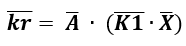

#### Creation of the X matrix

In [278]:
tab_X = np.zeros((54,18))
X = pd.DataFrame(tab_X, index = ['a_free_C', 'a_agg_C', 'a_att_C', 'lw_free_C', 'lw_agg_C', 'lw_att_C','fw_free_C', 'fw_agg_C', 'fw_att_C','sw_free_C', 'sw_agg_C', 'sw_att_C','lw_sed_free_C', 'lw_sed_agg_C', 'lw_sed_att_C','fw_sed_free_C', 'fw_sed_agg_C', 'fw_sed_att_C','sw_sed_free_C', 'sw_sed_agg_C', 'sw_sed_att_C','nat_soil_free_C', 'nat_soil_agg_C', 'nat_soil_att_C','agr_soil_free_C', 'agr_soil_agg_C', 'agr_soil_att_C', 'a_free_G', 'a_agg_G', 'a_att_G','lw_free_G', 'lw_agg_G', 'lw_att_G','fw_free_G', 'fw_agg_G', 'fw_att_G','sw_free_G', 'sw_agg_G', 'sw_att_G','lw_sed_free_G', 'lw_sed_agg_G', 'lw_sed_att_G','fw_sed_free_G', 'fw_sed_agg_G', 'fw_sed_att_G','sw_sed_free_G', 'sw_sed_agg_G', 'sw_sed_att_G','nat_soil_free_G', 'nat_soil_agg_G', 'nat_soil_att_G','agr_soil_free_G', 'agr_soil_agg_G', 'agr_soil_att_G'], columns = ['a_C', 'lw_C', 'fw_C', 'sw_C', 'lw_sed_C', 'fw_sed_C','sw_sed_C','nat_soil_C', 'agr_soil_C','a_G', 'lw_G', 'fw_G', 'sw_G', 'lw_sed_G', 'fw_sed_G','sw_sed_G','nat_soil_G', 'agr_soil_G'])
X

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_free_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a_agg_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a_att_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lw_free_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lw_agg_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lw_att_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fw_free_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fw_agg_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fw_att_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sw_free_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
#function definitions 

def Xfree(k_free_agg, k_free_att, k_agg_tot, k_att_tot):
    Xfree = 1/(1+(k_free_agg/k_agg_tot)+(k_free_att/k_att_tot))
    return(Xfree)

def Xagg(k_free_agg, k_free_att, k_agg_tot, k_att_tot):
    Xagg = (k_free_agg/k_agg_tot)/(1+(k_free_agg/k_agg_tot)+(k_free_att/k_att_tot))
    return(Xagg)

def Xatt(k_free_agg, k_free_att, k_agg_tot, k_att_tot):
    Xatt = (k_free_att/k_att_tot)/(1+(k_free_agg/k_agg_tot)+(k_free_att/k_att_tot))
    return(Xatt) 

In [280]:
#Air Continental 
X['a_C']['a_free_C']= Xfree(k_prim_prim['a_free_C']['a_agg_C'], k_prim_prim['a_free_C']['a_att_C'], 
                            k_prim_prim['a_agg_C']['a_agg_C'], k_prim_prim['a_att_C']['a_att_C'])

X['a_C']['a_agg_C']= Xagg(k_prim_prim['a_free_C']['a_agg_C'], k_prim_prim['a_free_C']['a_att_C'], 
                            k_prim_prim['a_agg_C']['a_agg_C'], k_prim_prim['a_att_C']['a_att_C'])

X['a_C']['a_att_C']= Xatt(k_prim_prim['a_free_C']['a_agg_C'], k_prim_prim['a_free_C']['a_att_C'], 
                            k_prim_prim['a_agg_C']['a_agg_C'], k_prim_prim['a_att_C']['a_att_C'])

#Lakewater Continental 
X['lw_C']['lw_free_C']= Xfree(k_prim_prim['lw_free_C']['lw_agg_C'], k_prim_prim['lw_free_C']['lw_att_C'], 
                            k_prim_prim['lw_agg_C']['lw_agg_C'], k_prim_prim['lw_att_C']['lw_att_C'])

X['lw_C']['lw_agg_C']= Xagg(k_prim_prim['lw_free_C']['lw_agg_C'], k_prim_prim['lw_free_C']['lw_att_C'], 
                            k_prim_prim['lw_agg_C']['lw_agg_C'], k_prim_prim['lw_att_C']['lw_att_C'])

X['lw_C']['lw_att_C']= Xatt(k_prim_prim['lw_free_C']['lw_agg_C'], k_prim_prim['lw_free_C']['lw_att_C'], 
                            k_prim_prim['lw_agg_C']['lw_agg_C'], k_prim_prim['lw_att_C']['lw_att_C'])

#Freshwater Continental 
X['fw_C']['fw_free_C']= Xfree(k_prim_prim['fw_free_C']['fw_agg_C'], k_prim_prim['fw_free_C']['fw_att_C'], 
                            k_prim_prim['fw_agg_C']['fw_agg_C'], k_prim_prim['fw_att_C']['fw_att_C'])

X['fw_C']['fw_agg_C']= Xagg(k_prim_prim['fw_free_C']['fw_agg_C'], k_prim_prim['fw_free_C']['fw_att_C'], 
                            k_prim_prim['fw_agg_C']['fw_agg_C'], k_prim_prim['fw_att_C']['fw_att_C'])

X['fw_C']['fw_att_C']= Xatt(k_prim_prim['fw_free_C']['fw_agg_C'], k_prim_prim['fw_free_C']['fw_att_C'], 
                            k_prim_prim['fw_agg_C']['fw_agg_C'], k_prim_prim['fw_att_C']['fw_att_C'])

#Seawater Continental
X['sw_C']['sw_free_C']= Xfree(k_prim_prim['sw_free_C']['sw_agg_C'], k_prim_prim['sw_free_C']['sw_att_C'], 
                            k_prim_prim['sw_agg_C']['sw_agg_C'], k_prim_prim['sw_att_C']['sw_att_C'])

X['sw_C']['sw_agg_C']= Xagg(k_prim_prim['sw_free_C']['sw_agg_C'], k_prim_prim['sw_free_C']['sw_att_C'], 
                            k_prim_prim['sw_agg_C']['sw_agg_C'], k_prim_prim['sw_att_C']['sw_att_C'])

X['sw_C']['sw_att_C']= Xatt(k_prim_prim['sw_free_C']['sw_agg_C'], k_prim_prim['sw_free_C']['sw_att_C'], 
                            k_prim_prim['sw_agg_C']['sw_agg_C'], k_prim_prim['sw_att_C']['sw_att_C'])

#Lakewater sediment Continental
X['lw_sed_C']['lw_sed_free_C']= Xfree(k_prim_prim['lw_sed_free_C']['lw_sed_agg_C'], k_prim_prim['lw_sed_free_C']['lw_sed_att_C'], 
                            k_prim_prim['lw_sed_agg_C']['lw_sed_agg_C'], k_prim_prim['lw_sed_att_C']['lw_sed_att_C'])

X['lw_sed_C']['lw_sed_agg_C']= Xagg(k_prim_prim['lw_sed_free_C']['lw_sed_agg_C'], k_prim_prim['lw_sed_free_C']['lw_sed_att_C'], 
                            k_prim_prim['lw_sed_agg_C']['lw_sed_agg_C'], k_prim_prim['lw_sed_att_C']['lw_sed_att_C'])

X['lw_sed_C']['lw_sed_att_C']= Xatt(k_prim_prim['lw_sed_free_C']['lw_sed_agg_C'], k_prim_prim['lw_sed_free_C']['lw_sed_att_C'], 
                            k_prim_prim['lw_sed_agg_C']['lw_sed_agg_C'], k_prim_prim['lw_sed_att_C']['lw_sed_att_C'])

#Freshwater sediment Continental 
X['fw_sed_C']['fw_sed_free_C']= Xfree(k_prim_prim['fw_sed_free_C']['fw_sed_agg_C'], k_prim_prim['fw_sed_free_C']['fw_sed_att_C'], 
                            k_prim_prim['fw_sed_agg_C']['fw_sed_agg_C'], k_prim_prim['fw_sed_att_C']['fw_sed_att_C'])

X['fw_sed_C']['fw_sed_agg_C']= Xagg(k_prim_prim['fw_sed_free_C']['fw_sed_agg_C'], k_prim_prim['fw_sed_free_C']['fw_sed_att_C'], 
                            k_prim_prim['fw_sed_agg_C']['fw_sed_agg_C'], k_prim_prim['fw_sed_att_C']['fw_sed_att_C'])

X['fw_sed_C']['fw_sed_att_C']= Xatt(k_prim_prim['fw_sed_free_C']['fw_sed_agg_C'], k_prim_prim['fw_sed_free_C']['fw_sed_att_C'], 
                            k_prim_prim['fw_sed_agg_C']['fw_sed_agg_C'], k_prim_prim['fw_sed_att_C']['fw_sed_att_C'])

#Sea water sediment Continental
X['sw_sed_C']['sw_sed_free_C']= Xfree(k_prim_prim['sw_sed_free_C']['sw_sed_agg_C'], k_prim_prim['sw_sed_free_C']['sw_sed_att_C'], 
                            k_prim_prim['sw_sed_agg_C']['sw_sed_agg_C'], k_prim_prim['sw_sed_att_C']['sw_sed_att_C'])

X['sw_sed_C']['sw_sed_agg_C']= Xagg(k_prim_prim['sw_sed_free_C']['sw_sed_agg_C'], k_prim_prim['sw_sed_free_C']['sw_sed_att_C'], 
                            k_prim_prim['sw_sed_agg_C']['sw_sed_agg_C'], k_prim_prim['sw_sed_att_C']['sw_sed_att_C'])

X['sw_sed_C']['sw_sed_att_C']= Xatt(k_prim_prim['sw_sed_free_C']['sw_sed_agg_C'], k_prim_prim['sw_sed_free_C']['sw_sed_att_C'], 
                            k_prim_prim['sw_sed_agg_C']['sw_sed_agg_C'], k_prim_prim['sw_sed_att_C']['sw_sed_att_C'])

#Natural soil Continental 
X['nat_soil_C']['nat_soil_free_C']= Xfree(k_prim_prim['nat_soil_free_C']['nat_soil_agg_C'], k_prim_prim['nat_soil_free_C']['nat_soil_att_C'], 
                            k_prim_prim['nat_soil_agg_C']['nat_soil_agg_C'], k_prim_prim['nat_soil_att_C']['nat_soil_att_C'])

X['nat_soil_C']['nat_soil_agg_C']= Xagg(k_prim_prim['nat_soil_free_C']['nat_soil_agg_C'], k_prim_prim['nat_soil_free_C']['nat_soil_att_C'], 
                            k_prim_prim['nat_soil_agg_C']['nat_soil_agg_C'], k_prim_prim['nat_soil_att_C']['nat_soil_att_C'])

X['nat_soil_C']['nat_soil_att_C']= Xatt(k_prim_prim['nat_soil_free_C']['nat_soil_agg_C'], k_prim_prim['nat_soil_free_C']['nat_soil_att_C'], 
                            k_prim_prim['nat_soil_agg_C']['nat_soil_agg_C'], k_prim_prim['nat_soil_att_C']['nat_soil_att_C'])

#Agricultural soil Continental
X['agr_soil_C']['agr_soil_free_C']= Xfree(k_prim_prim['agr_soil_free_C']['agr_soil_agg_C'], k_prim_prim['agr_soil_free_C']['agr_soil_att_C'], 
                            k_prim_prim['agr_soil_agg_C']['agr_soil_agg_C'], k_prim_prim['agr_soil_att_C']['agr_soil_att_C'])

X['agr_soil_C']['agr_soil_agg_C']= Xagg(k_prim_prim['agr_soil_free_C']['agr_soil_agg_C'], k_prim_prim['agr_soil_free_C']['agr_soil_att_C'], 
                            k_prim_prim['agr_soil_agg_C']['agr_soil_agg_C'], k_prim_prim['agr_soil_att_C']['agr_soil_att_C'])

X['agr_soil_C']['agr_soil_att_C']= Xatt(k_prim_prim['agr_soil_free_C']['agr_soil_agg_C'], k_prim_prim['agr_soil_free_C']['agr_soil_att_C'], 
                            k_prim_prim['agr_soil_agg_C']['agr_soil_agg_C'], k_prim_prim['agr_soil_att_C']['agr_soil_att_C'])

#Air Global 
X['a_G']['a_free_G']= Xfree(k_prim_prim['a_free_G']['a_agg_G'], k_prim_prim['a_free_G']['a_att_G'], 
                            k_prim_prim['a_agg_G']['a_agg_G'], k_prim_prim['a_att_G']['a_att_G'])

X['a_G']['a_agg_G']= Xagg(k_prim_prim['a_free_G']['a_agg_G'], k_prim_prim['a_free_G']['a_att_G'], 
                            k_prim_prim['a_agg_G']['a_agg_G'], k_prim_prim['a_att_G']['a_att_G'])

X['a_G']['a_att_G']= Xatt(k_prim_prim['a_free_G']['a_agg_G'], k_prim_prim['a_free_G']['a_att_G'], 
                            k_prim_prim['a_agg_G']['a_agg_G'], k_prim_prim['a_att_G']['a_att_G'])

#Lakewater Global 
X['lw_G']['lw_free_G']= Xfree(k_prim_prim['lw_free_G']['lw_agg_G'], k_prim_prim['lw_free_G']['lw_att_G'], 
                            k_prim_prim['lw_agg_G']['lw_agg_G'], k_prim_prim['lw_att_G']['lw_att_G'])

X['lw_G']['lw_agg_G']= Xagg(k_prim_prim['lw_free_G']['lw_agg_G'], k_prim_prim['lw_free_G']['lw_att_G'], 
                            k_prim_prim['lw_agg_G']['lw_agg_G'], k_prim_prim['lw_att_G']['lw_att_G'])

X['lw_G']['lw_att_G']= Xatt(k_prim_prim['lw_free_G']['lw_agg_G'], k_prim_prim['lw_free_G']['lw_att_G'], 
                            k_prim_prim['lw_agg_G']['lw_agg_G'], k_prim_prim['lw_att_G']['lw_att_G'])

#Freshwater Global 
X['fw_G']['fw_free_G']= Xfree(k_prim_prim['fw_free_G']['fw_agg_G'], k_prim_prim['fw_free_G']['fw_att_G'], 
                            k_prim_prim['fw_agg_G']['fw_agg_G'], k_prim_prim['fw_att_G']['fw_att_G'])

X['fw_G']['fw_agg_G']= Xagg(k_prim_prim['fw_free_G']['fw_agg_G'], k_prim_prim['fw_free_G']['fw_att_G'], 
                            k_prim_prim['fw_agg_G']['fw_agg_G'], k_prim_prim['fw_att_G']['fw_att_G'])

X['fw_G']['fw_att_G']= Xatt(k_prim_prim['fw_free_G']['fw_agg_G'], k_prim_prim['fw_free_G']['fw_att_G'], 
                            k_prim_prim['fw_agg_G']['fw_agg_G'], k_prim_prim['fw_att_G']['fw_att_G'])

#Seawater Global
X['sw_G']['sw_free_G']= Xfree(k_prim_prim['sw_free_G']['sw_agg_G'], k_prim_prim['sw_free_G']['sw_att_G'], 
                            k_prim_prim['sw_agg_G']['sw_agg_G'], k_prim_prim['sw_att_G']['sw_att_G'])

X['sw_G']['sw_agg_G']= Xagg(k_prim_prim['sw_free_G']['sw_agg_G'], k_prim_prim['sw_free_G']['sw_att_G'], 
                            k_prim_prim['sw_agg_G']['sw_agg_G'], k_prim_prim['sw_att_G']['sw_att_G'])

X['sw_G']['sw_att_G']= Xatt(k_prim_prim['sw_free_G']['sw_agg_G'], k_prim_prim['sw_free_G']['sw_att_G'], 
                            k_prim_prim['sw_agg_G']['sw_agg_G'], k_prim_prim['sw_att_G']['sw_att_G'])

#Lakewater sediment Global
X['lw_sed_G']['lw_sed_free_G']= Xfree(k_prim_prim['lw_sed_free_G']['lw_sed_agg_G'], k_prim_prim['lw_sed_free_G']['lw_sed_att_G'], 
                            k_prim_prim['lw_sed_agg_G']['lw_sed_agg_G'], k_prim_prim['lw_sed_att_G']['lw_sed_att_G'])

X['lw_sed_G']['lw_sed_agg_G']= Xagg(k_prim_prim['lw_sed_free_G']['lw_sed_agg_G'], k_prim_prim['lw_sed_free_G']['lw_sed_att_G'], 
                            k_prim_prim['lw_sed_agg_G']['lw_sed_agg_G'], k_prim_prim['lw_sed_att_G']['lw_sed_att_G'])

X['lw_sed_G']['lw_sed_att_G']= Xatt(k_prim_prim['lw_sed_free_G']['lw_sed_agg_G'], k_prim_prim['lw_sed_free_G']['lw_sed_att_G'], 
                            k_prim_prim['lw_sed_agg_G']['lw_sed_agg_G'], k_prim_prim['lw_sed_att_G']['lw_sed_att_G'])

#Freshwater sediment Global 
X['fw_sed_G']['fw_sed_free_G']= Xfree(k_prim_prim['fw_sed_free_G']['fw_sed_agg_G'], k_prim_prim['fw_sed_free_G']['fw_sed_att_G'], 
                            k_prim_prim['fw_sed_agg_G']['fw_sed_agg_G'], k_prim_prim['fw_sed_att_G']['fw_sed_att_G'])

X['fw_sed_G']['fw_sed_agg_G']= Xagg(k_prim_prim['fw_sed_free_G']['fw_sed_agg_G'], k_prim_prim['fw_sed_free_G']['fw_sed_att_G'], 
                            k_prim_prim['fw_sed_agg_G']['fw_sed_agg_G'], k_prim_prim['fw_sed_att_G']['fw_sed_att_G'])

X['fw_sed_G']['fw_sed_att_G']= Xatt(k_prim_prim['fw_sed_free_G']['fw_sed_agg_G'], k_prim_prim['fw_sed_free_G']['fw_sed_att_G'], 
                            k_prim_prim['fw_sed_agg_G']['fw_sed_agg_G'], k_prim_prim['fw_sed_att_G']['fw_sed_att_G'])

#Sea water sediment Global
X['sw_sed_G']['sw_sed_free_G']= Xfree(k_prim_prim['sw_sed_free_G']['sw_sed_agg_G'], k_prim_prim['sw_sed_free_G']['sw_sed_att_G'], 
                            k_prim_prim['sw_sed_agg_G']['sw_sed_agg_G'], k_prim_prim['sw_sed_att_G']['sw_sed_att_G'])

X['sw_sed_G']['sw_sed_agg_G']= Xagg(k_prim_prim['sw_sed_free_G']['sw_sed_agg_G'], k_prim_prim['sw_sed_free_G']['sw_sed_att_G'], 
                            k_prim_prim['sw_sed_agg_G']['sw_sed_agg_G'], k_prim_prim['sw_sed_att_G']['sw_sed_att_G'])

X['sw_sed_G']['sw_sed_att_G']= Xatt(k_prim_prim['sw_sed_free_G']['sw_sed_agg_G'], k_prim_prim['sw_sed_free_G']['sw_sed_att_G'], 
                            k_prim_prim['sw_sed_agg_G']['sw_sed_agg_G'], k_prim_prim['sw_sed_att_G']['sw_sed_att_G'])

#Natural soil Global 
X['nat_soil_G']['nat_soil_free_G']= Xfree(k_prim_prim['nat_soil_free_G']['nat_soil_agg_G'], k_prim_prim['nat_soil_free_G']['nat_soil_att_G'], 
                            k_prim_prim['nat_soil_agg_G']['nat_soil_agg_G'], k_prim_prim['nat_soil_att_G']['nat_soil_att_G'])

X['nat_soil_G']['nat_soil_agg_G']= Xagg(k_prim_prim['nat_soil_free_G']['nat_soil_agg_G'], k_prim_prim['nat_soil_free_G']['nat_soil_att_G'], 
                            k_prim_prim['nat_soil_agg_G']['nat_soil_agg_G'], k_prim_prim['nat_soil_att_G']['nat_soil_att_G'])

X['nat_soil_G']['nat_soil_att_G']= Xatt(k_prim_prim['nat_soil_free_G']['nat_soil_agg_G'], k_prim_prim['nat_soil_free_G']['nat_soil_att_G'], 
                            k_prim_prim['nat_soil_agg_G']['nat_soil_agg_G'], k_prim_prim['nat_soil_att_G']['nat_soil_att_G'])

#Agricultural soil Global
X['agr_soil_G']['agr_soil_free_G']= Xfree(k_prim_prim['agr_soil_free_G']['agr_soil_agg_G'], k_prim_prim['agr_soil_free_G']['agr_soil_att_G'], 
                            k_prim_prim['agr_soil_agg_G']['agr_soil_agg_G'], k_prim_prim['agr_soil_att_G']['agr_soil_att_G'])

X['agr_soil_G']['agr_soil_agg_G']= Xagg(k_prim_prim['agr_soil_free_G']['agr_soil_agg_G'], k_prim_prim['agr_soil_free_G']['agr_soil_att_G'], 
                            k_prim_prim['agr_soil_agg_G']['agr_soil_agg_G'], k_prim_prim['agr_soil_att_G']['agr_soil_att_G'])

X['agr_soil_G']['agr_soil_att_G']= Xatt(k_prim_prim['agr_soil_free_G']['agr_soil_agg_G'], k_prim_prim['agr_soil_free_G']['agr_soil_att_G'], 
                            k_prim_prim['agr_soil_agg_G']['agr_soil_agg_G'], k_prim_prim['agr_soil_att_G']['agr_soil_att_G'])

In [281]:
X

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_free_C,1.534302e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
a_agg_C,9.846569e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
a_att_C,4.424330e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lw_free_C,0.000000e+00,0.033169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lw_agg_C,0.000000e+00,0.966629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lw_att_C,0.000000e+00,0.000202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fw_free_C,0.000000e+00,0.000000,0.061727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fw_agg_C,0.000000e+00,0.000000,0.930857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fw_att_C,0.000000e+00,0.000000,0.007416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sw_free_C,0.000000e+00,0.000000,0.000000,0.012334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [282]:
X['a_C']['a_free_C']+X['a_C']['a_agg_C']+X['a_C']['a_att_C']

1.0

#### Creation of the A matrix

In [284]:
tab_A = np.zeros((18,54))
A = pd.DataFrame(tab_A, columns = ['a_free_C', 'a_agg_C', 'a_att_C', 'lw_free_C', 'lw_agg_C', 'lw_att_C','fw_free_C', 'fw_agg_C', 'fw_att_C','sw_free_C', 'sw_agg_C', 'sw_att_C','lw_sed_free_C', 'lw_sed_agg_C', 'lw_sed_att_C','fw_sed_free_C', 'fw_sed_agg_C', 'fw_sed_att_C','sw_sed_free_C', 'sw_sed_agg_C', 'sw_sed_att_C','nat_soil_free_C', 'nat_soil_agg_C', 'nat_soil_att_C','agr_soil_free_C', 'agr_soil_agg_C', 'agr_soil_att_C', 'a_free_G', 'a_agg_G', 'a_att_G','lw_free_G', 'lw_agg_G', 'lw_att_G','fw_free_G', 'fw_agg_G', 'fw_att_G','sw_free_G', 'sw_agg_G', 'sw_att_G','lw_sed_free_G', 'lw_sed_agg_G', 'lw_sed_att_G','fw_sed_free_G', 'fw_sed_agg_G', 'fw_sed_att_G','sw_sed_free_G', 'sw_sed_agg_G', 'sw_sed_att_G','nat_soil_free_G', 'nat_soil_agg_G', 'nat_soil_att_G','agr_soil_free_G', 'agr_soil_agg_G', 'agr_soil_att_G'], index = ['a_C', 'lw_C', 'fw_C', 'sw_C', 'lw_sed_C', 'fw_sed_C','sw_sed_C','nat_soil_C', 'agr_soil_C','a_G', 'lw_G', 'fw_G', 'sw_G', 'lw_sed_G', 'fw_sed_G','sw_sed_G','nat_soil_G', 'agr_soil_G'])
A

,a_free_C,a_agg_C,a_att_C,lw_free_C,lw_agg_C,lw_att_C,fw_free_C,fw_agg_C,fw_att_C,sw_free_C,...,fw_sed_att_G,sw_sed_free_G,sw_sed_agg_G,sw_sed_att_G,nat_soil_free_G,nat_soil_agg_G,nat_soil_att_G,agr_soil_free_G,agr_soil_agg_G,agr_soil_att_G
a_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lw_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fw_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sw_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lw_sed_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fw_sed_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sw_sed_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nat_soil_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agr_soil_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a_G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [285]:
#Air continental
A['a_free_C']['a_C'] = 1
A['a_agg_C']['a_C'] = 1
A['a_att_C']['a_C'] = 1

#Lake water continental
A['lw_free_C']['lw_C'] = 1
A['lw_agg_C']['lw_C'] = 1
A['lw_att_C']['lw_C'] = 1

#Freshwater continental 
A['fw_free_C']['fw_C'] = 1
A['fw_agg_C']['fw_C'] = 1
A['fw_att_C']['fw_C'] = 1

#Seawater continental
A['sw_free_C']['sw_C'] = 1
A['sw_agg_C']['sw_C'] = 1
A['sw_att_C']['sw_C'] = 1

#Lake water sediment continental
A['lw_sed_free_C']['lw_sed_C'] = 1
A['lw_sed_agg_C']['lw_sed_C'] = 1
A['lw_sed_att_C']['lw_sed_C'] = 1

#Freshwater sediment continental
A['fw_sed_free_C']['fw_sed_C'] = 1
A['fw_sed_agg_C']['fw_sed_C'] = 1
A['fw_sed_att_C']['fw_sed_C'] = 1

#Sea water sediment continental 
A['sw_sed_free_C']['sw_sed_C'] = 1
A['sw_sed_agg_C']['sw_sed_C'] = 1
A['sw_sed_att_C']['sw_sed_C'] = 1

#Natural soil continental
A['nat_soil_free_C']['nat_soil_C'] = 1
A['nat_soil_agg_C']['nat_soil_C'] = 1
A['nat_soil_att_C']['nat_soil_C'] = 1

#Agricultural soil continental
A['agr_soil_free_C']['agr_soil_C'] = 1
A['agr_soil_agg_C']['agr_soil_C'] = 1
A['agr_soil_att_C']['agr_soil_C'] = 1

#Air global
A['a_free_G']['a_G'] = 1
A['a_agg_G']['a_G'] = 1
A['a_att_G']['a_G'] = 1

#Lake water global
A['lw_free_G']['lw_G'] = 1
A['lw_agg_G']['lw_G'] = 1
A['lw_att_G']['lw_G'] = 1

#Freshwater global 
A['fw_free_G']['fw_G'] = 1
A['fw_agg_G']['fw_G'] = 1
A['fw_att_G']['fw_G'] = 1

#Seawater global
A['sw_free_G']['sw_G'] = 1
A['sw_agg_G']['sw_G'] = 1
A['sw_att_G']['sw_G'] = 1

#Lake water sediment global
A['lw_sed_free_G']['lw_sed_G'] = 1
A['lw_sed_agg_G']['lw_sed_G'] = 1
A['lw_sed_att_G']['lw_sed_G'] = 1

#Freshwater sediment global
A['fw_sed_free_G']['fw_sed_G'] = 1
A['fw_sed_agg_G']['fw_sed_G'] = 1
A['fw_sed_att_G']['fw_sed_G'] = 1

#Sea water sediment global 
A['sw_sed_free_G']['sw_sed_G'] = 1
A['sw_sed_agg_G']['sw_sed_G'] = 1
A['sw_sed_att_G']['sw_sed_G'] = 1

#Natural soil global
A['nat_soil_free_G']['nat_soil_G'] = 1
A['nat_soil_agg_G']['nat_soil_G'] = 1
A['nat_soil_att_G']['nat_soil_G'] = 1

#Agricultural soil global
A['agr_soil_free_G']['agr_soil_G'] = 1
A['agr_soil_agg_G']['agr_soil_G'] = 1
A['agr_soil_att_G']['agr_soil_G'] = 1

In [286]:
A

,a_free_C,a_agg_C,a_att_C,lw_free_C,lw_agg_C,lw_att_C,fw_free_C,fw_agg_C,fw_att_C,sw_free_C,...,fw_sed_att_G,sw_sed_free_G,sw_sed_agg_G,sw_sed_att_G,nat_soil_free_G,nat_soil_agg_G,nat_soil_att_G,agr_soil_free_G,agr_soil_agg_G,agr_soil_att_G
a_C,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lw_C,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fw_C,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sw_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lw_sed_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fw_sed_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sw_sed_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nat_soil_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agr_soil_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a_G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Matrix multiplication between k1 and X

##### Creation of k1 (from k_prim_prim)

In [289]:
def apply_negative_on_diagonal(df):
    if df.shape[0] != df.shape[1]:
        raise ValueError("Le dataframe doit être carré (même nombre de lignes et de colonnes).")
    
    for i in range(df.shape[0]):
        df.iat[i, i] = -df.iat[i, i]
    
    return df

In [290]:
k1 = k_prim_prim.copy() #k1 is a copy of k_prim_prim with negative diagonal elements
k1 = apply_negative_on_diagonal(k1)

In [291]:
k1

,a_free_C,a_agg_C,a_att_C,lw_free_C,lw_agg_C,lw_att_C,fw_free_C,fw_agg_C,fw_att_C,sw_free_C,...,fw_sed_att_G,sw_sed_free_G,sw_sed_agg_G,sw_sed_att_G,nat_soil_free_G,nat_soil_agg_G,nat_soil_att_G,agr_soil_free_G,agr_soil_agg_G,agr_soil_att_G
a_free_C,-2.691723e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_agg_C,2.650451e-04,-4.129957e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_att_C,2.009489e-10,0.000000e+00,-6.968653e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_free_C,7.655219e-09,0.000000e+00,0.000000e+00,-5.629286e-06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_agg_C,0.000000e+00,7.656852e-09,0.000000e+00,5.421768e-06,-1.860453e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_att_C,0.000000e+00,0.000000e+00,3.163058e-07,2.147250e-08,0.000000e+00,-3.525124e-06,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_free_C,1.177726e-09,0.000000e+00,0.000000e+00,1.353253e-07,0.000000e+00,0.000000e+00,-0.000023,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_agg_C,0.000000e+00,1.177977e-09,0.000000e+00,0.000000e+00,1.353253e-07,0.000000e+00,0.000019,-0.000001,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_att_C,0.000000e+00,0.000000e+00,4.866243e-08,0.000000e+00,0.000000e+00,1.353253e-07,0.000004,0.000000,-0.000030,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sw_free_C,3.605082e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000001,0.000000,0.000000,-7.000587e-06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


##### Matrix multiplication

In [293]:
k1X = k1.dot(X)

In [294]:
k1X

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_free_C,-4.129915e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.745429e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_agg_C,2.335844e-22,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.905353e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_att_C,2.970694e-28,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.705900e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_free_C,1.174542e-10,-1.867200e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.189943e-11,2.189943e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_agg_C,7.539372e-09,-2.702183e-23,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.923264e-09,2.923264e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_att_C,1.399441e-14,-7.741462e-26,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.779025e-13,3.779025e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_free_C,1.806987e-11,4.488659e-09,-1.443327e-06,0.000000e+00,0.000000e+00,5.175308e-11,0.000000e+00,3.415405e-12,3.415405e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_agg_C,1.159903e-09,1.308093e-07,4.516598e-24,0.000000e+00,0.000000e+00,2.913786e-09,0.000000e+00,4.559082e-10,4.559082e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_att_C,2.152986e-15,2.734166e-11,-2.933893e-23,0.000000e+00,0.000000e+00,5.006622e-09,0.000000e+00,3.779025e-13,3.779025e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sw_free_C,5.531284e-09,0.000000e+00,7.262866e-08,-8.634418e-08,0.000000e+00,0.000000e+00,1.680732e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.947263e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


#### Matrix multiplication between k1X and A to obtain K final

In [296]:
K = A.dot(k1X)
K

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_C,-4.129915e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.922807e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_C,7.656841e-09,-1.867200e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.945542e-09,2.945542e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_C,1.177975e-09,1.353253e-07,-1.443327e-06,0.000000e+00,0.000000e+00,7.972162e-09,0.000000e+00,4.597015e-10,4.597015e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sw_C,3.605850e-07,0.000000e+00,1.176613e-06,-8.634418e-08,0.000000e+00,0.000000e+00,2.672636e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.330786e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_sed_C,0.000000e+00,6.746405e-10,0.000000e+00,0.000000e+00,-1.792686e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_sed_C,0.000000e+00,0.000000e+00,2.159936e-07,0.000000e+00,0.000000e+00,-1.872408e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sw_sed_C,0.000000e+00,0.000000e+00,0.000000e+00,3.503391e-09,0.000000e+00,0.000000e+00,-1.813469e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
nat_soil_C,1.278010e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.948537e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
agr_soil_C,1.094072e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.948537e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_G,1.388051e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.585717e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## V. Calculation of the Fate Factor Matrix (FF)

### Definition

FF is calculated according to the following formula: (Hajjar et al. 2023)

<img src="FF.png" width="200">

### Invertion of k

In [302]:
#k is in s-1 let's put it in d-1
K_day = K*3600*24

#Inversion of matrix k
FF = - pd.DataFrame(np.linalg.inv(K_day.values), K_day.columns, K_day.index)

### FF (in days)

In [304]:
FF

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_C,2.819966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
lw_C,0.142363,61.986268,0.000000,0.000000,0.000000,0.000000,0.000000,0.046241,0.046241,0.002624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
fw_C,0.016293,5.849059,8.070449,0.000000,0.000000,0.343616,0.000000,0.005303,0.005303,0.000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
sw_C,12.009034,79.755939,110.046113,134.131154,0.000000,4.685440,1.976784,0.072309,0.072309,0.229664,0.000299,0.006014,0.013867,0.000000,0.000256,0.000225,5.312903e-07,5.312903e-07
lw_sed_C,0.000536,0.233273,0.000000,0.000000,64.562748,0.000000,0.000000,0.000174,0.000174,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
fw_sed_C,0.018795,6.747245,9.309753,0.000000,0.000000,62.210238,0.000000,0.006117,0.006117,0.000346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
sw_sed_C,0.231999,1.540783,2.125951,2.591243,0.000000,0.090517,63.861020,0.001397,0.001397,0.004437,0.000006,0.000116,0.000268,0.000000,0.000005,0.000004,1.026385e-08,1.026385e-08
nat_soil_C,0.912729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.931231,0.000000,0.016823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
agr_soil_C,0.781364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.931231,0.014402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
a_G,2.468446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.344451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


### Save FF in an csv file  

In [306]:
os.makedirs('folder/subfolder', exist_ok=True)  
FF.to_csv('C:/Users/louve/Documents/Maitrise_CIRAIG/Travail maîtrise/Resultats/''FF_'+regions+'_'+type_polymer+'_'+size_polymer_raw+'um.csv')  

## VI. Calculation of the combined exposure and effect factor matrix (EEF)

### Definition

The combined exposure and effect factor is calculated using the following equation: (Owsianiak et al., 2023)

<img src="EEF.png" width="200">

### EEF for aquatic ecosystems 

The last updated EEF for microplastics in aquatic ecosystems is:

In [313]:
EEF_aq = 1067.51 #Combined exposure and effect factor (in PAF.m3/kg) - source : Corella-Puertas et al. 2023

### EEF for sedimentary ecosystems 

In [315]:
EEF_sed = 16.173 #Combined exposure and effect factor (in PAF.m3/kg) - source : Saadi et al., in preparation

### EEF for terrestrial ecosystems 

In [317]:
EEF_ter = 0.541 #Combined exposure and effect factor (in PAF.m3/kg) - source : Tunali et al., in preparation

### Creation of the EEF matrix

In [319]:
#Creation of an empty matrix [3 x 18]
tab_EEF = np.zeros((18,18))
EEF = pd.DataFrame(tab_EEF, index = ['a_C','lw_C', 'fw_C', 'sw_C', 'lw_sed_C', 'fw_sed_C', 'sw_sed_C', 'nat_soil_C', 'agr_soil_C', 'a_G','lw_G', 'fw_G', 'sw_G', 'lw_sed_G', 'fw_sed_G', 'sw_sed_G', 'nat_soil_G', 'agr_soil_G'], columns = ['a_C','lw_C', 'fw_C', 'sw_C', 'lw_sed_C', 'fw_sed_C', 'sw_sed_C', 'nat_soil_C', 'agr_soil_C', 'a_G','lw_G', 'fw_G', 'sw_G', 'lw_sed_G', 'fw_sed_G', 'sw_sed_G', 'nat_soil_G', 'agr_soil_G'])

EEF.loc['lw_C','lw_C'] = EEF_aq
EEF.loc['fw_C','fw_C'] = EEF_aq
EEF.loc['sw_C','sw_C'] = EEF_aq
EEF.loc['lw_G','lw_G'] = EEF_aq
EEF.loc['fw_G','fw_G'] = EEF_aq
EEF.loc['sw_G','sw_G'] = EEF_aq

EEF.loc['lw_sed_C','lw_sed_C'] = EEF_sed
EEF.loc['fw_sed_C','fw_sed_C'] = EEF_sed
EEF.loc['sw_sed_C','sw_sed_C'] = EEF_sed
EEF.loc['lw_sed_G','lw_sed_G'] = EEF_sed
EEF.loc['fw_sed_G','fw_sed_G'] = EEF_sed
EEF.loc['sw_sed_G','sw_sed_G'] = EEF_sed

EEF.loc['nat_soil_C','nat_soil_C'] = EEF_ter
EEF.loc['agr_soil_C','agr_soil_C'] = EEF_ter
EEF.loc['nat_soil_G','nat_soil_G'] = EEF_ter
EEF.loc['agr_soil_G','agr_soil_G'] = EEF_ter

In [320]:
EEF

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_C,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000
lw_C,0.0,1067.51,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000
fw_C,0.0,0.00,1067.51,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000
sw_C,0.0,0.00,0.00,1067.51,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000
lw_sed_C,0.0,0.00,0.00,0.00,16.173,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000
fw_sed_C,0.0,0.00,0.00,0.00,0.000,16.173,0.000,0.000,0.000,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000
sw_sed_C,0.0,0.00,0.00,0.00,0.000,0.000,16.173,0.000,0.000,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000
nat_soil_C,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.541,0.000,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000
agr_soil_C,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.541,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000
a_G,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000


## VII. Calculation of the Species Density Fraction matrices (SDF)

### Marine Ecosystem

#### fraction wc/sed

The marine ecosystem is composed of species feeding in the water column and species feeding in sediment.
According to Saadi et al, in preparation :
- The fraction of **species feeding in water column** in the marine ecosystem is **44.58%**
- The fraction of **species feeding in sediments** in the marine ecosystem is **55.42%**

In [325]:
FracSpe_wc_marine = 0.4458 #fraction of marine species feeding in the water column - Saadi et al., in preparation
FracSpe_sed_marine = 0.5542 #fraction of marine species feeding in the sediment - Saadi et al., in preparation

#### fraction C/G

The abundance of species differs between the continental scale (near the coasts) and the global scale (open ocean and other coasts)

In [328]:
FracSpe_C_marine = df_region_list.loc[regions,'dens_marine_species_C'] #fraction of marine species living in continental sea water - Tittensor et al., 2010
FracSpe_G_marine = df_region_list.loc[regions,'dens_marine_species_RoW'] #fraction of marine species living in global sea water - Tittensor et al., 2010

#### SDFs - Marine Ecosytem

In [330]:
SDF_ME_sw_C = FracSpe_wc_marine*FracSpe_C_marine
SDF_ME_sw_sed_C = FracSpe_sed_marine*FracSpe_C_marine
SDF_ME_sw_G = FracSpe_wc_marine*FracSpe_G_marine
SDF_ME_sw_sed_G = FracSpe_sed_marine*FracSpe_G_marine

In [331]:
#verification addition of the two fractions equal 1
SDF_ME_sw_C + SDF_ME_sw_sed_C + SDF_ME_sw_G + SDF_ME_sw_sed_G

1.0

In [332]:
SDF_ME_sw_G

0.37282254

### Aquatic Ecosystem (lake water and freshwater)

#### fraction lake/river

According to the IUCN Red List : 
- The fraction of species living in **rivers** is **73.85%**
- The fraction of species living in **lakes** is **26.15%**

In [336]:
FracSpe_river = 0.7385 #fraction of aquatic species living in rivers - IUCN Red List, 2024
FracSpe_lake = 0.2615 #fraction of aquatic species living in lakes - IUCN Red List, 2024

#### fraction wc/sed

According to Schmidt-Kloiber et al., 2024 : 
- The fraction of species feeding in **water column** in freshwater is **29.89%**
- The fraction of species feeding in **sediment** in freshwater is **70.11%**

In [339]:
FracSpe_wc_aqua = 0.2989 #fraction of aquatic species living in water column - Schmidt-Kloiber et al., 2024
FracSpe_sed_aqua = 0.7011 #fraction of aquatic species living in sediments - Schmidt-Kloiber et al., 2024

#### fraction C/G

In [341]:
FracSpe_C_aqua = df_region_list.loc[regions,'dens_fw_species_C'] #density of species living in continent - IUCN Red List, 2024
FracSpe_G_aqua = df_region_list.loc[regions,'dens_fw_species_RoW'] #density of species living in the rest of the world  IUCN Red List, 2024

#### SDFs - Aquatic Ecosystem

In [343]:
SDF_AE_lw_C = FracSpe_lake*FracSpe_wc_aqua*FracSpe_C_aqua
SDF_AE_lw_sed_C = FracSpe_lake*FracSpe_sed_aqua*FracSpe_C_aqua
SDF_AE_fw_C = FracSpe_river*FracSpe_wc_aqua*FracSpe_C_aqua
SDF_AE_fw_sed_C = FracSpe_river*FracSpe_sed_aqua*FracSpe_C_aqua

SDF_AE_lw_G = FracSpe_lake*FracSpe_wc_aqua*FracSpe_G_aqua
SDF_AE_lw_sed_G = FracSpe_lake*FracSpe_sed_aqua*FracSpe_G_aqua
SDF_AE_fw_G = FracSpe_river*FracSpe_wc_aqua*FracSpe_G_aqua
SDF_AE_fw_sed_G = FracSpe_river*FracSpe_sed_aqua*FracSpe_G_aqua

In [344]:
#verification addition of the fractions equal 1
SDF_AE_lw_C+SDF_AE_lw_sed_C+SDF_AE_fw_C+SDF_AE_fw_sed_C+SDF_AE_lw_G+SDF_AE_lw_sed_G+SDF_AE_fw_G+SDF_AE_fw_sed_G

1.0

### Terrestrial Ecosystem 

#### fraction nat.soil/agr.soil

The abundance of species found in the natural soil and the agricultural soil differs.

According to IUCN : 
- The fraction of species found in **natural soil** is **92%**
- The fraction of species found in  **agricultural soil** is **8%**

In [348]:
FracSpe_nat_soil = 0.92
FracSpe_agr_soil = 0.08

#### fraction C/G

In [350]:
FracSpe_C_ter = df_region_list.loc[regions,'dens_ter_species_C'] #density of species living in continent - IUCN Red List, 2024
FracSpe_G_ter = df_region_list.loc[regions,'dens_ter_species_RoW'] #density of species living in the rest of the world  IUCN Red List, 2024

#### SDFs - Terrestrial Ecosystem

In [352]:
SDF_TE_nat_soil_C = FracSpe_nat_soil*FracSpe_C_ter
SDF_TE_agr_soil_C = FracSpe_agr_soil*FracSpe_C_ter
SDF_TE_nat_soil_G = FracSpe_nat_soil*FracSpe_G_ter
SDF_TE_agr_soil_G = FracSpe_agr_soil*FracSpe_G_ter

In [353]:
#verification addition of the fractions equal 1
SDF_TE_nat_soil_C+SDF_TE_agr_soil_C+SDF_TE_nat_soil_G+SDF_TE_agr_soil_G

1.0

### SDF matrix

In [355]:
tab_SDF = np.zeros((3,18))
SDF = pd.DataFrame(tab_SDF, index = ['Marine_Ecosystem', 'Aquatic_Ecosystem', 'Terrestrial_Ecosystem'], columns = ['a_C','lw_C', 'fw_C', 'sw_C', 'lw_sed_C', 'fw_sed_C', 'sw_sed_C', 'nat_soil_C', 'agr_soil_C', 'a_G','lw_G', 'fw_G', 'sw_G', 'lw_sed_G', 'fw_sed_G', 'sw_sed_G', 'nat_soil_G', 'agr_soil_G'])

#Filling the matrix with the SDFs calculated above

#SDF for the marine ecosystem
SDF.loc['Marine_Ecosystem','sw_C'] = SDF_ME_sw_C
SDF.loc['Marine_Ecosystem','sw_sed_C'] = SDF_ME_sw_sed_C
SDF.loc['Marine_Ecosystem','sw_G'] = SDF_ME_sw_G
SDF.loc['Marine_Ecosystem','sw_sed_G'] = SDF_ME_sw_sed_G

#SDF for the aquatic ecosystem
SDF.loc['Aquatic_Ecosystem','lw_C'] = SDF_AE_lw_C
SDF.loc['Aquatic_Ecosystem','lw_sed_C'] = SDF_AE_lw_sed_C
SDF.loc['Aquatic_Ecosystem','fw_C'] = SDF_AE_fw_C
SDF.loc['Aquatic_Ecosystem','fw_sed_C'] = SDF_AE_fw_sed_C
SDF.loc['Aquatic_Ecosystem','lw_G'] = SDF_AE_lw_G
SDF.loc['Aquatic_Ecosystem','lw_sed_G'] = SDF_AE_lw_sed_G
SDF.loc['Aquatic_Ecosystem','fw_G'] = SDF_AE_fw_G
SDF.loc['Aquatic_Ecosystem','fw_sed_G'] = SDF_AE_fw_sed_G

#SDF for the terrestrial ecosystem
SDF.loc['Terrestrial_Ecosystem','nat_soil_C'] = SDF_TE_nat_soil_C
SDF.loc['Terrestrial_Ecosystem','agr_soil_C'] = SDF_TE_agr_soil_C
SDF.loc['Terrestrial_Ecosystem','nat_soil_G'] = SDF_TE_nat_soil_G
SDF.loc['Terrestrial_Ecosystem','agr_soil_G'] = SDF_TE_agr_soil_G

SDF

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
Marine_Ecosystem,0.0,0.000000,0.00000,0.072977,0.000000,0.000000,0.090723,0.00000,0.00000,0.0,0.00000,0.000000,0.372823,0.000000,0.000000,0.463477,0.00000,0.00000
Aquatic_Ecosystem,0.0,0.006972,0.01969,0.000000,0.016354,0.046184,0.000000,0.00000,0.00000,0.0,0.07119,0.201048,0.000000,0.166984,0.471578,0.000000,0.00000,0.00000
Terrestrial_Ecosystem,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.12052,0.01048,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.79948,0.06952


In [356]:
SDF.to_csv('C:/Users/louve/Documents/Maitrise_CIRAIG/Travail maîtrise/Resultats/''SDF_'+regions+'.csv')

In [357]:
#Verifications - Each row should be equal to 1
SDF_sum_rows = SDF.sum(axis=1)
SDF_sum_rows

Marine_Ecosystem         1.0
Aquatic_Ecosystem        1.0
Terrestrial_Ecosystem    1.0
dtype: float64

## VIII. Calculation of the Characterization factor matrix (CF)

### Definition

CF is calculated by multiplying EEF and FF

### Matrix Multiplication EEFxFF

Calculation of the priliminary CF

In [363]:
CF_comp = EEF.dot(FF)

In [364]:
CF_comp

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
lw_C,151.974151,66170.960769,0.000000,0.000000,0.000000,0.000000,0.000000,49.362416,49.362416,2.801200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
fw_C,17.392712,6243.928880,8615.284492,0.000000,0.000000,366.813482,0.000000,5.660885,5.660885,0.320584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
sw_C,12819.763506,85140.261944,117475.325638,143186.347978,0.000000,5001.753950,2110.237019,77.190053,77.190053,245.168115,0.319284,6.420061,14.802659,0.000000,0.273347,0.240473,5.671578e-04,5.671578e-04
lw_sed_C,0.008665,3.772717,0.000000,0.000000,1044.173319,0.000000,0.000000,0.002814,0.002814,0.000160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
fw_sed_C,0.303967,109.123197,150.566639,0.000000,0.000000,1006.126174,0.000000,0.098934,0.098934,0.005603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
sw_sed_C,3.752123,24.919084,34.382998,41.908170,0.000000,1.463927,1032.824275,0.022592,0.022592,0.071756,0.000093,0.001879,0.004332,0.000000,0.000080,0.000070,1.659973e-07,1.659973e-07
nat_soil_C,0.493786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.585796,0.000000,0.009102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
agr_soil_C,0.422718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.585796,0.007792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
a_G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


### Midpoint level

#### Midpoint CFs in PAF.day/kg

##### Calculation of CF_comp [in PAF.day/kg]

In [368]:
#Division of each row of CF_comp by the volume of the compartment

#List of volume
list_volume = [VOLUME_a_C, VOLUME_lw_C, VOLUME_fw_C, VOLUME_sw_C, VOLUME_lw_sed_C, VOLUME_fw_sed_C, 
               VOLUME_sw_sed_C, VOLUME_nat_soil_C, VOLUME_agr_soil_C, VOLUME_a_G, VOLUME_lw_G, 
               VOLUME_fw_G, VOLUME_sw_G, VOLUME_lw_sed_G, VOLUME_fw_sed_G, VOLUME_sw_sed_G, 
               VOLUME_nat_soil_G, VOLUME_nat_soil_G]

CF_comp_PAF_day = CF_comp.div(list_volume, axis=0) #CFs in PAF.day/kg
CF_comp_PAF_day

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_C,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_C,3.631465e-10,1.581174e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.179529e-10,1.179529e-10,6.693547e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_C,2.356391e-09,8.459370e-07,1.167212e-06,0.000000e+00,0.000000e+00,4.969645e-08,0.000000e+00,7.669453e-10,7.669453e-10,4.343320e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sw_C,5.717927e-11,3.797463e-10,5.239686e-10,6.386460e-10,0.000000e+00,2.230904e-11,9.412171e-12,3.442864e-13,3.442864e-13,1.093510e-12,1.424086e-15,2.863504e-14,6.602346e-14,0.000000e+00,1.219196e-15,1.072569e-15,2.529662e-18,2.529662e-18
lw_sed_C,1.824083e-12,7.942227e-10,0.000000e+00,0.000000e+00,2.198167e-07,0.000000e+00,0.000000e+00,5.924767e-13,5.924767e-13,3.362165e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_sed_C,4.159373e-10,1.493202e-07,2.060299e-07,0.000000e+00,0.000000e+00,1.376746e-06,0.000000e+00,1.353770e-10,1.353770e-10,7.666592e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sw_sed_C,1.673538e-11,1.111452e-10,1.533565e-10,1.869206e-10,0.000000e+00,6.529471e-12,4.606648e-09,1.007667e-13,1.007667e-13,3.200513e-13,4.168054e-16,8.380980e-15,1.932393e-14,0.000000e+00,3.568375e-16,3.139223e-16,7.403883e-19,7.403883e-19
nat_soil_C,1.136657e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.650375e-12,0.000000e+00,2.095095e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
agr_soil_C,1.136657e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.264085e-12,2.095095e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_G,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


##### Multiplication by the SDF matrix

In [370]:
CF_mid_PAF_day = SDF.dot(CF_comp_PAF_day)
CF_mid_PAF_day

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
Marine_Ecosystem,5.758533e-12,3.785955e-11,5.223807e-11,6.367106e-11,0.000000e+00,2.224143e-12,4.186152e-10,3.432431e-14,3.432431e-14,2.813938e-13,6.306121e-15,1.268013e-13,2.923643e-13,0.000000e+00,5.398827e-15,1.322167e-11,1.120182e-17,1.120182e-17
Aquatic_Ecosystem,7.422519e-11,2.466799e-08,3.249753e-08,0.000000e+00,3.594821e-09,6.456272e-08,0.000000e+00,2.218537e-11,2.218537e-11,1.927746e-11,8.486472e-10,1.581561e-08,0.000000e+00,4.204489e-10,1.140264e-08,0.000000e+00,1.431500e-12,1.431500e-12
Terrestrial_Ecosystem,1.623499e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.399432e-13,4.468761e-14,4.275653e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.583803e-13,1.377220e-14


In [371]:
os.makedirs('folder/subfolder', exist_ok=True)  
CF_mid_PAF_day.to_csv('C:/Users/louve/Documents/Maitrise_CIRAIG/Travail maîtrise/Resultats/''CF_mid_PAF_day_'+regions+'_'+type_polymer+'_'+size_polymer_raw+'um.csv')

### Endpoint Level

In [373]:
SF = 1 #Severity Factor (PAF to PDF) - source : Oginah et al., in preparation

##### Multiplication of CF_comp_PAF_day by SF/365

In [375]:
CF_comp_PDF_year = CF_comp_PAF_day*(SF/365)
CF_comp_PDF_year

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_C,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_C,9.949221e-13,4.331983e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.231586e-13,3.231586e-13,1.833849e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_C,6.455866e-12,2.317636e-09,3.197841e-09,0.000000e+00,0.000000e+00,1.361547e-10,0.000000e+00,2.101220e-12,2.101220e-12,1.189951e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sw_C,1.566555e-13,1.040401e-12,1.435530e-12,1.749715e-12,0.000000e+00,6.112066e-14,2.578677e-14,9.432505e-16,9.432505e-16,2.995916e-15,3.901606e-18,7.845215e-17,1.808862e-16,0.000000e+00,3.340262e-18,2.938544e-18,6.930580e-21,6.930580e-21
lw_sed_C,4.997488e-15,2.175953e-12,0.000000e+00,0.000000e+00,6.022376e-10,0.000000e+00,0.000000e+00,1.623224e-15,1.623224e-15,9.211411e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_sed_C,1.139554e-12,4.090964e-10,5.644654e-10,0.000000e+00,0.000000e+00,3.771908e-09,0.000000e+00,3.708959e-13,3.708959e-13,2.100436e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sw_sed_C,4.585037e-14,3.045074e-13,4.201549e-13,5.121114e-13,0.000000e+00,1.788896e-14,1.262095e-11,2.760731e-16,2.760731e-16,8.768530e-16,1.141933e-18,2.296159e-17,5.294227e-17,0.000000e+00,9.776370e-19,8.600611e-19,2.028461e-21,2.028461e-21
nat_soil_C,3.114128e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000103e-14,0.000000e+00,5.739987e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
agr_soil_C,3.114128e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.168242e-14,5.739987e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_G,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


#### Calculation of endpoint CFs in PDF.year/kg

In [377]:
CF_end_PDF_year = SDF.dot(CF_comp_PDF_year)
CF_end_PDF_year

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
Marine_Ecosystem,1.577680e-14,1.037248e-13,1.431180e-13,1.744413e-13,0.000000e+00,6.093544e-15,1.146891e-12,9.403920e-17,9.403920e-17,7.709420e-16,1.727704e-17,3.474009e-16,8.009981e-16,0.000000e+00,1.479131e-17,3.622376e-14,3.068991e-20,3.068991e-20
Aquatic_Ecosystem,2.033567e-13,6.758353e-11,8.903434e-11,0.000000e+00,9.848823e-12,1.768842e-10,0.000000e+00,6.078184e-14,6.078184e-14,5.281496e-14,2.325061e-12,4.333043e-11,0.000000e+00,1.151915e-12,3.124012e-11,0.000000e+00,3.921918e-15,3.921918e-15
Terrestrial_Ecosystem,4.447943e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.205324e-15,1.224318e-16,1.171412e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.339185e-16,3.773204e-17


In [378]:
os.makedirs('folder/subfolder', exist_ok=True)  
CF_end_PDF_year.to_csv('C:/Users/louve/Documents/Maitrise_CIRAIG/Travail maîtrise/Resultats/''CF_end_PDF_year_'+regions+'_'+type_polymer+'_'+size_polymer_raw+'um.csv')

#### Calculation of endpoint CFs in species.year/kg

In [380]:
#Multiplication of each ecosystem by the total number of species described for this ecosystem - source: Goedkoop et al. 2013

tot_num_species_marine = 250000
tot_num_species_fresh = 100000
tot_num_species_terr = 1600000

list_tot_species = [tot_num_species_marine, tot_num_species_fresh, tot_num_species_terr]
                          
CF_end_species_year = CF_end_PDF_year.mul(list_tot_species, axis=0) #CFs in species.year/kg
CF_end_species_year

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
Marine_Ecosystem,3.944201e-09,2.593120e-08,3.577950e-08,4.361031e-08,0.000000e+00,1.523386e-09,2.867228e-07,2.350980e-11,2.350980e-11,1.927355e-10,4.319261e-12,8.685022e-11,2.002495e-10,0.000000e+00,3.697827e-12,9.055940e-09,7.672478e-15,7.672478e-15
Aquatic_Ecosystem,2.033567e-08,6.758353e-06,8.903434e-06,0.000000e+00,9.848823e-07,1.768842e-05,0.000000e+00,6.078184e-09,6.078184e-09,5.281496e-09,2.325061e-07,4.333043e-06,0.000000e+00,1.151915e-07,3.124012e-06,0.000000e+00,3.921918e-10,3.921918e-10
Terrestrial_Ecosystem,7.116709e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.928518e-09,1.958909e-10,1.874259e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.942696e-10,6.037127e-11


In [381]:
os.makedirs('folder/subfolder', exist_ok=True)  
CF_end_species_year.to_csv('C:/Users/louve/Documents/Maitrise_CIRAIG/Travail maîtrise/Resultats/''CF_end_species_year_'+regions+'_'+type_polymer+'_'+size_polymer_raw+'um.csv')

#### Calculation of endpoint CFs in PDF.m2.year/kg

##### Addition of the water column and the sediment (with the ponderation of the SDF) for the aquatic compartments

In [384]:
# Calculation of the new rows for lw, fw and sw that aggregates the water column and the sediments
lw_tot_C_PDF = FracSpe_wc_aqua * CF_comp_PDF_year.loc['lw_C'] + FracSpe_sed_aqua * CF_comp_PDF_year.loc['lw_sed_C']
fw_tot_C_PDF = FracSpe_wc_aqua * CF_comp_PDF_year.loc['fw_C'] + FracSpe_sed_aqua * CF_comp_PDF_year.loc['fw_sed_C']
sw_tot_C_PDF = FracSpe_wc_marine * CF_comp_PDF_year.loc['sw_C'] + FracSpe_sed_marine * CF_comp_PDF_year.loc['sw_sed_C']

lw_tot_G_PDF = FracSpe_wc_aqua * CF_comp_PDF_year.loc['lw_G'] + FracSpe_sed_aqua * CF_comp_PDF_year.loc['lw_sed_G']
fw_tot_G_PDF = FracSpe_wc_aqua * CF_comp_PDF_year.loc['fw_G'] + FracSpe_sed_aqua * CF_comp_PDF_year.loc['fw_sed_G']
sw_tot_G_PDF = FracSpe_wc_marine * CF_comp_PDF_year.loc['sw_G'] + FracSpe_sed_marine * CF_comp_PDF_year.loc['sw_sed_G']

# Creation of the new dataframe CF_comp_PAF_day_water_aggregated
CF_comp_PDF_year_water_aggregated = pd.DataFrame({
    'a_C': CF_comp_PDF_year.loc['a_C'],
    'lw_tot_C': lw_tot_C_PDF,
    'fw_tot_C': fw_tot_C_PDF,
    'sw_tot_C': sw_tot_C_PDF,
    'nat_soil_C': CF_comp_PDF_year.loc['nat_soil_C'],
    'agr_soil_C': CF_comp_PDF_year.loc['agr_soil_C'], 
    'a_G': CF_comp_PDF_year.loc['a_G'],
    'lw_tot_G': lw_tot_G_PDF,
    'fw_tot_G': fw_tot_G_PDF,
    'sw_tot_G': sw_tot_G_PDF,
    'nat_soil_G': CF_comp_PDF_year.loc['nat_soil_G'],
    'agr_soil_G': CF_comp_PDF_year.loc['agr_soil_G'],
}).T

CF_comp_PDF_year_water_aggregated

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_C,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_tot_C,3.008859e-13,1.310085e-10,0.000000e+00,0.000000e+00,4.222287e-10,0.000000e+00,0.000000e+00,9.773015e-14,9.773015e-14,5.545955e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fw_tot_C,2.728600e-12,9.795588e-10,1.351581e-09,0.000000e+00,0.000000e+00,2.685181e-09,0.000000e+00,8.880898e-13,8.880898e-13,5.029378e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sw_tot_C,9.524731e-14,6.325687e-13,8.728093e-13,1.063835e-12,0.000000e+00,3.716165e-14,7.006028e-12,5.735008e-16,5.735008e-16,1.821532e-15,2.372195e-18,4.769928e-17,1.099797e-16,0.000000e+00,2.030895e-18,1.786649e-18,4.213826e-21,4.213826e-21
nat_soil_C,3.114128e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000103e-14,0.000000e+00,5.739987e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
agr_soil_C,3.114128e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.168242e-14,5.739987e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
a_G,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lw_tot_G,1.712630e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.095644e-15,7.143465e-13,0.000000e+00,0.000000e+00,4.836438e-12,0.000000e+00,0.000000e+00,3.948518e-16,3.948518e-16
fw_tot_G,2.406397e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.159833e-14,3.203745e-12,6.441981e-11,0.000000e+00,0.000000e+00,4.644502e-11,0.000000e+00,5.690943e-15,5.690943e-15
sw_tot_G,2.209961e-16,2.072253e-16,2.859266e-16,3.485054e-16,0.000000e+00,1.217391e-17,5.136167e-18,1.878751e-19,1.878751e-19,5.652963e-16,2.019457e-17,4.060654e-16,9.362602e-16,0.000000e+00,1.728907e-17,4.331396e-14,3.587242e-20,3.587242e-20


##### Multiplication by the surface of each compartment

In [386]:
#Calculation of the different surface

AREA_a_C = SYSTEMAREA_C
AREA_lw_C = AREAland_C*FRAClake_C
AREA_fw_C = AREAland_C*FRACfresh_C
AREA_sw_C = SYSTEMAREA_C*AREAFRAC_sw_C
AREA_nat_soil_C = AREAland_C*FRAC_nat_soil_C
AREA_agr_soil_C = AREAland_C*FRAC_agr_soil_C
AREA_a_G = SYSTEMAREA_G
AREA_lw_G = AREAland_G*FRAClake_G
AREA_fw_G = AREAland_G*FRACfresh_G
AREA_sw_G = SYSTEMAREA_G*AREAFRAC_sw_G
AREA_nat_soil_G = AREAland_G*FRAC_nat_soil_G
AREA_agr_soil_G = AREAland_G*FRAC_agr_soil_G

list_surface_new_comp_w = [AREA_a_C, AREA_lw_C, AREA_fw_C, AREA_sw_C, AREA_nat_soil_C, AREA_agr_soil_C, 
                           AREA_a_G, AREA_lw_G, AREA_fw_G, AREA_sw_G, AREA_nat_soil_G, AREA_agr_soil_G]
                          
CF_comp_PDF_m2_year = CF_comp_PDF_year_water_aggregated.mul(list_surface_new_comp_w, axis=0) #CFs in PDF.m2.year/kg
CF_comp_PDF_m2_year

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
a_C,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
lw_tot_C,0.014293,6.223168,0.000000,0.000000,20.05671,0.000000,0.000000,0.004642,0.004642,0.000263,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
fw_tot_C,0.019941,7.158616,9.877356,0.000000,0.00000,19.623303,0.000000,0.006490,0.006490,0.000368,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
sw_tot_C,0.213547,1.418238,1.956865,2.385150,0.00000,0.083318,15.707725,0.001286,0.001286,0.004084,0.000005,0.000107,0.000247,0.00000,0.000005,0.000004,9.447524e-09,9.447524e-09
nat_soil_C,0.013528,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.043446,0.000000,0.000249,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
agr_soil_C,0.011581,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.043446,0.000213,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
a_G,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
lw_tot_G,0.007102,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.021132,2.962395,0.000000,0.000000,20.05671,0.000000,0.000000,1.637450e-03,1.637450e-03
fw_tot_G,0.010574,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.031460,1.407726,28.306067,0.000000,0.00000,20.407943,0.000000,2.500600e-03,2.500600e-03
sw_tot_G,0.079993,0.075008,0.103495,0.126146,0.00000,0.004407,0.001859,0.000068,0.000068,0.204617,0.007310,0.146981,0.338892,0.00000,0.006258,15.678079,1.298451e-05,1.298451e-05


In [387]:
Marine_Ecosystem_PDF = CF_comp_PDF_m2_year.loc['sw_tot_C']+CF_comp_PDF_m2_year.loc['sw_tot_G']
Aquatic_Ecosystem_PDF = CF_comp_PDF_m2_year.loc['lw_tot_C'] + CF_comp_PDF_m2_year.loc['lw_tot_G'] + CF_comp_PDF_m2_year.loc['fw_tot_C'] + CF_comp_PDF_m2_year.loc['fw_tot_G'] 
Terrestrial_Ecosystem_PDF = CF_comp_PDF_m2_year.loc['nat_soil_C'] + CF_comp_PDF_m2_year.loc['nat_soil_G'] + CF_comp_PDF_m2_year.loc['agr_soil_C'] + CF_comp_PDF_m2_year.loc['agr_soil_G'] 

# Creation of the new dataframe CF_comp_PAF_day_water_aggregated
CF_endpoint_PDF_m2_year = pd.DataFrame({
    'Marine_Ecosystem': Marine_Ecosystem_PDF,
    'Aquatic_Ecosystem': Aquatic_Ecosystem_PDF,
    'Terrestrial_Ecosystem': Terrestrial_Ecosystem_PDF,
}).T

CF_endpoint_PDF_m2_year

,a_C,lw_C,fw_C,sw_C,lw_sed_C,fw_sed_C,sw_sed_C,nat_soil_C,agr_soil_C,a_G,lw_G,fw_G,sw_G,lw_sed_G,fw_sed_G,sw_sed_G,nat_soil_G,agr_soil_G
Marine_Ecosystem,0.293540,1.493246,2.060360,2.511296,0.00000,0.087724,15.709584,0.001354,0.001354,0.208701,0.007315,0.147088,0.339139,0.00000,0.006263,15.678083,0.000013,0.000013
Aquatic_Ecosystem,0.051909,13.381783,9.877356,0.000000,20.05671,19.623303,0.000000,0.011133,0.011133,0.053223,4.370121,28.306067,0.000000,20.05671,20.407943,0.000000,0.004138,0.004138
Terrestrial_Ecosystem,0.029756,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.043446,0.043446,0.014287,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.043463,0.024625


In [388]:
os.makedirs('folder/subfolder', exist_ok=True)  
CF_endpoint_PDF_m2_year.to_csv('C:/Users/louve/Documents/Maitrise_CIRAIG/Travail maîtrise/Resultats/''CF_end_PDF_m2_year_'+regions+'_'+type_polymer+'_'+size_polymer_raw+'um.csv')

## References

The fate model in this work is based on __SimpleBox4Plastic__, available at: https://doi.org/10.5281/zenodo.5743268

Chamas, A., Moon, H., Zheng, J., Qiu, Y., Tabassum, T., Jang, J. H., Abu-Omar, M., Scott, S. L., & Suh, S. (2020). Degradation Rates of Plastics in the Environment. ACS Sustainable Chemistry and Engineering, 8(9), 3494–3511. https://doi.org/10.1021/acssuschemeng.9b06635  

Corella-Puertas, E., Hajjar, C., Lavoie, J., & Boulay, A.-M. (2023). MarILCA characterization factors for microplastic impacts in life cycle assessment: Physical effects on biota from emissions to aquatic environments. Journal of Cleaner Production, 418, 138197. https://doi.org/10.1016/j.jclepro.2023.138197  

Fantke, E. P., Huijbregts, M., Margni, M., Hauschild, M., Jolliet, O., Mckone, T., Rosenbaum, R., & van de Meent, D. (n.d.). USEtox ® User Manual USEtox ® User Manual USEtox ® 2.0 User Manual (Version 2). http://usetox.org

Goedkoop, M., Heijungs, R., Huijbregts, M., De Schryver, A., Struijs, J., & van Zelm, R. (2013). ReCiPe 2008 A life cycle impact assessment method which comprises harmonised category indicators at the midpoint and the endpoint level (First edition (version 1.08) Report I: Characterisation).

Hajjar, C., Bulle, C., & Boulay, A.-M. (2023). Life cycle impact assessment framework for assessing physical effects on biota of marine microplastics emissions. The International Journal of Life Cycle Assessm
ent. https://doi.org/10.1007/s11367-023-02212-7  

IUCN. (2024). The IUCN Red List of Threatened Species. https://www.iucnredlist.org

Lehner, B., Messager, M. L., Korver, M. C., & Linke, S. (2022). Global hydro-environmental lake characteristics at high spatial resolution. Scientific Data, 9(1), 351. https://doi.org/10.1038/s41597-022-01425-z

Linke, S., Lehner, B., Ouellet Dallaire, C., Ariwi, J., Grill, G., Anand, M., Beames, P., Burchard-Levine, V., Maxwell, S., Moidu, H., Tan, F., & Thieme, M. (2019). Global hydro-environmental sub-basin and river reach characteristics at high spatial resolution. Scientific Data, 6(1), 283. https://doi.org/10.1038/s41597-019-0300-6

Maga, D., Galafton, C., Blömer, J., Thonemann, N., Özdamar, A., & Bertling, J. (2022). Methodology to address potential impacts of plastic emissions in life cycle assessment. International Journal of Life Cycle Assessment, 27(3), 469–491. https://doi.org/10.1007/s11367-022-02040-1  

Meesters, J. A. J., Koelmans, A. A., Quik, J. T. K., Hendriks, A. J., & van de Meent, D. (2014). Multimedia Modeling of Engineered Nanoparticles with SimpleBox4nano: Model Definition and Evaluation. Environmental Science & Technology, 48(10), 5726–5736. https://doi.org/10.1021/es500548h  

Owsianiak, M., Hauschild, M. Z., Posthuma, L., Saouter, E., Vijver, M. G., Backhaus, T., Douziech, M., Schlekat, T., & Fantke, P. (2023). Ecotoxicity characterization of chemicals: Global recommendations and implementation in USEtox. Chemosphere, 310. https://doi.org/10.1016/j.chemosphere.2022.136807 

Quik, J. T. K., Meesters, J. A. J., & Koelmans, A. A. (2023). A multimedia model to estimate the environmental fate of microplastic particles. Science of the Total Environment, 882. https://doi.org/10.1016/j.scitotenv.2023.163437

Salieri, B., Hischier, R., Quik, J. T. K., & Jolliet, O. (2019). Fate modelling of nanoparticle releases in LCA: An integrative approach towards “USEtox4Nano.” Journal of Cleaner Production, 206, 701–712. https://doi.org/10.1016/j.jclepro.2018.09.187  